In [5]:
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import date
import json
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [6]:
#'ad' is 'actual_duration'.
ad = pd.read_csv('actual_duration_DA.csv')
#'ar' is 'appointments_regional'.
ar = pd.read_csv('Appointments_regional_DA.csv')
#'nc' is 'national_categories'.
nc = pd.read_excel('national_categories_DA.xlsx')
#'tweets' is 'tweets'.
tweets = pd.read_csv('tweets.csv')

In [3]:
#This is checking the info for 'national_categories'.
print(nc.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817394 entries, 0 to 817393
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   appointment_date       817394 non-null  datetime64[ns]
 1   icb_ons_code           817394 non-null  object        
 2   sub_icb_location_name  817394 non-null  object        
 3   service_setting        817394 non-null  object        
 4   context_type           817394 non-null  object        
 5   national_category      817394 non-null  object        
 6   count_of_appointments  817394 non-null  int64         
 7   appointment_month      817394 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 49.9+ MB
None


In [7]:
#This is checking the shape of the DataFrame.
nc.shape

(817394, 8)

In [9]:
#This is checking the datatypes.
nc.dtypes

appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                object
dtype: object

In [11]:
#This is checking the head.
nc.head()

appointment_date icb_ons_code                       sub_icb_location_name  \
0       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
1       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
2       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
3       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
4       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   

        service_setting            context_type  \
0  Primary Care Network  Care Related Encounter   
1                 Other  Care Related Encounter   
2      General Practice  Care Related Encounter   
3      General Practice  Care Related Encounter   
4      General Practice  Care Related Encounter   

                        national_category  count_of_appointments  \
0  Patient contact during Care Home Round                      3   
1                         Planned Clinics                      7   
2                              Home Visit                     79   
3              General Consultation Acute                    725   
4            Structured Medication Review                      2   

  appointment_month  
0           2021-08  
1           2021-08  
2           2021-08  
3           2021-08  
4           2021-08

In [23]:
#I repeat the same process for'actual_duration' and 'appointments_regional'.
print(ad.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137793 entries, 0 to 137792
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   sub_icb_location_code      137793 non-null  object
 1   sub_icb_location_ons_code  137793 non-null  object
 2   sub_icb_location_name      137793 non-null  object
 3   icb_ons_code               137793 non-null  object
 4   region_ons_code            137793 non-null  object
 5   appointment_date           137793 non-null  object
 6   actual_duration            137793 non-null  object
 7   count_of_appointments      137793 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 8.4+ MB
None


In [15]:
#This is checking the shape.
ad.shape

(137793, 8)

In [17]:
#This is checking the datatypes.
ad.dtypes

sub_icb_location_code        object
sub_icb_location_ons_code    object
sub_icb_location_name        object
icb_ons_code                 object
region_ons_code              object
appointment_date             object
actual_duration              object
count_of_appointments         int64
dtype: object

In [19]:
#This is checking the head.
ad.head()

sub_icb_location_code sub_icb_location_ons_code  \
0                   00L                 E38000130   
1                   00L                 E38000130   
2                   00L                 E38000130   
3                   00L                 E38000130   
4                   00L                 E38000130   

                        sub_icb_location_name icb_ons_code region_ons_code  \
0  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
1  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
2  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
3  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
4  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   

  appointment_date         actual_duration  count_of_appointments  
0        01-Dec-21           31-60 Minutes                    364  
1        01-Dec-21           21-30 Minutes                    619  
2        01-Dec-21            6-10 Minutes                   1698  
3        01-Dec-21  Unknown / Data Quality                   1277  
4        01-Dec-21           16-20 Minutes                    730

In [21]:
print(ar.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   icb_ons_code                       596821 non-null  object
 1   appointment_month                  596821 non-null  object
 2   appointment_status                 596821 non-null  object
 3   hcp_type                           596821 non-null  object
 4   appointment_mode                   596821 non-null  object
 5   time_between_book_and_appointment  596821 non-null  object
 6   count_of_appointments              596821 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 31.9+ MB
None


In [25]:
ar.shape

(596821, 7)

In [27]:
ar.dtypes

icb_ons_code                         object
appointment_month                    object
appointment_status                   object
hcp_type                             object
appointment_mode                     object
time_between_book_and_appointment    object
count_of_appointments                 int64
dtype: object

In [29]:
ar.head()

icb_ons_code appointment_month appointment_status hcp_type appointment_mode  \
0    E54000034           2020-01           Attended       GP     Face-to-Face   
1    E54000034           2020-01           Attended       GP     Face-to-Face   
2    E54000034           2020-01           Attended       GP     Face-to-Face   
3    E54000034           2020-01           Attended       GP     Face-to-Face   
4    E54000034           2020-01           Attended       GP     Face-to-Face   

  time_between_book_and_appointment  count_of_appointments  
0                             1 Day                   8107  
1                    15  to 21 Days                   6791  
2                       2 to 7 Days                  20686  
3                    22  to 28 Days                   4268  
4                     8  to 14 Days                  11971

**How many locations are there in the 'national_categories' dataset?**

In [32]:
#This gives the count of unique row values of sub icb location names.
nc_unique_counts_location_method1 = nc['sub_icb_location_name'].value_counts()
print(nc_unique_counts_location_method1)

sub_icb_location_name
NHS North West London ICB - W2U3Z              13007
NHS Kent and Medway ICB - 91Q                  12637
NHS Devon ICB - 15N                            12526
NHS Hampshire and Isle Of Wight ICB - D9Y0V    12171
NHS North East London ICB - A3A8R              11837
                                               ...  
NHS North East and North Cumbria ICB - 00N      4210
NHS Lancashire and South Cumbria ICB - 02G      4169
NHS Cheshire and Merseyside ICB - 01V           3496
NHS Cheshire and Merseyside ICB - 01T           3242
NHS Greater Manchester ICB - 00V                2170
Name: count, Length: 106, dtype: int64


We can see that the 'Length' of this new Series is 106, indicating there are 106 locations.

In [35]:
#This is another method using the 'len()' function. 
nc_unique_counts_of_location_method2 = len(pd.unique(nc['sub_icb_location_name']))
print("No. of unique locations:", nc_unique_counts_of_location_method2)

No. of unique locations: 106


In [37]:
#We can also use the 'len()' function on the first method to answer this question.
len(nc_unique_counts_location_method1.index)

106

**How many locations are there in the 'actual_duration' dataset?**

In [40]:
#Here, I just repeated the same process as I did for the 'national_categories' dataset.
ad_unique_counts_location_method1 = ad['sub_icb_location_name'].value_counts()
print(ad_unique_counts_location_method1)

sub_icb_location_name
NHS Norfolk and Waveney ICB - 26A                       1484
NHS Kent and Medway ICB - 91Q                           1484
NHS North West London ICB - W2U3Z                       1484
NHS Bedfordshire Luton and Milton Keynes ICB - M1J4Y    1484
NHS Greater Manchester ICB - 14L                        1484
                                                        ... 
NHS Staffordshire and Stoke-on-Trent ICB - 05D          1051
NHS South Yorkshire ICB - 03L                           1028
NHS North East and North Cumbria ICB - 00P              1025
NHS South Yorkshire ICB - 02P                           1022
NHS Cheshire and Merseyside ICB - 01F                   1013
Name: count, Length: 106, dtype: int64


In [42]:
ad_unique_counts_of_location_method2 = len(pd.unique(ad['sub_icb_location_name']))
print("No. of unique locations:", ad_unique_counts_of_location_method2)

No. of unique locations: 106


We can see that there are 106 locations.

**What are the five locations with the highest number of appointments in the 'national_categories' dataset?**

In [8]:
#There are many duplicate values for each location.
#Therefore, I group them together and sum their respective count of appointments.
nc_appointmentcountbylocation = nc.groupby(['sub_icb_location_name'])['count_of_appointments'].sum().nlargest()
nc_appointmentcountbylocation

sub_icb_location_name
NHS North West London ICB - W2U3Z              12142390
NHS North East London ICB - A3A8R               9588891
NHS Kent and Medway ICB - 91Q                   9286167
NHS Hampshire and Isle Of Wight ICB - D9Y0V     8288102
NHS South East London ICB - 72Q                 7850170
Name: count_of_appointments, dtype: int64

Here, we can see the top five locations with the highest number of of appointments.

**What are the five locations with the highest number of appointments in the 'actual_duration' dataset?**

In [57]:
#Here, I just repeated the same process as I did for the 'national_categories' dataset.
ad_appointmentcountbylocation = ad.groupby(['sub_icb_location_name'])['count_of_appointments'].sum().nlargest()
ad_appointmentcountbylocation

sub_icb_location_name
NHS North West London ICB - W2U3Z              6976986
NHS North East London ICB - A3A8R              5341883
NHS Kent and Medway ICB - 91Q                  5209641
NHS Hampshire and Isle Of Wight ICB - D9Y0V    4712737
NHS South East London ICB - 72Q                4360079
Name: count_of_appointments, dtype: int64

Here, we can see the top five locations with the highest number of of appointments.

**How many service settings, context types, and national categories are there in the 'national_categories' dataset?**

In [63]:
#Here, I find the how many types of context types there were.
nc_unique_counts_context_types = nc['context_type'].value_counts()
print(nc_unique_counts_context_types)

context_type
Care Related Encounter    700481
Inconsistent Mapping       89494
Unmapped                   27419
Name: count, dtype: int64


Here, we can see all context types and their frequency of occurrence within the dataset.

In [66]:
#I also can check how many types of context type there are by simply using the 'len()' function.
len(nc_unique_counts_context_types.index)

3

In [68]:
#I repeated this same process for service settings.
nc_unique_counts_service_settings = nc['service_setting'].value_counts()
print(nc_unique_counts_service_settings)

service_setting
General Practice             359274
Primary Care Network         183790
Other                        138789
Extended Access Provision    108122
Unmapped                      27419
Name: count, dtype: int64


In [70]:
len(nc_unique_counts_service_settings.index)

5

In [76]:
#I repeated this same process for national categories.
nc_unique_counts_national_category = nc['national_category'].value_counts()
print(nc_unique_counts_national_category)

national_category
Inconsistent Mapping                                                   89494
General Consultation Routine                                           89329
General Consultation Acute                                             84874
Planned Clinics                                                        76429
Clinical Triage                                                        74539
Planned Clinical Procedure                                             59631
Structured Medication Review                                           44467
Service provided by organisation external to the practice              43095
Home Visit                                                             41850
Unplanned Clinical Activity                                            40415
Patient contact during Care Home Round                                 28795
Unmapped                                                               27419
Care Home Visit                                           

In [78]:
len(nc_unique_counts_national_category.index)

18

**How many appointment statuses are there in the 'appointments_regional' dataset?**

In [85]:
ar_unique_counts_appointment_status = ar['appointment_status'].value_counts()
print(ar_unique_counts_appointment_status)

appointment_status
Attended    232137
Unknown     201324
DNA         163360
Name: count, dtype: int64


In [87]:
len(ar_unique_counts_appointment_status.index)

3

Here, we can see all appointment statuses and their frequency of occurrence within the dataset.

**Are there any missing values?**

In [92]:
ad.isnull().sum()

sub_icb_location_code        0
sub_icb_location_ons_code    0
sub_icb_location_name        0
icb_ons_code                 0
region_ons_code              0
appointment_date             0
actual_duration              0
count_of_appointments        0
dtype: int64

There are no missing values in the 'actual_duration' dataset.

ar.isnull().sum()

There are no missing values in the 'appointments_regional' dataset.

In [98]:
nc.isnull().sum()

appointment_date         0
icb_ons_code             0
sub_icb_location_name    0
service_setting          0
context_type             0
national_category        0
count_of_appointments    0
appointment_month        0
dtype: int64

There are no missing values in the 'national_categories' dataset.

**Between what dates were appointments scheduled in the 'actual_duration' dataset?**

In [119]:
#First, I convert the 'appointment_date' data to datetime. 
#I then convert the date format.
ad['appointment_date'] = pd.to_datetime(ad['appointment_date'])
ad['appointment_date'] = ad['appointment_date'].dt.strftime('%Y-%m-%d')

In [115]:
#Let's find the latest appointment date using the 'max()' function.
max_date_ad = max(ad['appointment_date'])
print("Latest appointment date:", max_date_ad)

Latest appointment date: 2022-06-30


In [117]:
#Let's find the earliest appointment date using the 'min()' function.
min_date_ad = min(ad['appointment_date'])
print("Earliest appointment date:", min_date_ad)

Earliest appointment date: 2021-12-01


Appointments were scheduled between these dates in the dataset.

**Between what dates were appointments scheduled in the 'national_categories' dataset?**

In [213]:
#I repeat the same process as I did previously.
max_date_nc = max(nc['appointment_date'])
print("Latest appointment date:", max_date_nc)

Latest appointment date: 2022-06-30 00:00:00


In [215]:
min_date_nc = min(nc['appointment_date'])
print("Earliest appointment date:", min_date_nc)

Earliest appointment date: 2021-08-01 00:00:00


Appointments were scheduled between these dates in the dataset.

**Which service setting reported the most appointments in North West London from 1 January to 1 June 2022?**

In [13]:
#I create another DataFrame containing the relevant columns.
nc_subset = nc[["sub_icb_location_name","appointment_date","count_of_appointments","service_setting"]]
nc_subset.head()

sub_icb_location_name appointment_date  \
0  NHS North East and North Cumbria ICB - 00L       2021-08-02   
1  NHS North East and North Cumbria ICB - 00L       2021-08-02   
2  NHS North East and North Cumbria ICB - 00L       2021-08-02   
3  NHS North East and North Cumbria ICB - 00L       2021-08-02   
4  NHS North East and North Cumbria ICB - 00L       2021-08-02   

   count_of_appointments       service_setting  
0                      3  Primary Care Network  
1                      7                 Other  
2                     79      General Practice  
3                    725      General Practice  
4                      2      General Practice

In [15]:
#Let's first filter by the specific row, 'NHS North West London ICB - W2U3Z'.
nc_subset = nc_subset[nc_subset['sub_icb_location_name'].str.contains('NHS North West London ICB - W2U3Z')]
nc_subset.head()

sub_icb_location_name appointment_date  \
794321  NHS North West London ICB - W2U3Z       2021-08-01   
794322  NHS North West London ICB - W2U3Z       2021-08-01   
794323  NHS North West London ICB - W2U3Z       2021-08-01   
794324  NHS North West London ICB - W2U3Z       2021-08-01   
794325  NHS North West London ICB - W2U3Z       2021-08-01   

        count_of_appointments   service_setting  
794321                    607          Unmapped  
794322                      6             Other  
794323                     47  General Practice  
794324                     74  General Practice  
794325                     98  General Practice

In [17]:
#Let's filter by the date range, 1 January 2022 to 1 June 2022.
nc_subset = nc_subset.loc[(nc_subset['appointment_date'] >= '2022-01-01')
                         & (nc_subset['appointment_date'] < '2022-06-01')]
nc_subset.head()

sub_icb_location_name appointment_date  \
800289  NHS North West London ICB - W2U3Z       2022-01-01   
800290  NHS North West London ICB - W2U3Z       2022-01-01   
800291  NHS North West London ICB - W2U3Z       2022-01-01   
800292  NHS North West London ICB - W2U3Z       2022-01-01   
800293  NHS North West London ICB - W2U3Z       2022-01-01   

        count_of_appointments       service_setting  
800289                    496              Unmapped  
800290                     19  Primary Care Network  
800291                      1                 Other  
800292                     16      General Practice  
800293                     29  Primary Care Network

In [19]:
#Now I filter this subset by the maximum count of appointments.
nc_subset = nc_subset.nlargest(4, 'count_of_appointments')
nc_subset.head()

sub_icb_location_name appointment_date  \
805547  NHS North West London ICB - W2U3Z       2022-05-16   
805256  NHS North West London ICB - W2U3Z       2022-05-09   
805832  NHS North West London ICB - W2U3Z       2022-05-23   
805595  NHS North West London ICB - W2U3Z       2022-05-17   

        count_of_appointments   service_setting  
805547                  15056  General Practice  
805256                  14964  General Practice  
805832                  14907  General Practice  
805595                  14904  General Practice

So, we can clearly see that the service setting which reported the most appointments in North West London from 1 January to 1 June 2022 was 'General Practice'.

However, there is another method we can use to get the same answer.

In [199]:
#I use the 'isin()' function to only return results from the location.
nc_subset_method_2 = nc[nc['sub_icb_location_name'].isin(['NHS North West London ICB - W2U3Z'])]
print(nc_subset_method_2)

       appointment_date icb_ons_code              sub_icb_location_name  \
794321       2021-08-01    E54000027  NHS North West London ICB - W2U3Z   
794322       2021-08-01    E54000027  NHS North West London ICB - W2U3Z   
794323       2021-08-01    E54000027  NHS North West London ICB - W2U3Z   
794324       2021-08-01    E54000027  NHS North West London ICB - W2U3Z   
794325       2021-08-01    E54000027  NHS North West London ICB - W2U3Z   
...                 ...          ...                                ...   
807323       2022-06-30    E54000027  NHS North West London ICB - W2U3Z   
807324       2022-06-30    E54000027  NHS North West London ICB - W2U3Z   
807325       2022-06-30    E54000027  NHS North West London ICB - W2U3Z   
807326       2022-06-30    E54000027  NHS North West London ICB - W2U3Z   
807327       2022-06-30    E54000027  NHS North West London ICB - W2U3Z   

                  service_setting            context_type  \
794321                   Unmapped     

In [205]:
#Then, I filter by the date range using the '.loc()' method.  
filtered_nc_subset_method_2 = nc_subset_method_2.loc[(nc_subset_method_2['appointment_date'] >= '2022-01-01')
                     & (nc_subset_method_2['appointment_date'] < '2022-06-01')]
filtered_nc_subset_method_2

appointment_date icb_ons_code              sub_icb_location_name  \
800289       2022-01-01    E54000027  NHS North West London ICB - W2U3Z   
800290       2022-01-01    E54000027  NHS North West London ICB - W2U3Z   
800291       2022-01-01    E54000027  NHS North West London ICB - W2U3Z   
800292       2022-01-01    E54000027  NHS North West London ICB - W2U3Z   
800293       2022-01-01    E54000027  NHS North West London ICB - W2U3Z   
...                 ...          ...                                ...   
806173       2022-05-31    E54000027  NHS North West London ICB - W2U3Z   
806174       2022-05-31    E54000027  NHS North West London ICB - W2U3Z   
806175       2022-05-31    E54000027  NHS North West London ICB - W2U3Z   
806176       2022-05-31    E54000027  NHS North West London ICB - W2U3Z   
806177       2022-05-31    E54000027  NHS North West London ICB - W2U3Z   

             service_setting            context_type  \
800289              Unmapped                Unmapped   
800290  Primary Care Network  Care Related Encounter   
800291                 Other    Inconsistent Mapping   
800292      General Practice    Inconsistent Mapping   
800293  Primary Care Network  Care Related Encounter   
...                      ...                     ...   
806173      General Practice  Care Related Encounter   
806174      General Practice  Care Related Encounter   
806175      General Practice  Care Related Encounter   
806176      General Practice  Care Related Encounter   
806177      General Practice  Care Related Encounter   

                             national_category  count_of_appointments  \
800289                                Unmapped                    496   
800290                         Clinical Triage                     19   
800291                    Inconsistent Mapping                      1   
800292                    Inconsistent Mapping                     16   
800293                         Planned Clinics                     29   
...                                        ...                    ...   
806173                         Planned Clinics                  10092   
806174              Planned Clinical Procedure                   2541   
806175  Patient contact during Care Home Round                     20   
806176         Non-contractual chargeable work                     11   
806177                              Home Visit                    106   

       appointment_month  
800289           2022-01  
800290           2022-01  
800291           2022-01  
800292           2022-01  
800293           2022-01  
...                  ...  
806173           2022-05  
806174           2022-05  
806175           2022-05  
806176           2022-05  
806177           2022-05  

[5889 rows x 8 columns]

In [210]:
nc_subset_method_2 = filtered_nc_subset_method_2['service_setting'].value_counts()
nc_subset_method_2 

service_setting
General Practice             2087
Other                        1308
Primary Care Network         1263
Extended Access Provision    1080
Unmapped                      151
Name: count, dtype: int64

We also get the same answer as the previous method, that 'General Practice' reported the most appointments in North West London from 1 January to 1 June 2022.

There is another method we can use to determine this.

In [33]:
#I use '.sum()' to find count of appointment by service setting.
nc_subset_method_3 = nc[["sub_icb_location_name","appointment_date","count_of_appointments","service_setting"]]
nc_subset_method_3 = nc_subset_method_3.groupby(['service_setting'])['count_of_appointments'].sum()
nc_subset_method_3

service_setting
Extended Access Provision      2176807
General Practice             270811691
Other                          5420076
Primary Care Network           6557386
Unmapped                      11080810
Name: count_of_appointments, dtype: int64

In [36]:
nc_subset_method_3.reset_index()

service_setting  count_of_appointments
0  Extended Access Provision                2176807
1           General Practice              270811691
2                      Other                5420076
3       Primary Care Network                6557386
4                   Unmapped               11080810

We also get the same answer as the previous method, that 'General Practice' reported the most appointments in North West London from 1 January to 1 June 2022.

**Which month had the highest number of appointments in the 'national_categories' dataset?**

In [222]:
#I shorten the appointment date to just month.
#I then sum appointment count by month. 
nc_appointment_sum_by_month = nc['count_of_appointments'].groupby([nc['appointment_date'].dt.year,nc['appointment_date'].dt.month]).sum()
nc_appointment_sum_by_month

appointment_date  appointment_date
2021              8                   23852171
                  9                   28522501
                  10                  30303834
                  11                  30405070
                  12                  25140776
2022              1                   25635474
                  2                   25355260
                  3                   29595038
                  4                   23913060
                  5                   27495508
                  6                   25828078
Name: count_of_appointments, dtype: int64

In [224]:
#I filter to find the month with the greatest appointment count.
nc_appointment_sum_by_month.nlargest()

appointment_date  appointment_date
2021              11                  30405070
                  10                  30303834
2022              3                   29595038
2021              9                   28522501
2022              5                   27495508
Name: count_of_appointments, dtype: int64

So, we can see that the month with the greatest number of appointments is November of 2021.

**Which month had the highest number of appointments in the 'actual_duration' dataset?**

In [243]:
#I first convert the appointment date data to datetime.
ad['appointment_date'] = pd.to_datetime(ad['appointment_date'])
ad.head()

sub_icb_location_code sub_icb_location_ons_code  \
0                   00L                 E38000130   
1                   00L                 E38000130   
2                   00L                 E38000130   
3                   00L                 E38000130   
4                   00L                 E38000130   

                        sub_icb_location_name icb_ons_code region_ons_code  \
0  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
1  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
2  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
3  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
4  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   

  appointment_date         actual_duration  count_of_appointments  
0       2021-12-01           31-60 Minutes                    364  
1       2021-12-01           21-30 Minutes                    619  
2       2021-12-01            6-10 Minutes                   1698  
3       2021-12-01  Unknown / Data Quality                   1277  
4       2021-12-01           16-20 Minutes                    730

In [245]:
#I repeated the same process as previously.
ad_appointment_sum_by_month = ad['count_of_appointments'].groupby([ad['appointment_date'].dt.year,ad['appointment_date'].dt.month]).sum()
ad_appointment_sum_by_month

appointment_date  appointment_date
2021              12                  22853483
2022              1                   23597196
                  2                   23351939
                  3                   27170002
                  4                   21948814
                  5                   25343941
                  6                   23715317
Name: count_of_appointments, dtype: int64

In [247]:
ad_appointment_sum_by_month.nlargest()

appointment_date  appointment_date
2022              3                   27170002
                  5                   25343941
                  6                   23715317
                  1                   23597196
                  2                   23351939
Name: count_of_appointments, dtype: int64

So, we can see that the month with the greatest number of appointments is March of 2022.

**Which month had the highest number of appointments in the 'appointments_regional' dataset?**

In [255]:
#I first convert the appointment month data to datetime.
#I then repeated the samee process as previously.
ar['appointment_month'] = pd.to_datetime(ar['appointment_month'])

In [253]:
ar_appointment_sum_by_month = ar['count_of_appointments'].groupby([ar['appointment_month'].dt.year,ar['appointment_month'].dt.month]).sum()
ar_appointment_sum_by_month

appointment_month  appointment_month
2020               1                    27199296
                   2                    24104621
                   3                    24053468
                   4                    16007881
                   5                    16417212
                   6                    20690805
                   7                    22491437
                   8                    20150520
                   9                    26714255
                   10                   28301932
                   11                   25061602
                   12                   23535936
2021               1                    22492069
                   2                    22399569
                   3                    27225424
                   4                    23879932
                   5                    23508395
                   6                    26784182
                   7                    25739219
                   8            

In [257]:
ar_appointment_sum_by_month.nlargest()

appointment_month  appointment_month
2021               11                   30405070
                   10                   30303834
2022               3                    29595038
2021               9                    28522501
2020               10                   28301932
Name: count_of_appointments, dtype: int64

So, we can see that the month with the greatest number of appointments is November of 2021.

**Create a visualisation indicating the number of appointments per month in the 'national_categories' dataset.**

In [462]:
#First, I create a new DataFrame ('nc_ss').
#I use the 'groupby()' function to find appointment count per month.
nc_ss = nc.groupby('appointment_month')[['count_of_appointments']].sum()
nc_ss

count_of_appointments
appointment_month                       
2021-08                         23852171
2021-09                         28522501
2021-10                         30303834
2021-11                         30405070
2021-12                         25140776
2022-01                         25635474
2022-02                         25355260
2022-03                         29595038
2022-04                         23913060
2022-05                         27495508
2022-06                         25828078

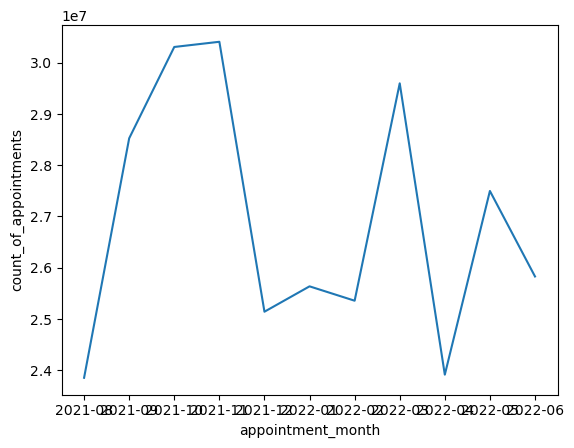

In [464]:
#I create a simple exploratory lineplot.
fig_nc_ss = sns.lineplot(x='appointment_month', y='count_of_appointments', errorbar=None, data=nc_ss)

We can see that the resultant lineplot is lacking information: for instance, we don't know the scale of the x-axis, and the y-axis is too cluttered. We must therefore tidy it up and make it legible.

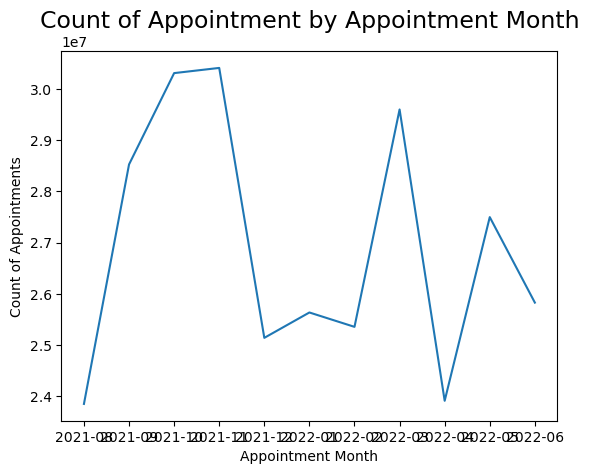

In [272]:
#First, I add a title and appropriate axis names.
#I appropriately size the title.
fig_nc_ss = sns.lineplot(x='appointment_month', y='count_of_appointments', errorbar=None, data=nc_ss)
fig_nc_ss.set_title('Count of Appointment by Appointment Month', fontdict={'size': 17})
fig_nc_ss.set(xlabel='Appointment Month', ylabel='Count of Appointments')

plt.show()

The x-axis ticks are cluttered. 

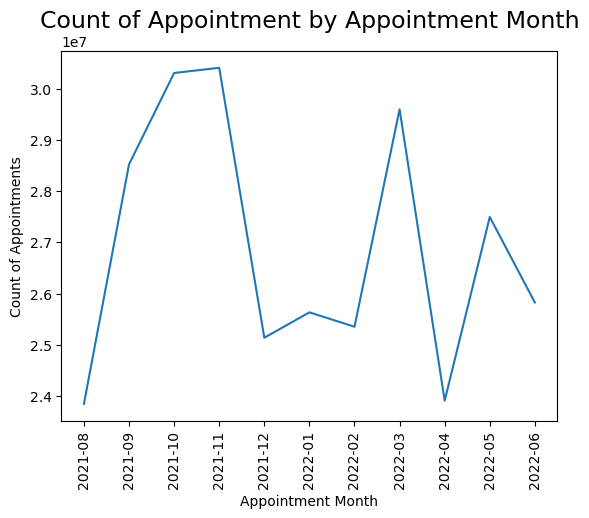

In [466]:
#I rotate the x-axis ticks 90 degrees.
fig_nc_ss = sns.lineplot(x='appointment_month', y='count_of_appointments', errorbar=None, data=nc_ss)
fig_nc_ss.set_title('Count of Appointment by Appointment Month', fontdict={'size': 17})
fig_nc_ss.set(xlabel='Appointment Month', ylabel='Count of Appointments')
plt.xticks(rotation=90)

plt.show()

The y-axis is quite misleading. It implies appointment count is between 2 to 3 appointments. I create a modular function which formats the y-axis ticks accurately. I then apply the modular function to the y-axis. I also add a grid and markers to the datapoints.

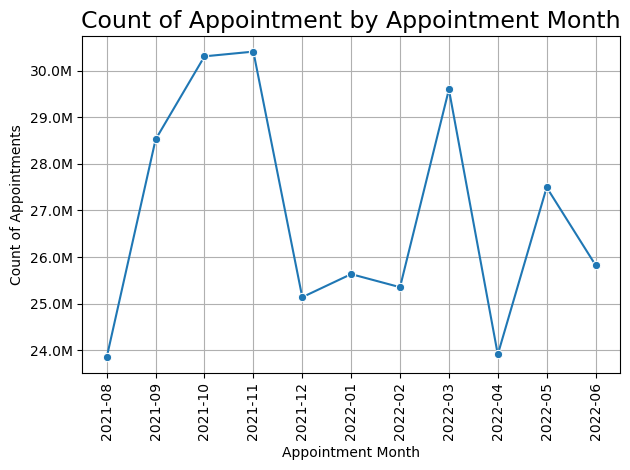

In [288]:
fig_nc_ss = sns.lineplot(x='appointment_month', y='count_of_appointments', marker='o', errorbar=None, data=nc_ss)
fig_nc_ss.set_title('Count of Appointment by Appointment Month', fontdict={'size': 17})
fig_nc_ss.set(xlabel='Appointment Month', ylabel='Count of Appointments')
plt.xticks(rotation=90)
plt.grid(True)

def mformat(y, pos):
    return f'{y/1000000:.1f}M'

fig_nc_ss.yaxis.set_major_formatter(ticker.FuncFormatter(mformat))

plt.tight_layout()
plt.show()

So, we have a lineplot showing appointment count by appointment month in the 'national_categories' dataset.

**Create a visualisation indicating the number of appointments per month in the 'appointments_regional' dataset.**

In [305]:
#First, I convert appointment month data back to the original format.
ar['appointment_month'] = pd.to_datetime(ar['appointment_month'])
ar['appointment_month'] = ar['appointment_month'].dt.strftime('%Y-%m')
ar.head()

icb_ons_code appointment_month appointment_status hcp_type appointment_mode  \
0    E54000034           2020-01           Attended       GP     Face-to-Face   
1    E54000034           2020-01           Attended       GP     Face-to-Face   
2    E54000034           2020-01           Attended       GP     Face-to-Face   
3    E54000034           2020-01           Attended       GP     Face-to-Face   
4    E54000034           2020-01           Attended       GP     Face-to-Face   

  time_between_book_and_appointment  count_of_appointments  
0                             1 Day                   8107  
1                    15  to 21 Days                   6791  
2                       2 to 7 Days                  20686  
3                    22  to 28 Days                   4268  
4                     8  to 14 Days                  11971

In [307]:
#I repeated the same process as I did previously.
ar_ss = ar.groupby('appointment_month')[['count_of_appointments']].sum()
ar_ss

count_of_appointments
appointment_month                       
2020-01                         27199296
2020-02                         24104621
2020-03                         24053468
2020-04                         16007881
2020-05                         16417212
2020-06                         20690805
2020-07                         22491437
2020-08                         20150520
2020-09                         26714255
2020-10                         28301932
2020-11                         25061602
2020-12                         23535936
2021-01                         22492069
2021-02                         22399569
2021-03                         27225424
2021-04                         23879932
2021-05                         23508395
2021-06                         26784182
2021-07                         25739219
2021-08                         23852171
2021-09                         28522501
2021-10                         30303834
2021-11                         30405070
2021-12                         25140776
2022-01                         25635474
2022-02                         25355260
2022-03                         29595038
2022-04                         23913060
2022-05                         27495508
2022-06                         25828078

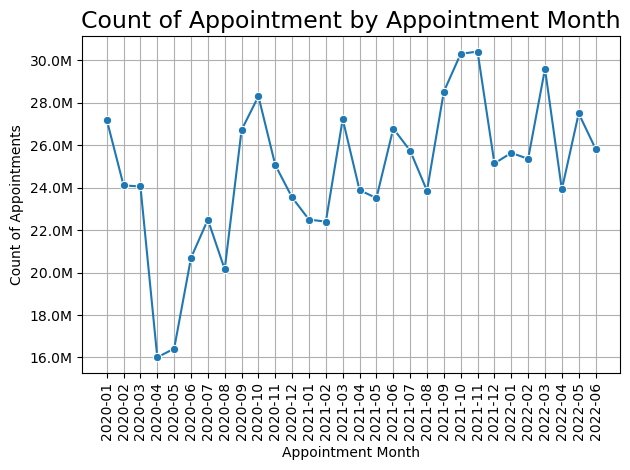

In [311]:
fig_ar_ss = sns.lineplot(x='appointment_month', y='count_of_appointments', marker='o', errorbar=None, data=ar_ss)
fig_ar_ss.set_title('Count of Appointment by Appointment Month', fontdict={'size': 17})
fig_ar_ss.set(xlabel='Appointment Month', ylabel='Count of Appointments')
plt.xticks(rotation=90)
plt.grid(True)

def mformat(y, pos):
    return f'{y/1000000:.1f}M'

fig_ar_ss.yaxis.set_major_formatter(ticker.FuncFormatter(mformat))

plt.tight_layout()
plt.show()

We can see that the x-axis is readable, however the ticks are too close together. I space them out. I also scale up the axis labels appropriately. I also use matplotlib to plot the base figure. I use the '.tight_layout()' function to fit the data cleanly.

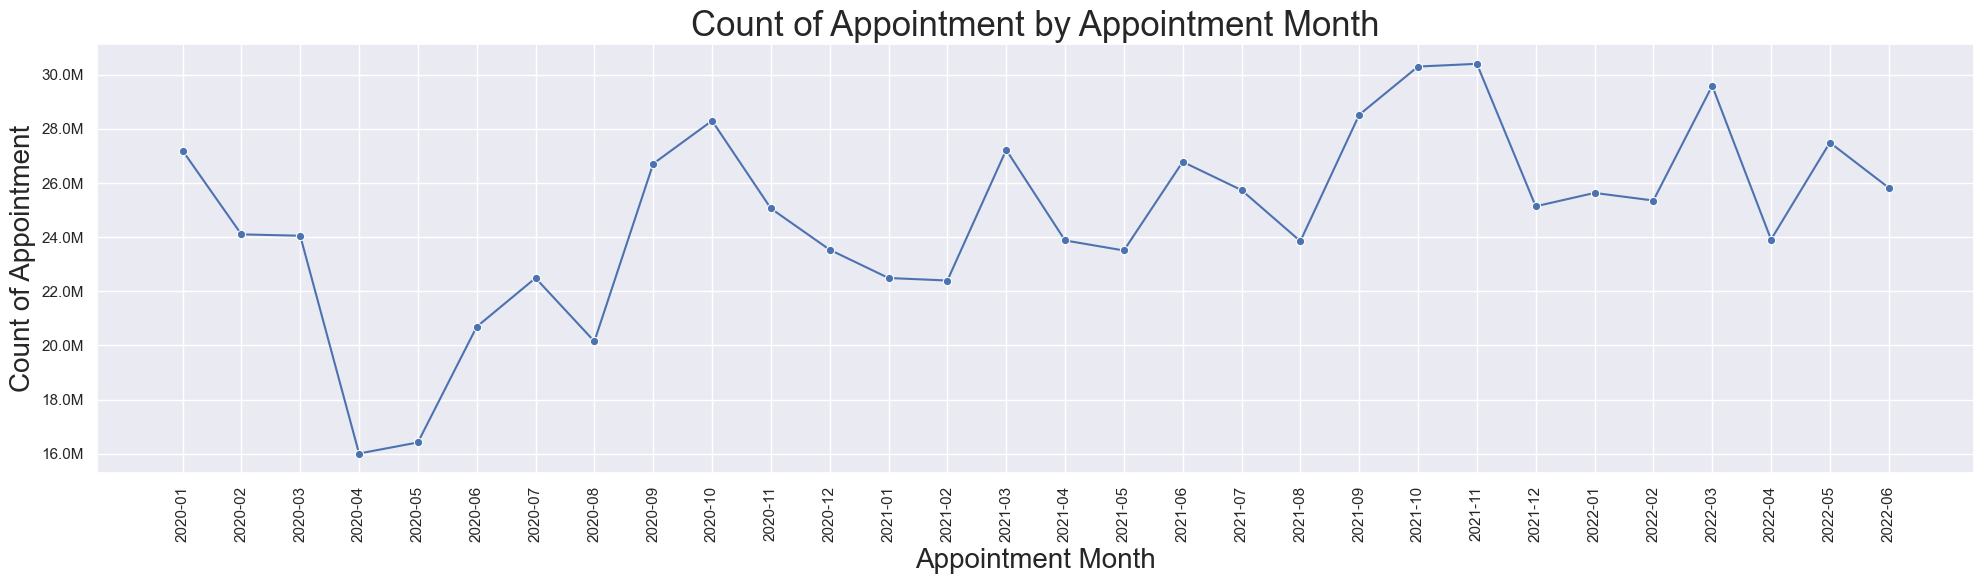

In [336]:
fig_ar_ss = plt.figure(figsize=(20, 6))
fig_ar_ss = sns.lineplot(x='appointment_month', y='count_of_appointments', marker='o', errorbar=None, data=ar_ss)
fig_ar_ss.set_title('Count of Appointment by Appointment Month', fontdict={'size': 25})
fig_ar_ss.set_xlabel('Appointment Month', fontdict={'size': 20})
fig_ar_ss.set_ylabel('Count of Appointment', fontdict={'size': 20})
plt.xticks(rotation=90)
plt.grid(True)

def mformat(y, pos):
    return f'{y/1000000:.1f}M'

fig_ar_ss.yaxis.set_major_formatter(ticker.FuncFormatter(mformat))

plt.tight_layout()
plt.show()

So, we have a lineplot showing appointment count by appointment month in the 'appointments_regional' dataset.

**Create a visualisation indicating the number of appointments per month in the 'actual_duration' dataset.**

In [37]:
#First, I convert the appointment date data to datetime. 
#i create a new column to stoe appointment month data.
ad['appointment_date'] = pd.to_datetime(ad['appointment_date'])
ad['appointment_date'] = ad['appointment_date'].dt.strftime('%Y-%m')
ad.head()

sub_icb_location_code sub_icb_location_ons_code  \
0                   00L                 E38000130   
1                   00L                 E38000130   
2                   00L                 E38000130   
3                   00L                 E38000130   
4                   00L                 E38000130   

                        sub_icb_location_name icb_ons_code region_ons_code  \
0  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
1  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
2  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
3  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
4  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   

  appointment_date         actual_duration  count_of_appointments  \
0          2021-12           31-60 Minutes                    364   
1          2021-12           21-30 Minutes                    619   
2          2021-12            6-10 Minutes                   1698   
3          2021-12  Unknown / Data Quality                   1277   
4          2021-12           16-20 Minutes                    730   

  appointment_month  
0           2021-12  
1           2021-12  
2           2021-12  
3           2021-12  
4           2021-12

In [39]:
#I repeated the same process as I did previously.
ad_ss = ad.groupby('appointment_date')[['count_of_appointments']].sum()
ad_ss

count_of_appointments
appointment_date                       
2021-12                        22853483
2022-01                        23597196
2022-02                        23351939
2022-03                        27170002
2022-04                        21948814
2022-05                        25343941
2022-06                        23715317

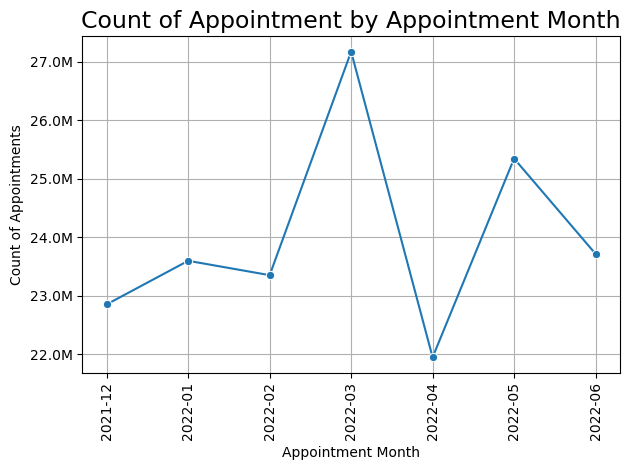

In [25]:
fig_ad_ss = sns.lineplot(x='appointment_month', y='count_of_appointments', marker='o', errorbar=None, data=ad_ss)
fig_ad_ss.set_title('Count of Appointment by Appointment Month', fontdict={'size': 17})
fig_ad_ss.set(xlabel='Appointment Month', ylabel='Count of Appointments')
plt.xticks(rotation=90)
plt.grid(True)

def mformat(y, pos):
    return f'{y/1000000:.1f}M'

fig_ad_ss.yaxis.set_major_formatter(ticker.FuncFormatter(mformat))

plt.tight_layout()
plt.show()

So, we have a lineplot showing appointment count by appointment month in the 'appointments_regional' dataset.

**Create a lineplot of appointments per month by service settings in the 'national_categories' dataset.**

In [41]:
#First, I create a new Dataframe ('nc_serv') containing relevant columns.
nc_serv = nc[["appointment_month","service_setting","count_of_appointments"]]
nc_serv.head()

appointment_month       service_setting  count_of_appointments
0           2021-08  Primary Care Network                      3
1           2021-08                 Other                      7
2           2021-08      General Practice                     79
3           2021-08      General Practice                    725
4           2021-08      General Practice                      2

In [30]:
#I find the sum of appointments by appointment month and service setting.
nc_serv = nc_serv.groupby(['appointment_month','service_setting'])['count_of_appointments'].sum().unstack()
print(nc_serv)

service_setting    Extended Access Provision  General Practice   Other  \
appointment_month                                                        
2021-08                               160927          21575852  449101   
2021-09                               187906          25940821  527174   
2021-10                               209539          27606171  556487   
2021-11                               207577          27767889  558784   
2021-12                               173504          23008818  464718   
2022-01                               186375          23583053  457440   
2022-02                               196627          23305934  456153   
2022-03                               231905          27187368  530677   
2022-04                               192284          21916791  437402   
2022-05                               220511          25238620  503327   
2022-06                               209652          23680374  478813   

service_setting    Primary Care Netwo

<Figure size 1000x600 with 0 Axes>

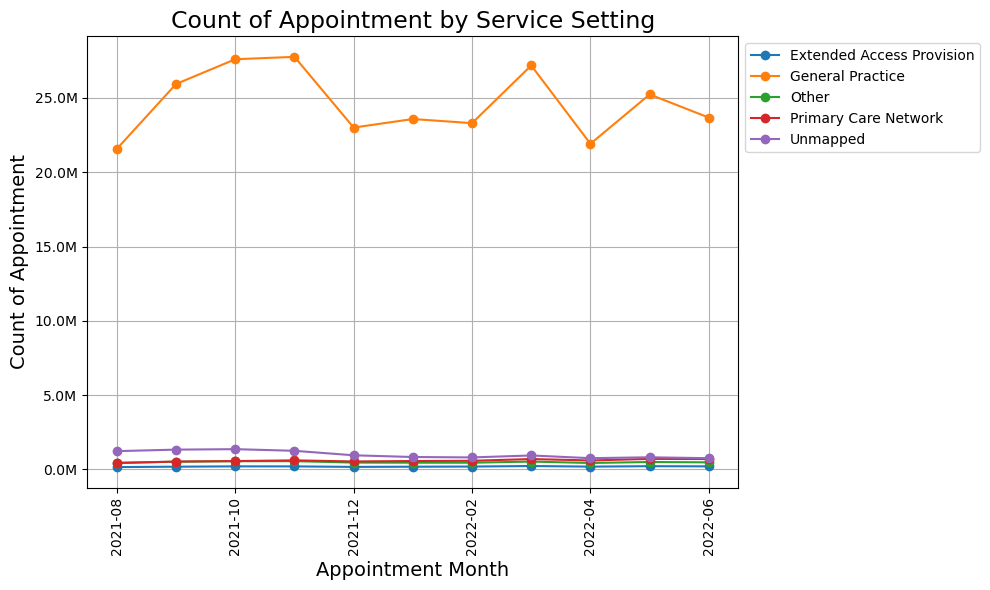

In [32]:
#I then produce this DataFrame as a lineplot using the '.plot()' function.
#I also use the '.legend()' function to position the legend outside the chart.
fig_nc_serv = plt.figure(figsize=(10, 6))
fig_nc_serv = nc_serv.plot(kind='line',figsize=(10, 6), marker='o')
fig_nc_serv.set_title('Count of Appointment by Service Setting', fontdict={'size': 17})
fig_nc_serv.set_xlabel('Appointment Month', fontdict={'size': 14})
fig_nc_serv.set_ylabel('Count of Appointment', fontdict={'size': 14})
plt.xticks(rotation=90)
plt.tight_layout()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

def mformat(y, pos):
    return f'{y/1000000:.1f}M'
    
fig_nc_serv.yaxis.set_major_formatter(ticker.FuncFormatter(mformat))

plt.tight_layout()
plt.show()

Let's tidy up this chart, removing 'Unmapped' data.

In [49]:
nc_servexu = nc[["appointment_month","service_setting","count_of_appointments"]]
nc_servexu = nc_servexu[~nc_servexu['service_setting'].str.contains('Unmapped')]
nc_servexu.head()

appointment_month       service_setting  count_of_appointments
0           2021-08  Primary Care Network                      3
1           2021-08                 Other                      7
2           2021-08      General Practice                     79
3           2021-08      General Practice                    725
4           2021-08      General Practice                      2

In [53]:
nc_servexu = nc_servexu.groupby(['appointment_month','service_setting'])['count_of_appointments'].sum().unstack()
print(nc_servexu)

service_setting    Extended Access Provision  General Practice   Other  \
appointment_month                                                        
2021-08                               160927          21575852  449101   
2021-09                               187906          25940821  527174   
2021-10                               209539          27606171  556487   
2021-11                               207577          27767889  558784   
2021-12                               173504          23008818  464718   
2022-01                               186375          23583053  457440   
2022-02                               196627          23305934  456153   
2022-03                               231905          27187368  530677   
2022-04                               192284          21916791  437402   
2022-05                               220511          25238620  503327   
2022-06                               209652          23680374  478813   

service_setting    Primary Care Netwo

<Figure size 1000x600 with 0 Axes>

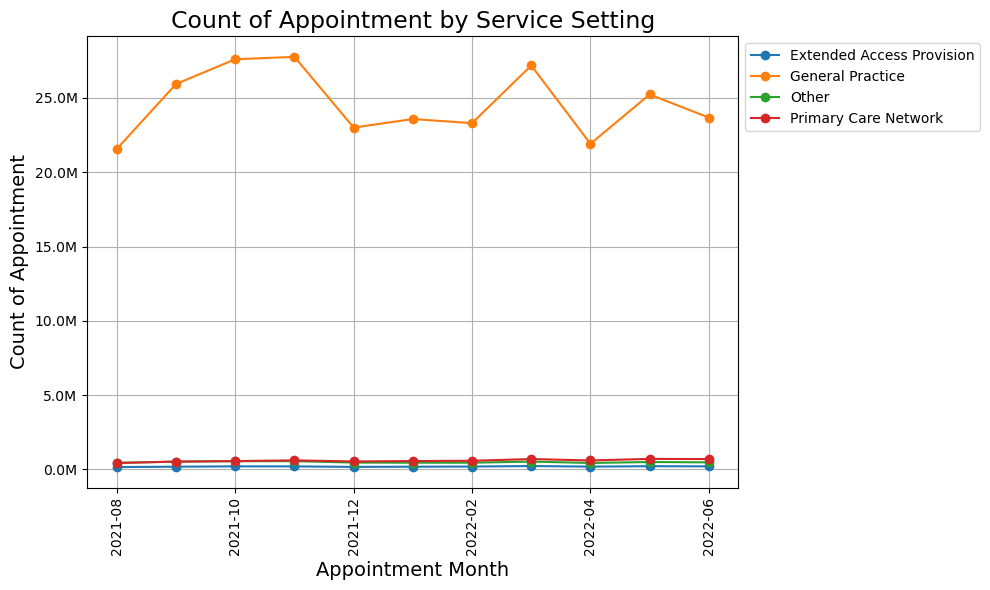

In [55]:
fig_nc_servexu = plt.figure(figsize=(10, 6))
fig_nc_servexu = nc_servexu.plot(kind='line',figsize=(10, 6), marker='o')
fig_nc_servexu.set_title('Count of Appointment by Service Setting', fontdict={'size': 17})
fig_nc_servexu.set_xlabel('Appointment Month', fontdict={'size': 14})
fig_nc_servexu.set_ylabel('Count of Appointment', fontdict={'size': 14})
plt.xticks(rotation=90)
plt.tight_layout()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

def mformat(y, pos):
    return f'{y/1000000:.1f}M'
    
fig_nc_servexu.yaxis.set_major_formatter(ticker.FuncFormatter(mformat))

plt.tight_layout()
plt.show()

So, we have a lineplot showing appointment count of service setting by appointment month in the 'national_categories' dataset.

Let's see this without General Practice data.

In [94]:
nc_servexgpu = nc[["appointment_month","service_setting","count_of_appointments"]]
nc_servexgpu = nc_servexgpu[~nc_servexgpu['service_setting'].str.contains('General Practice|Unmapped')]
nc_servexgpu = nc_servexgpu.groupby(['appointment_month','service_setting'])['count_of_appointments'].sum().unstack()

<Figure size 1000x600 with 0 Axes>

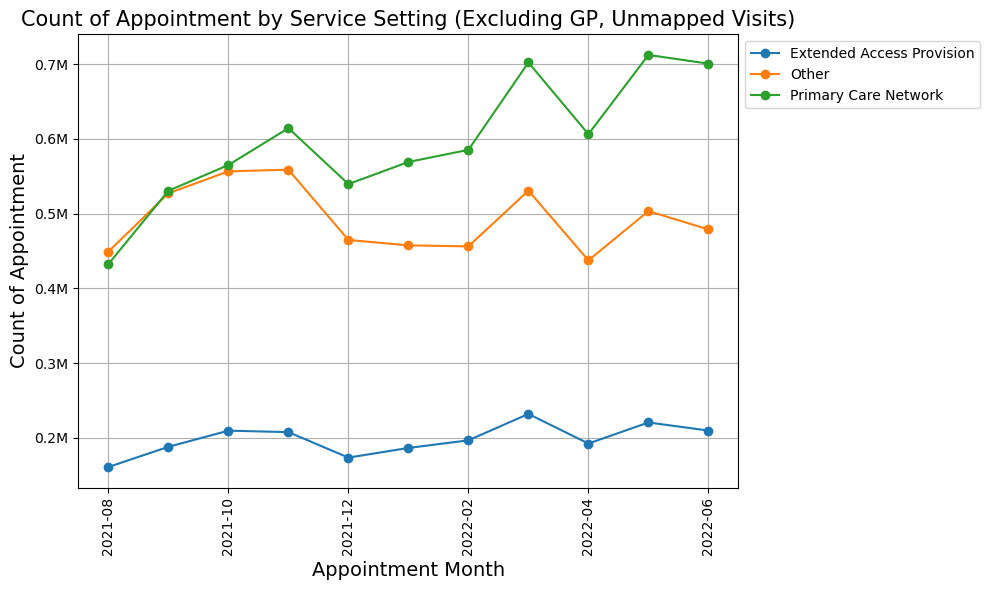

In [98]:
fig_nc_servexgpu = plt.figure(figsize=(10, 6))
fig_nc_servexgpu = nc_servexgpu.plot(kind='line',figsize=(10, 6), marker='o')
fig_nc_servexgpu.set_title('Count of Appointment by Service Setting (Excluding GP, Unmapped Visits)', fontdict={'size': 15})
fig_nc_servexgpu.set_xlabel('Appointment Month', fontdict={'size': 14})
fig_nc_servexgpu.set_ylabel('Count of Appointment', fontdict={'size': 14})
plt.xticks(rotation=90)
plt.tight_layout()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

def mformat(y, pos):
    return f'{y/1000000:.1f}M'
    
fig_nc_servexgpu.yaxis.set_major_formatter(ticker.FuncFormatter(mformat))

plt.tight_layout()
plt.show()

**Create a visualisation indicating the number of appointments per month for national category in the 'national_categories' dataset.**

In [128]:
#I repeated the same process as I did previously. 
#I removed 'Unmapped' data. 
nc_nc = nc[["appointment_month","national_category","count_of_appointments"]]
nc_nc = nc_nc[~nc_nc['national_category'].str.contains('Unmapped')]
nc_nc = nc_nc[~nc_nc['national_category'].str.contains('Inconsistent Mapping')]
nc_nc.head()

appointment_month                       national_category  \
0           2021-08  Patient contact during Care Home Round   
1           2021-08                         Planned Clinics   
2           2021-08                              Home Visit   
3           2021-08              General Consultation Acute   
4           2021-08            Structured Medication Review   

   count_of_appointments  
0                      3  
1                      7  
2                     79  
3                    725  
4                      2

In [130]:
nc_nc = nc_nc.groupby(['appointment_month','national_category'])['count_of_appointments'].sum().unstack()
print(nc_nc)

national_category  Care Home Needs Assessment & Personalised Care and Support Planning  \
appointment_month                                                                        
2021-08                                                        29676                     
2021-09                                                        33503                     
2021-10                                                        32441                     
2021-11                                                        38827                     
2021-12                                                        34653                     
2022-01                                                        37988                     
2022-02                                                        37219                     
2022-03                                                        43189                     
2022-04                                                        35282                     
2022-05   

<Figure size 2000x600 with 0 Axes>

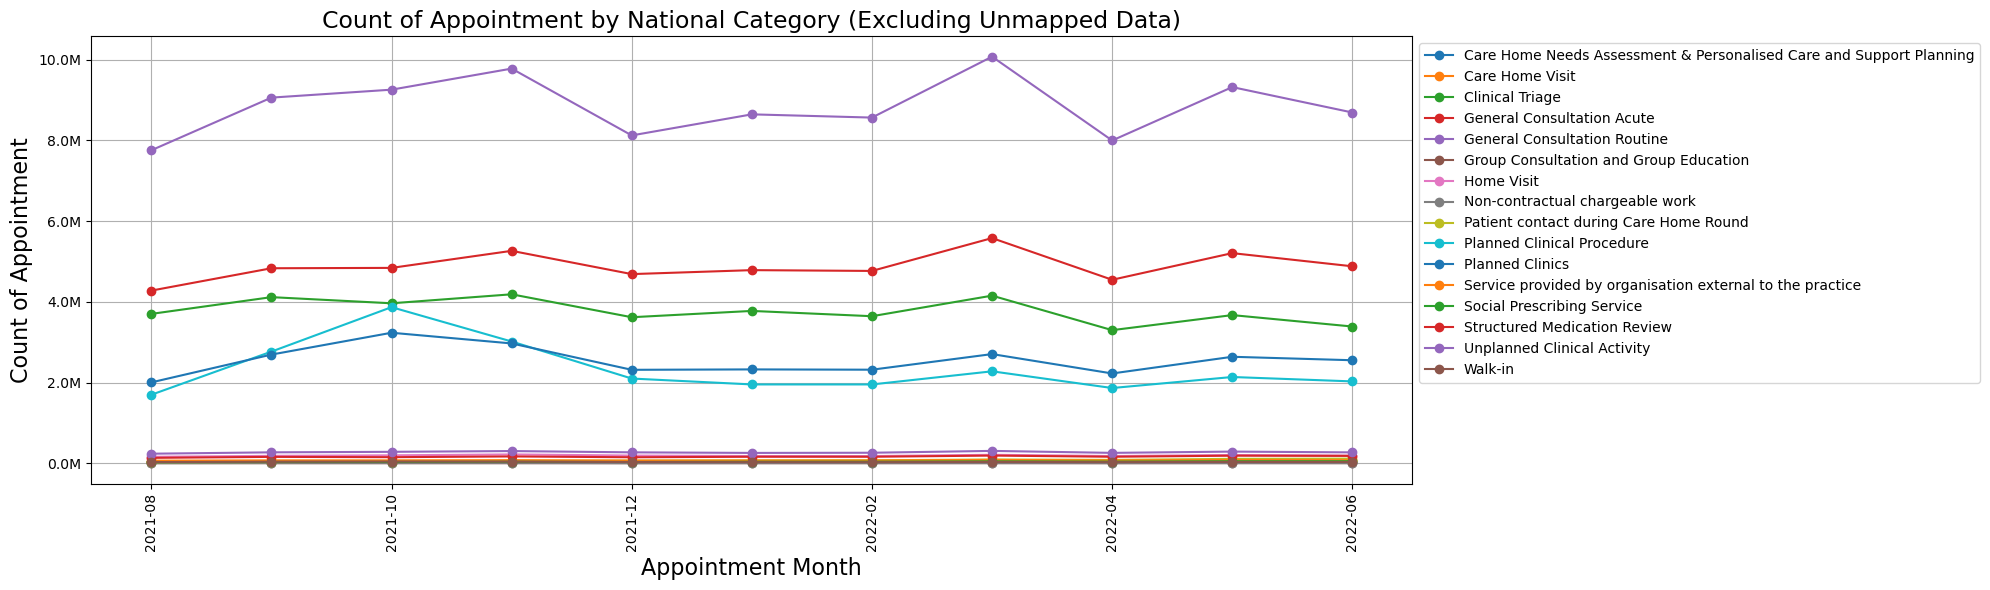

In [134]:
fig_nc_nc = plt.figure(figsize=(20, 6))
fig_nc_nc = nc_nc.plot(kind='line',figsize=(20, 6), marker='o')
fig_nc_nc.set_title('Count of Appointment by National Category (Excluding Unmapped Data)', fontdict={'size': 17})
fig_nc_nc.set_xlabel('Appointment Month', fontdict={'size': 16})
fig_nc_nc.set_ylabel('Count of Appointment', fontdict={'size': 16})
plt.xticks(rotation=90)
plt.tight_layout()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

def mformat(y, pos):
    return f'{y/1000000:.1f}M'
    
fig_nc_nc.yaxis.set_major_formatter(ticker.FuncFormatter(mformat))

plt.tight_layout()
plt.show()

So, we have a lineplot showing appointment count by national category by appointment month in the 'national_categories' dataset.

Let's remove large data to focus on how less popular national categories fare.

In [145]:
#I first find the national categories with the lowest appointment counts.
nc_nca = nc.groupby(['national_category'])['count_of_appointments'].sum()
nc_nca.nsmallest()

national_category
Group Consultation and Group Education                                  60632
Non-contractual chargeable work                                        138911
Care Home Needs Assessment & Personalised Care and Support Planning    405904
Walk-in                                                                412438
Social Prescribing Service                                             475828
Name: count_of_appointments, dtype: int64

In [165]:
nc_sm = nc[["appointment_month","national_category","count_of_appointments"]]
nc_sm = nc_sm[nc_sm['national_category'].str.contains('Walk-in|Social Prescribing Service|Care Home Needs Assessment & Personalised Care and Support Planning|Non-contractual chargeable work|Group Consultation and Group Education',
                                                      na=False)]
nc_sm

appointment_month                                  national_category  \
14               2021-08  Care Home Needs Assessment & Personalised Care...   
37               2021-08                         Social Prescribing Service   
55               2021-08  Care Home Needs Assessment & Personalised Care...   
62               2021-08  Care Home Needs Assessment & Personalised Care...   
63               2021-08                    Non-contractual chargeable work   
...                  ...                                                ...   
817360           2022-06  Care Home Needs Assessment & Personalised Care...   
817369           2022-06  Care Home Needs Assessment & Personalised Care...   
817371           2022-06                                            Walk-in   
817374           2022-06                         Social Prescribing Service   
817380           2022-06                    Non-contractual chargeable work   

        count_of_appointments  
14                          3  
37                          1  
55                          5  
62                          5  
63                          1  
...                       ...  
817360                     15  
817369                      5  
817371                     79  
817374                     14  
817380                      1  

[90413 rows x 3 columns]

In [167]:
nc_sm = nc_sm.groupby(['appointment_month','national_category'])['count_of_appointments'].sum().unstack()
print(nc_sm)

national_category  Care Home Needs Assessment & Personalised Care and Support Planning  \
appointment_month                                                                        
2021-08                                                        29676                     
2021-09                                                        33503                     
2021-10                                                        32441                     
2021-11                                                        38827                     
2021-12                                                        34653                     
2022-01                                                        37988                     
2022-02                                                        37219                     
2022-03                                                        43189                     
2022-04                                                        35282                     
2022-05   

<Figure size 2000x600 with 0 Axes>

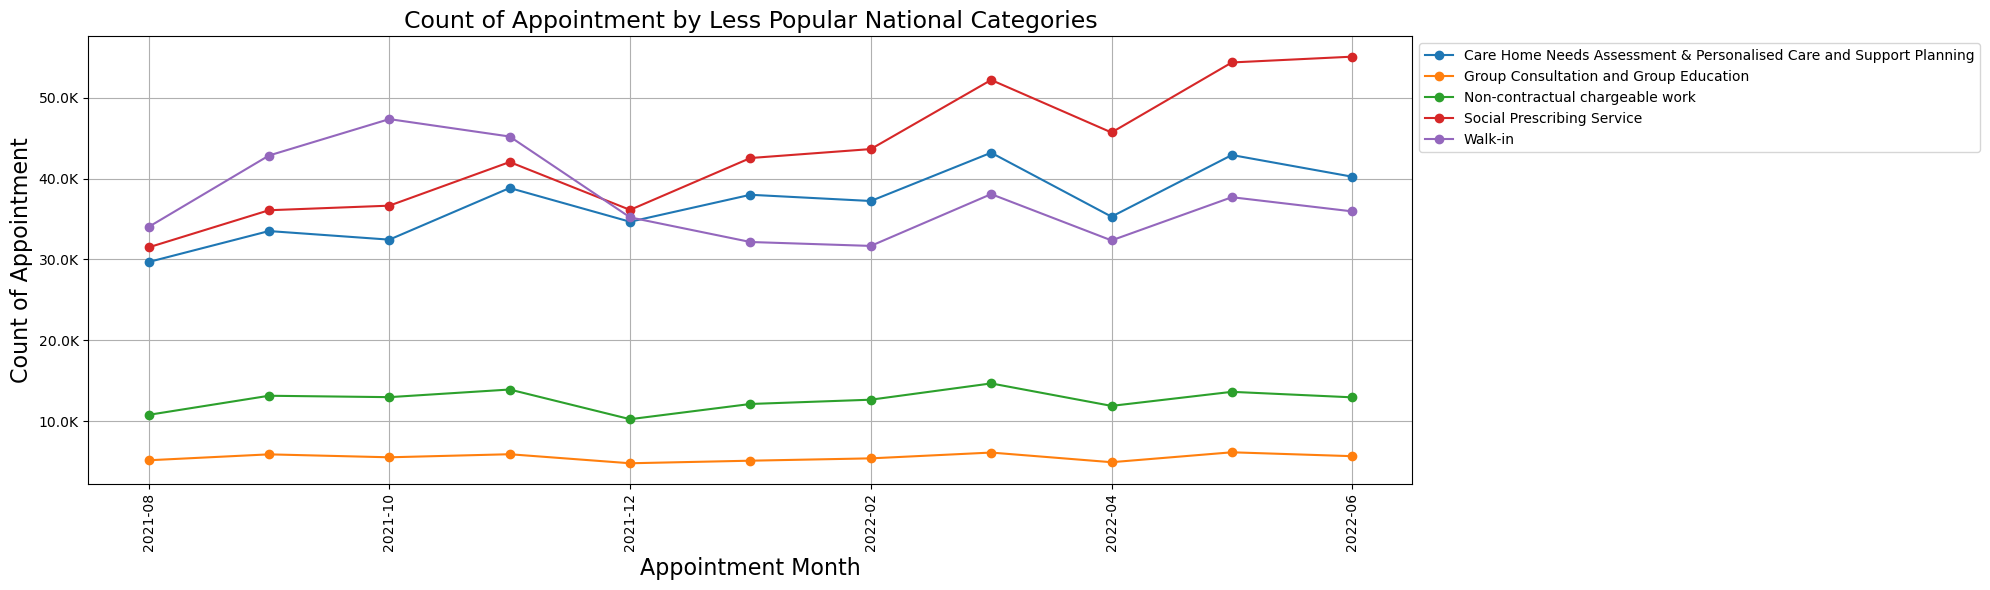

In [468]:
fig_nc_sm = plt.figure(figsize=(20, 6))
fig_nc_sm = nc_sm.plot(kind='line',figsize=(20, 6), marker='o')
fig_nc_sm.set_title('Count of Appointment by Less Popular National Categories', fontdict={'size': 17})
fig_nc_sm.set_xlabel('Appointment Month', fontdict={'size': 16})
fig_nc_sm.set_ylabel('Count of Appointment', fontdict={'size': 16})
plt.xticks(rotation=90)
plt.tight_layout()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

def kformat(y, pos):
    return f'{y/1000:.1f}K'
    
fig_nc_sm.yaxis.set_major_formatter(ticker.FuncFormatter(kformat))

plt.tight_layout()
plt.show()

**Create a visualisation indicating the number of appointments per month for context type in the 'national_categories' dataset.**

In [300]:
#I repeated the same process as I did previously. 
nc_ct = nc[["appointment_month","context_type","count_of_appointments"]]
nc_ct = nc_ct[~nc_ct['context_type'].str.contains('Unmapped')]
nc_ct.head()

appointment_month            context_type  count_of_appointments
0           2021-08  Care Related Encounter                      3
1           2021-08  Care Related Encounter                      7
2           2021-08  Care Related Encounter                     79
3           2021-08  Care Related Encounter                    725
4           2021-08  Care Related Encounter                      2

In [302]:
nc_ct = nc_ct.groupby(['appointment_month','context_type'])['count_of_appointments'].sum().unstack()
print(nc_ct)

context_type       Care Related Encounter  Inconsistent Mapping
appointment_month                                              
2021-08                          20255235               2363093
2021-09                          24404251               2782135
2021-10                          26125201               2811977
2021-11                          26282778               2865796
2021-12                          21798612               2387907
2022-01                          22441947               2353965
2022-02                          22211021               2332993
2022-03                          25928850               2723276
2022-04                          20904193               2248554
2022-05                          24101243               2573495
2022-06                          22621827               2447611


<Figure size 1500x600 with 0 Axes>

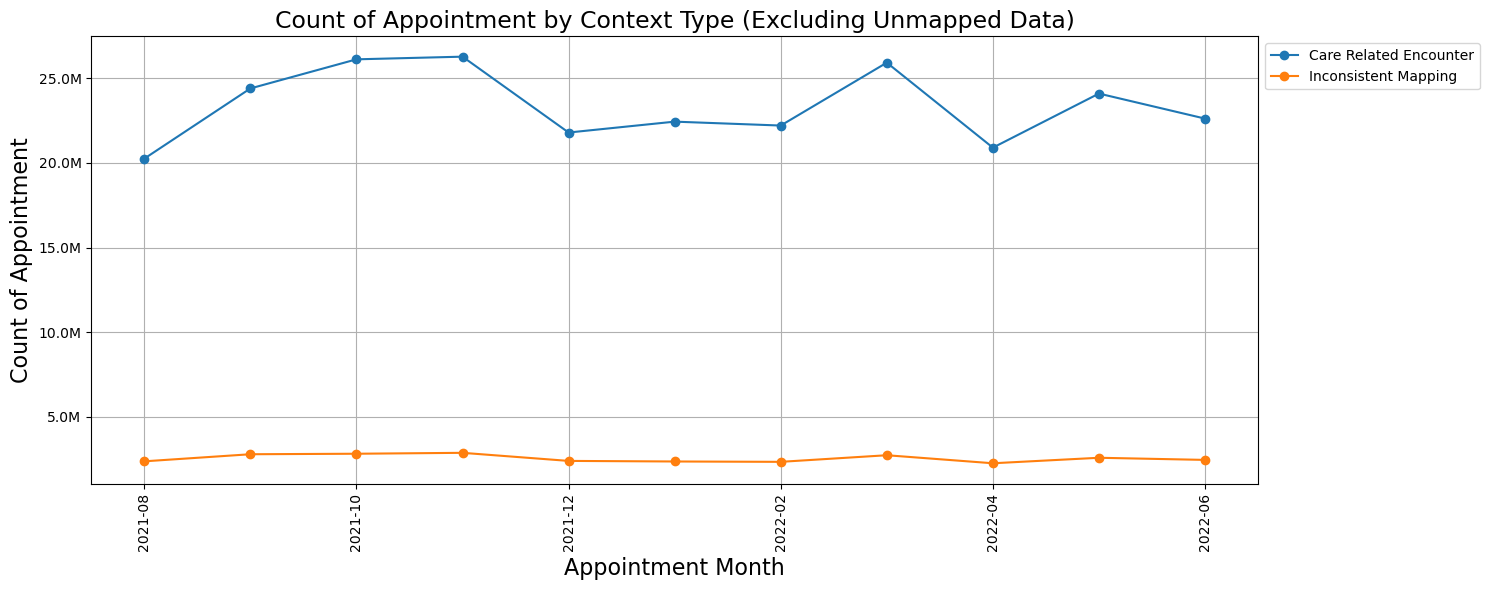

In [306]:
fig_nc_ct = plt.figure(figsize=(15, 6))
fig_nc_ct = nc_ct.plot(kind='line',figsize=(15, 6), marker='o')
fig_nc_ct.set_title('Count of Appointment by Context Type (Excluding Unmapped Data)', fontdict={'size': 17})
fig_nc_ct.set_xlabel('Appointment Month', fontdict={'size': 16})
fig_nc_ct.set_ylabel('Count of Appointment', fontdict={'size': 16})
plt.xticks(rotation=90)
plt.tight_layout()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

def mformat(y, pos):
    return f'{y/1000000:.1f}M'
    
fig_nc_ct.yaxis.set_major_formatter(ticker.FuncFormatter(mformat))

plt.tight_layout()
plt.show()

**Create four visualisations (one per season) to indicate the number of appointments for service setting per season.**

In [544]:
#I create a new DataFrame, 'nc_season'.
nc_season = nc[["appointment_month","service_setting","count_of_appointments"]]
nc_season.head()

appointment_month       service_setting  count_of_appointments
0           2021-08  Primary Care Network                      3
1           2021-08                 Other                      7
2           2021-08      General Practice                     79
3           2021-08      General Practice                    725
4           2021-08      General Practice                      2

In [546]:
#I sum appointment count by service setting.
nc_season = nc_season.groupby(['appointment_month', 'service_setting']).sum().reset_index()
nc_season.head()

appointment_month            service_setting  count_of_appointments
0           2021-08  Extended Access Provision                 160927
1           2021-08           General Practice               21575852
2           2021-08                      Other                 449101
3           2021-08       Primary Care Network                 432448
4           2021-08                   Unmapped                1233843

In [548]:
#Now, I replace the appointment months with season names.
#I create a variable, 'seasons'.
#Then I use the '.replace()' function.
seasons = {
    '2021-08': 'Summer',
    '2021-09': 'Autumn',
    '2021-10': 'Autumn',
    '2021-11': 'Autumn',
    '2021-12': 'Winter',
    '2022-01': 'Winter',
    '2022-02': 'Winter',
    '2022-03': 'Spring',
    '2022-04': 'Spring',
    '2022-05': 'Spring',
}

nc_season['appointment_month'] = nc_season['appointment_month'].replace(seasons)
nc_season

appointment_month            service_setting  count_of_appointments
0             Summer  Extended Access Provision                 160927
1             Summer           General Practice               21575852
2             Summer                      Other                 449101
3             Summer       Primary Care Network                 432448
4             Summer                   Unmapped                1233843
5             Autumn  Extended Access Provision                 187906
6             Autumn           General Practice               25940821
7             Autumn                      Other                 527174
8             Autumn       Primary Care Network                 530485
9             Autumn                   Unmapped                1336115
10            Autumn  Extended Access Provision                 209539
11            Autumn           General Practice               27606171
12            Autumn                      Other                 556487
13            Autumn       Primary Care Network                 564981
14            Autumn                   Unmapped                1366656
15            Autumn  Extended Access Provision                 207577
16            Autumn           General Practice               27767889
17            Autumn                      Other                 558784
18            Autumn       Primary Care Network                 614324
19            Autumn                   Unmapped                1256496
20            Winter  Extended Access Provision                 173504
21            Winter           General Practice               23008818
22            Winter                      Other                 464718
23            Winter       Primary Care Network                 539479
24            Winter                   Unmapped                 954257
25            Winter  Extended Access Provision                 186375
26            Winter           General Practice               23583053
27            Winter                      Other                 457440
28            Winter       Primary Care Network                 569044
29            Winter                   Unmapped                 839562
30            Winter  Extended Access Provision                 196627
31            Winter           General Practice               23305934
32            Winter                      Other                 456153
33            Winter       Primary Care Network                 585300
34            Winter                   Unmapped                 811246
35            Spring  Extended Access Provision                 231905
36            Spring           General Practice               27187368
37            Spring                      Other                 530677
38            Spring       Primary Care Network                 702176
39            Spring                   Unmapped                 942912
40            Spring  Extended Access Provision                 192284
41            Spring           General Practice               21916791
42            Spring                      Other                 437402
43            Spring       Primary Care Network                 606270
44            Spring                   Unmapped                 760313
45            Spring  Extended Access Provision                 220511
46            Spring           General Practice               25238620
47            Spring                      Other                 503327
48            Spring       Primary Care Network                 712280
49            Spring                   Unmapped                 820770
50           2022-06  Extended Access Provision                 209652
51           2022-06           General Practice               23680374
52           2022-06                      Other                 478813
53           2022-06       Primary Care Network                 700599
54           2022-06                   Unmapped                 758640

In [550]:
#I drop the date range we do not want.
nc_season = nc_season.drop(index=[50, 51, 52, 53, 54]) 
nc_season

appointment_month            service_setting  count_of_appointments
0             Summer  Extended Access Provision                 160927
1             Summer           General Practice               21575852
2             Summer                      Other                 449101
3             Summer       Primary Care Network                 432448
4             Summer                   Unmapped                1233843
5             Autumn  Extended Access Provision                 187906
6             Autumn           General Practice               25940821
7             Autumn                      Other                 527174
8             Autumn       Primary Care Network                 530485
9             Autumn                   Unmapped                1336115
10            Autumn  Extended Access Provision                 209539
11            Autumn           General Practice               27606171
12            Autumn                      Other                 556487
13            Autumn       Primary Care Network                 564981
14            Autumn                   Unmapped                1366656
15            Autumn  Extended Access Provision                 207577
16            Autumn           General Practice               27767889
17            Autumn                      Other                 558784
18            Autumn       Primary Care Network                 614324
19            Autumn                   Unmapped                1256496
20            Winter  Extended Access Provision                 173504
21            Winter           General Practice               23008818
22            Winter                      Other                 464718
23            Winter       Primary Care Network                 539479
24            Winter                   Unmapped                 954257
25            Winter  Extended Access Provision                 186375
26            Winter           General Practice               23583053
27            Winter                      Other                 457440
28            Winter       Primary Care Network                 569044
29            Winter                   Unmapped                 839562
30            Winter  Extended Access Provision                 196627
31            Winter           General Practice               23305934
32            Winter                      Other                 456153
33            Winter       Primary Care Network                 585300
34            Winter                   Unmapped                 811246
35            Spring  Extended Access Provision                 231905
36            Spring           General Practice               27187368
37            Spring                      Other                 530677
38            Spring       Primary Care Network                 702176
39            Spring                   Unmapped                 942912
40            Spring  Extended Access Provision                 192284
41            Spring           General Practice               21916791
42            Spring                      Other                 437402
43            Spring       Primary Care Network                 606270
44            Spring                   Unmapped                 760313
45            Spring  Extended Access Provision                 220511
46            Spring           General Practice               25238620
47            Spring                      Other                 503327
48            Spring       Primary Care Network                 712280
49            Spring                   Unmapped                 820770

In [552]:
nc_season = nc_season[~nc_season['service_setting'].str.contains('Unmapped', case=False, na=False)]
nc_season

appointment_month            service_setting  count_of_appointments
0             Summer  Extended Access Provision                 160927
1             Summer           General Practice               21575852
2             Summer                      Other                 449101
3             Summer       Primary Care Network                 432448
5             Autumn  Extended Access Provision                 187906
6             Autumn           General Practice               25940821
7             Autumn                      Other                 527174
8             Autumn       Primary Care Network                 530485
10            Autumn  Extended Access Provision                 209539
11            Autumn           General Practice               27606171
12            Autumn                      Other                 556487
13            Autumn       Primary Care Network                 564981
15            Autumn  Extended Access Provision                 207577
16            Autumn           General Practice               27767889
17            Autumn                      Other                 558784
18            Autumn       Primary Care Network                 614324
20            Winter  Extended Access Provision                 173504
21            Winter           General Practice               23008818
22            Winter                      Other                 464718
23            Winter       Primary Care Network                 539479
25            Winter  Extended Access Provision                 186375
26            Winter           General Practice               23583053
27            Winter                      Other                 457440
28            Winter       Primary Care Network                 569044
30            Winter  Extended Access Provision                 196627
31            Winter           General Practice               23305934
32            Winter                      Other                 456153
33            Winter       Primary Care Network                 585300
35            Spring  Extended Access Provision                 231905
36            Spring           General Practice               27187368
37            Spring                      Other                 530677
38            Spring       Primary Care Network                 702176
40            Spring  Extended Access Provision                 192284
41            Spring           General Practice               21916791
42            Spring                      Other                 437402
43            Spring       Primary Care Network                 606270
45            Spring  Extended Access Provision                 220511
46            Spring           General Practice               25238620
47            Spring                      Other                 503327
48            Spring       Primary Care Network                 712280

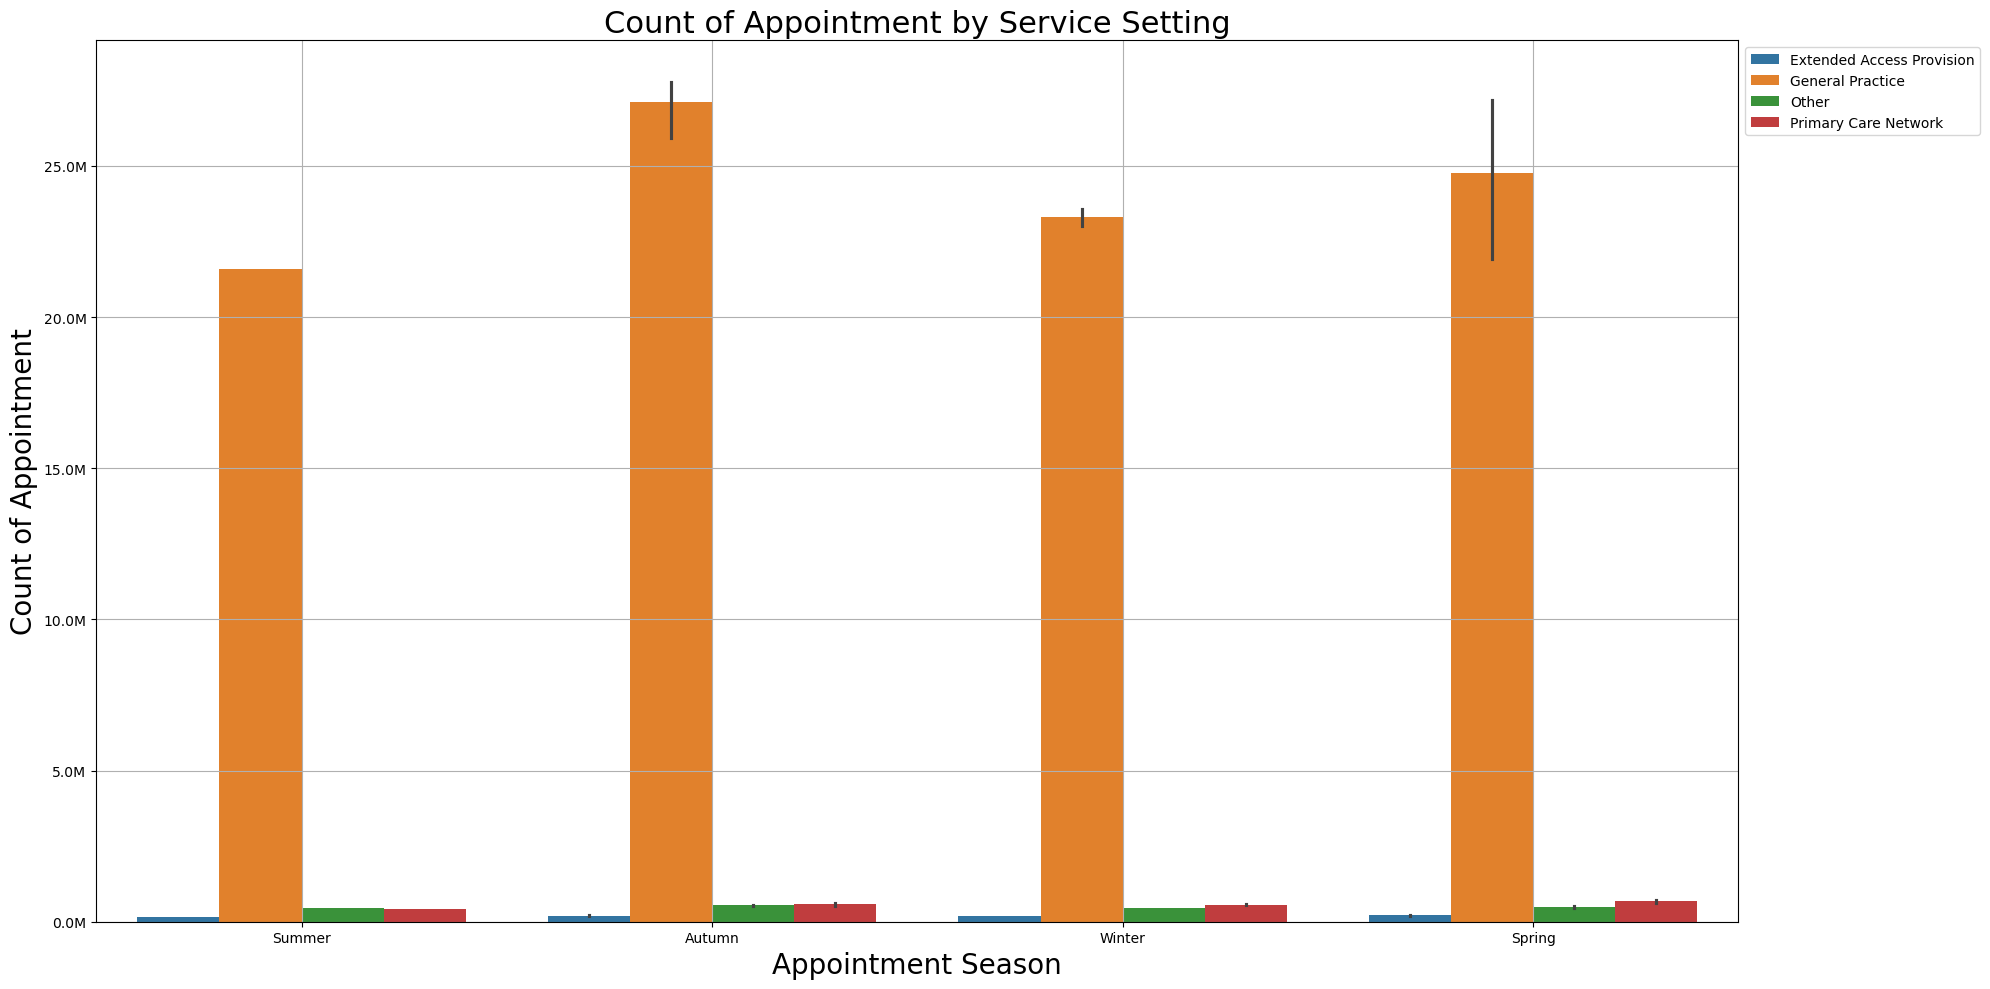

In [558]:
#I plot this as a barplot.
#I also create another modular function to format the y-axis.
nc_season_bar = plt.figure(figsize=(20, 10))
nc_season_bar = sns.barplot(x='appointment_month', y='count_of_appointments', hue='service_setting', data=nc_season)
nc_season_bar.set_title('Count of Appointment by Service Setting', fontdict={'size': 22})
nc_season_bar.set_xlabel('Appointment Season', fontdict={'size': 20})
nc_season_bar.set_ylabel('Count of Appointment', fontdict={'size': 20})
plt.tight_layout()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

def mformat(y, pos):
    return f'{y/1000000:.1f}M'
    
nc_season_bar.yaxis.set_major_formatter(ticker.FuncFormatter(mformat))

plt.tight_layout()
plt.show()

Let's replot this without GP data.

In [409]:
nc_season = nc_season[~nc_season['service_setting'].str.contains('General Practice', case=False, na=False)]
nc_season.head()

appointment_month            service_setting  count_of_appointments
0            Summer  Extended Access Provision                 160927
2            Summer                      Other                 449101
3            Summer       Primary Care Network                 432448
5            Autumn  Extended Access Provision                 187906
7            Autumn                      Other                 527174

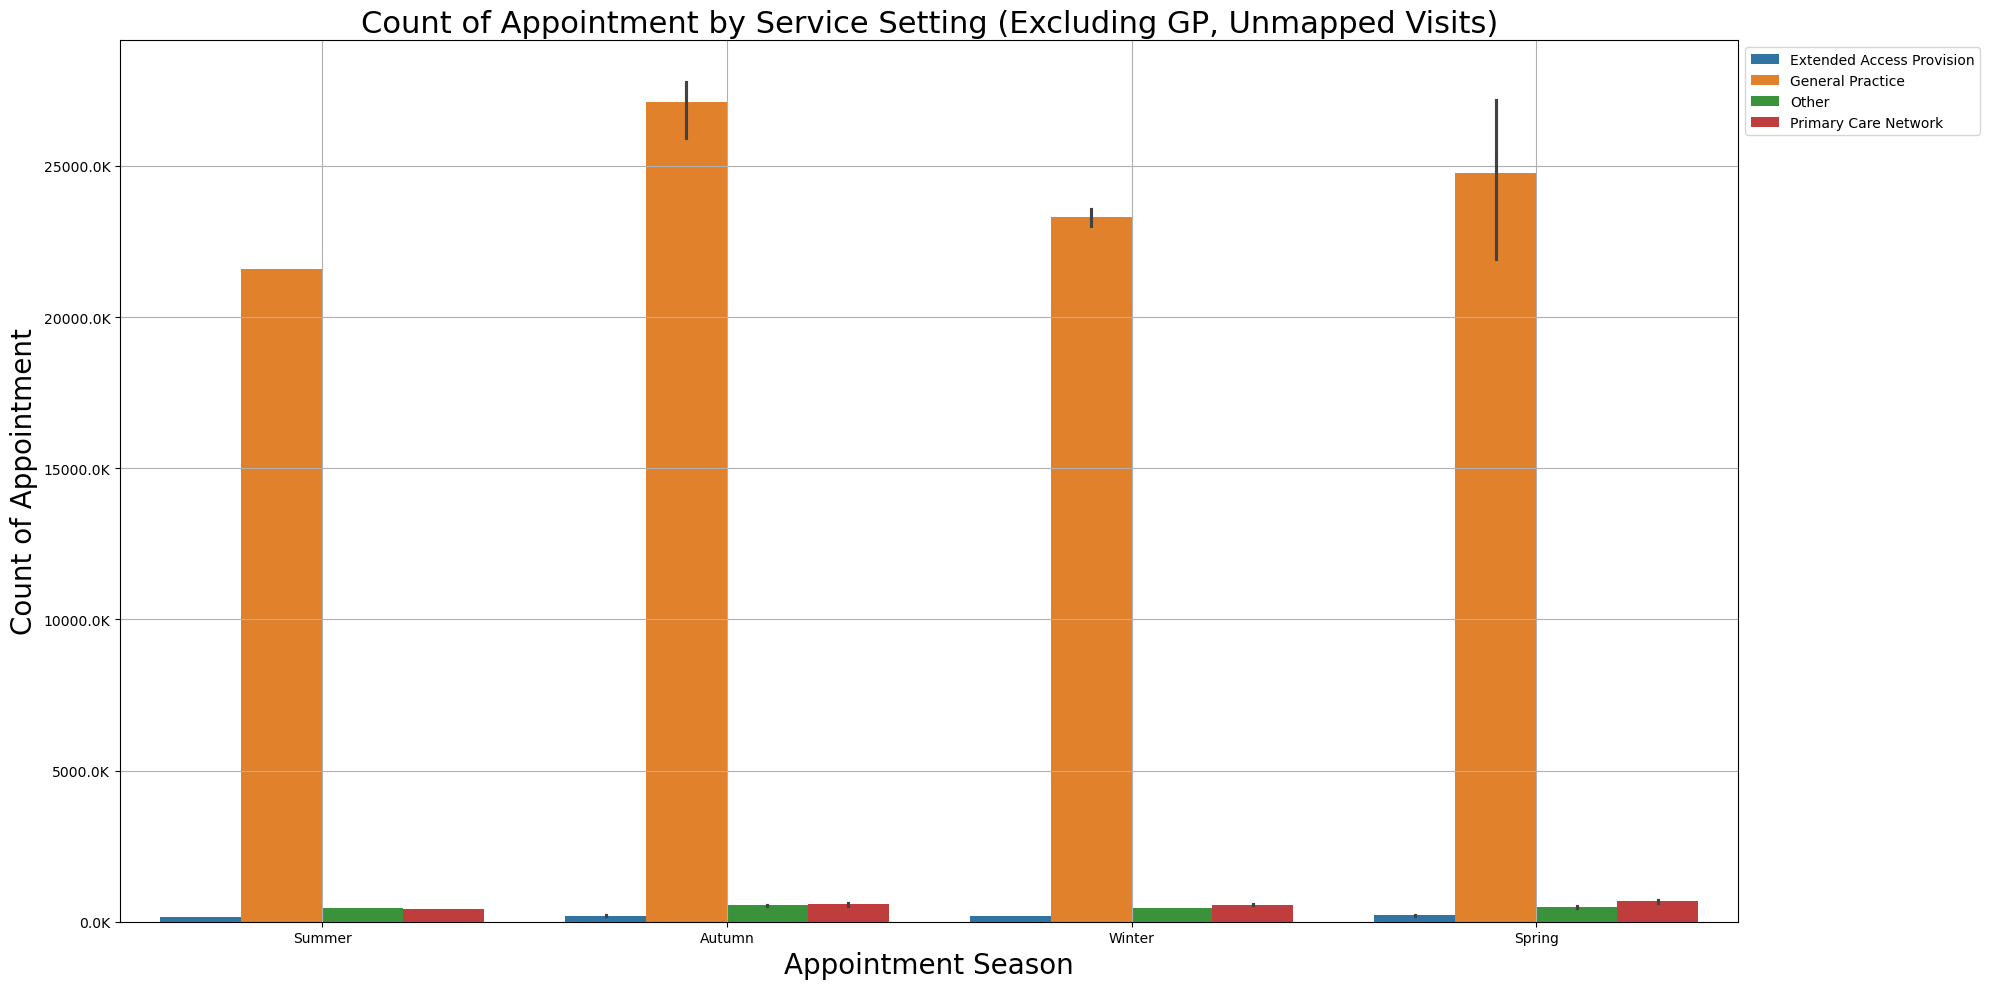

In [812]:
nc_season_bar = plt.figure(figsize=(20, 10))
nc_season_bar = sns.barplot(x='appointment_month', y='count_of_appointments', hue='service_setting', data=nc_season)
nc_season_bar.set_title('Count of Appointment by Service Setting (Excluding GP, Unmapped Visits)', fontdict={'size': 22})
nc_season_bar.set_xlabel('Appointment Season', fontdict={'size': 20})
nc_season_bar.set_ylabel('Count of Appointment', fontdict={'size': 20})
plt.tight_layout()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

def kformat(y, pos):
    return f'{y/1000:.1f}K'
    
nc_season_bar.yaxis.set_major_formatter(ticker.FuncFormatter(kformat))

plt.tight_layout()
plt.show()

Let's create a lineplot for each season. 

In [644]:
#I create a new DataFrame, 'nc_sum', containing relevant columns.
#I then use the '.loc()' function to return the date range.
#I sort the dates from oldest to newest using the '.sort_values()' method.
nc_sum = nc[["appointment_date","service_setting","count_of_appointments"]]
nc_sum = nc_sum.loc[nc_sum['appointment_date'].dt.month == 8]
nc_sum = nc_sum.sort_values(by='appointment_date').reset_index(drop=True)
nc_sum = nc_sum[~nc_sum['service_setting'].str.contains('Unmapped', case=False, na=False)]
nc_sum.head()

appointment_date            service_setting  count_of_appointments
0       2021-08-01           General Practice                     18
1       2021-08-01           General Practice                    116
2       2021-08-01           General Practice                      3
3       2021-08-01           General Practice                     29
4       2021-08-01  Extended Access Provision                      3

In [646]:
nc_sumgroup = nc_sum.groupby(['appointment_date', 'service_setting'], as_index=False)['count_of_appointments'].sum()
nc_sumgroup

appointment_date            service_setting  count_of_appointments
0         2021-08-01  Extended Access Provision                    438
1         2021-08-01           General Practice                   3411
2         2021-08-01                      Other                    401
3         2021-08-01       Primary Care Network                    323
4         2021-08-02  Extended Access Provision                   7705
..               ...                        ...                    ...
119       2021-08-30       Primary Care Network                    195
120       2021-08-31  Extended Access Provision                   8281
121       2021-08-31           General Practice                1125584
122       2021-08-31                      Other                  23181
123       2021-08-31       Primary Care Network                  21789

[124 rows x 3 columns]

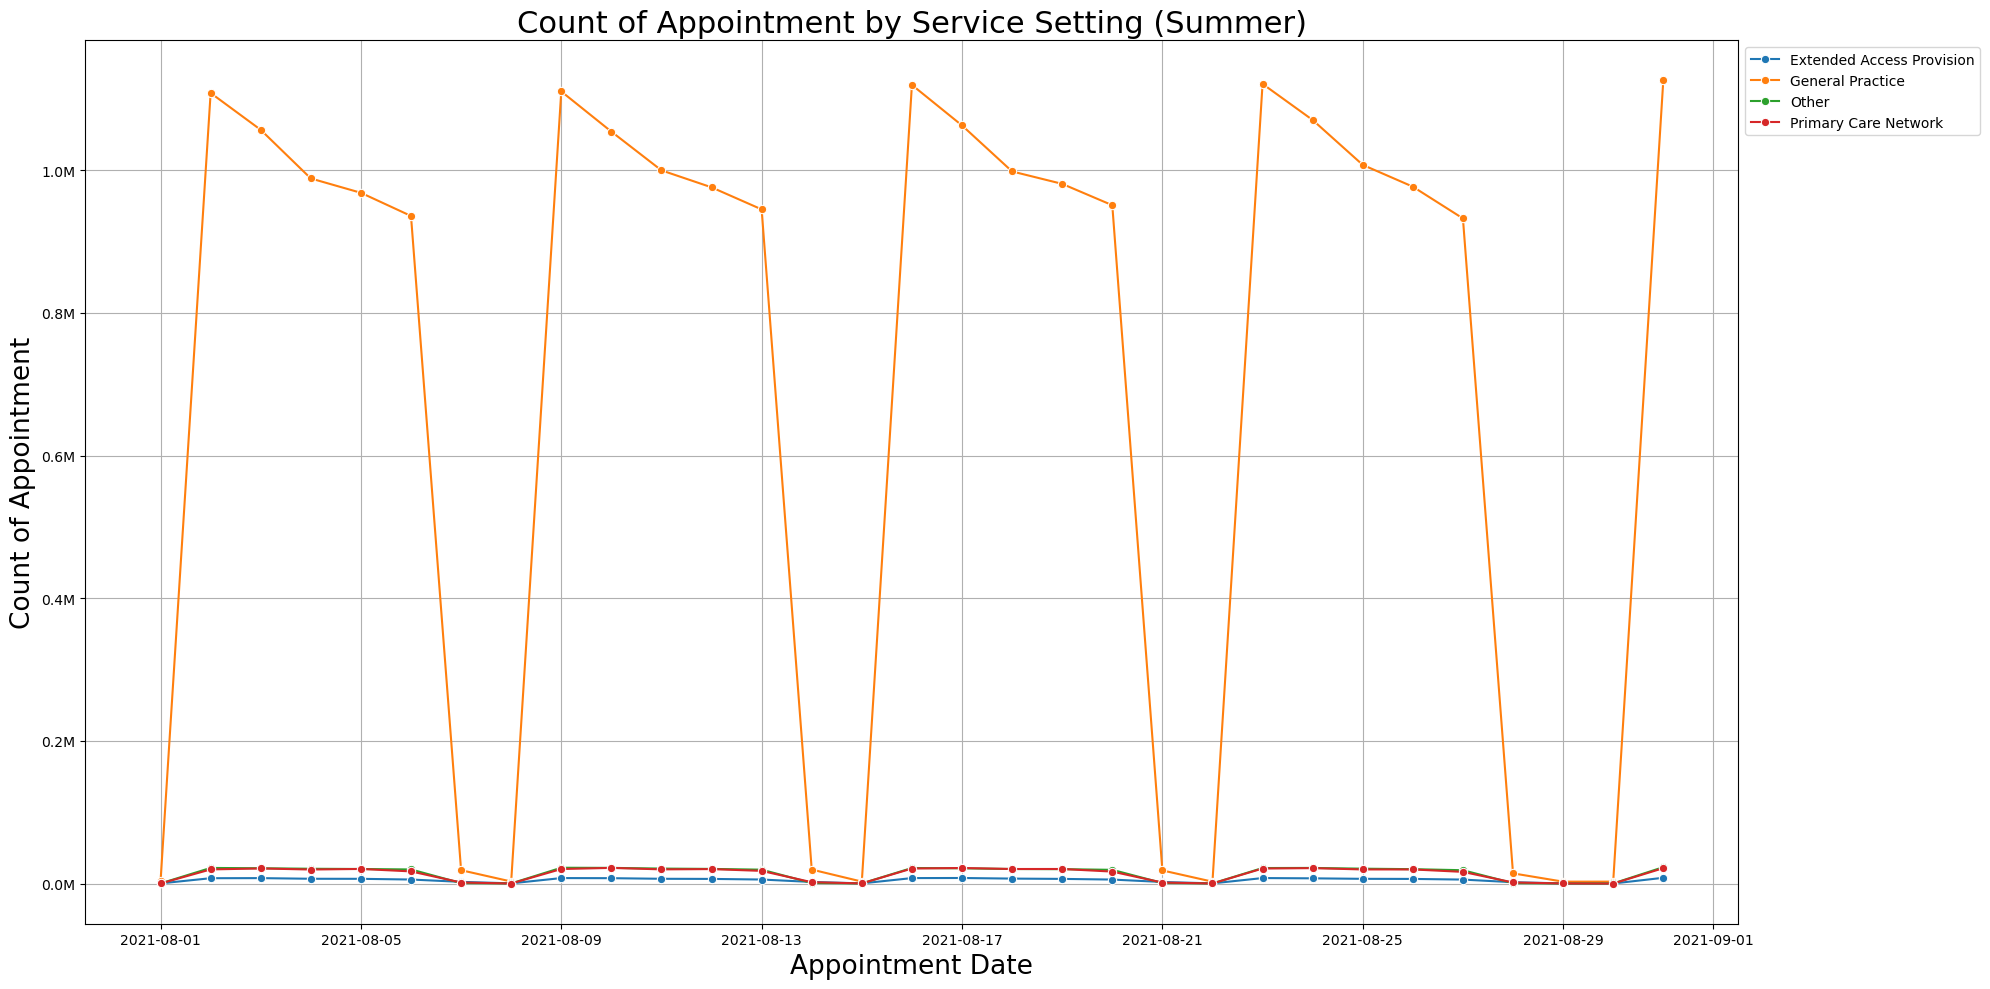

In [648]:
#I plot this as a lineplot.
fig_nc_sum = plt.figure(figsize=(20, 10))
fig_nc_sum = sns.lineplot(x='appointment_date', y='count_of_appointments', hue='service_setting',  marker='o', errorbar=None, data=nc_sumgroup)
fig_nc_sum.set_title('Count of Appointment by Service Setting (Summer)', fontdict={'size': 22})
fig_nc_sum.set_xlabel('Appointment Date', fontdict={'size': 19})
fig_nc_sum.set_ylabel('Count of Appointment', fontdict={'size': 19})
plt.tight_layout()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

def mformat(y, pos):
    return f'{y/1000000:.1f}M'
    
fig_nc_sum.yaxis.set_major_formatter(ticker.FuncFormatter(mformat))

plt.tight_layout()
plt.show()

In [654]:
nc_summerexgp = nc_sumgroup[~nc_sumgroup['service_setting'].str.contains('General Practice', case=False, na=False)]
nc_summerexgp 

appointment_date            service_setting  count_of_appointments
0         2021-08-01  Extended Access Provision                    438
2         2021-08-01                      Other                    401
3         2021-08-01       Primary Care Network                    323
4         2021-08-02  Extended Access Provision                   7705
6         2021-08-02                      Other                  22098
..               ...                        ...                    ...
118       2021-08-30                      Other                    380
119       2021-08-30       Primary Care Network                    195
120       2021-08-31  Extended Access Provision                   8281
122       2021-08-31                      Other                  23181
123       2021-08-31       Primary Care Network                  21789

[93 rows x 3 columns]

Let's exclude GP data.

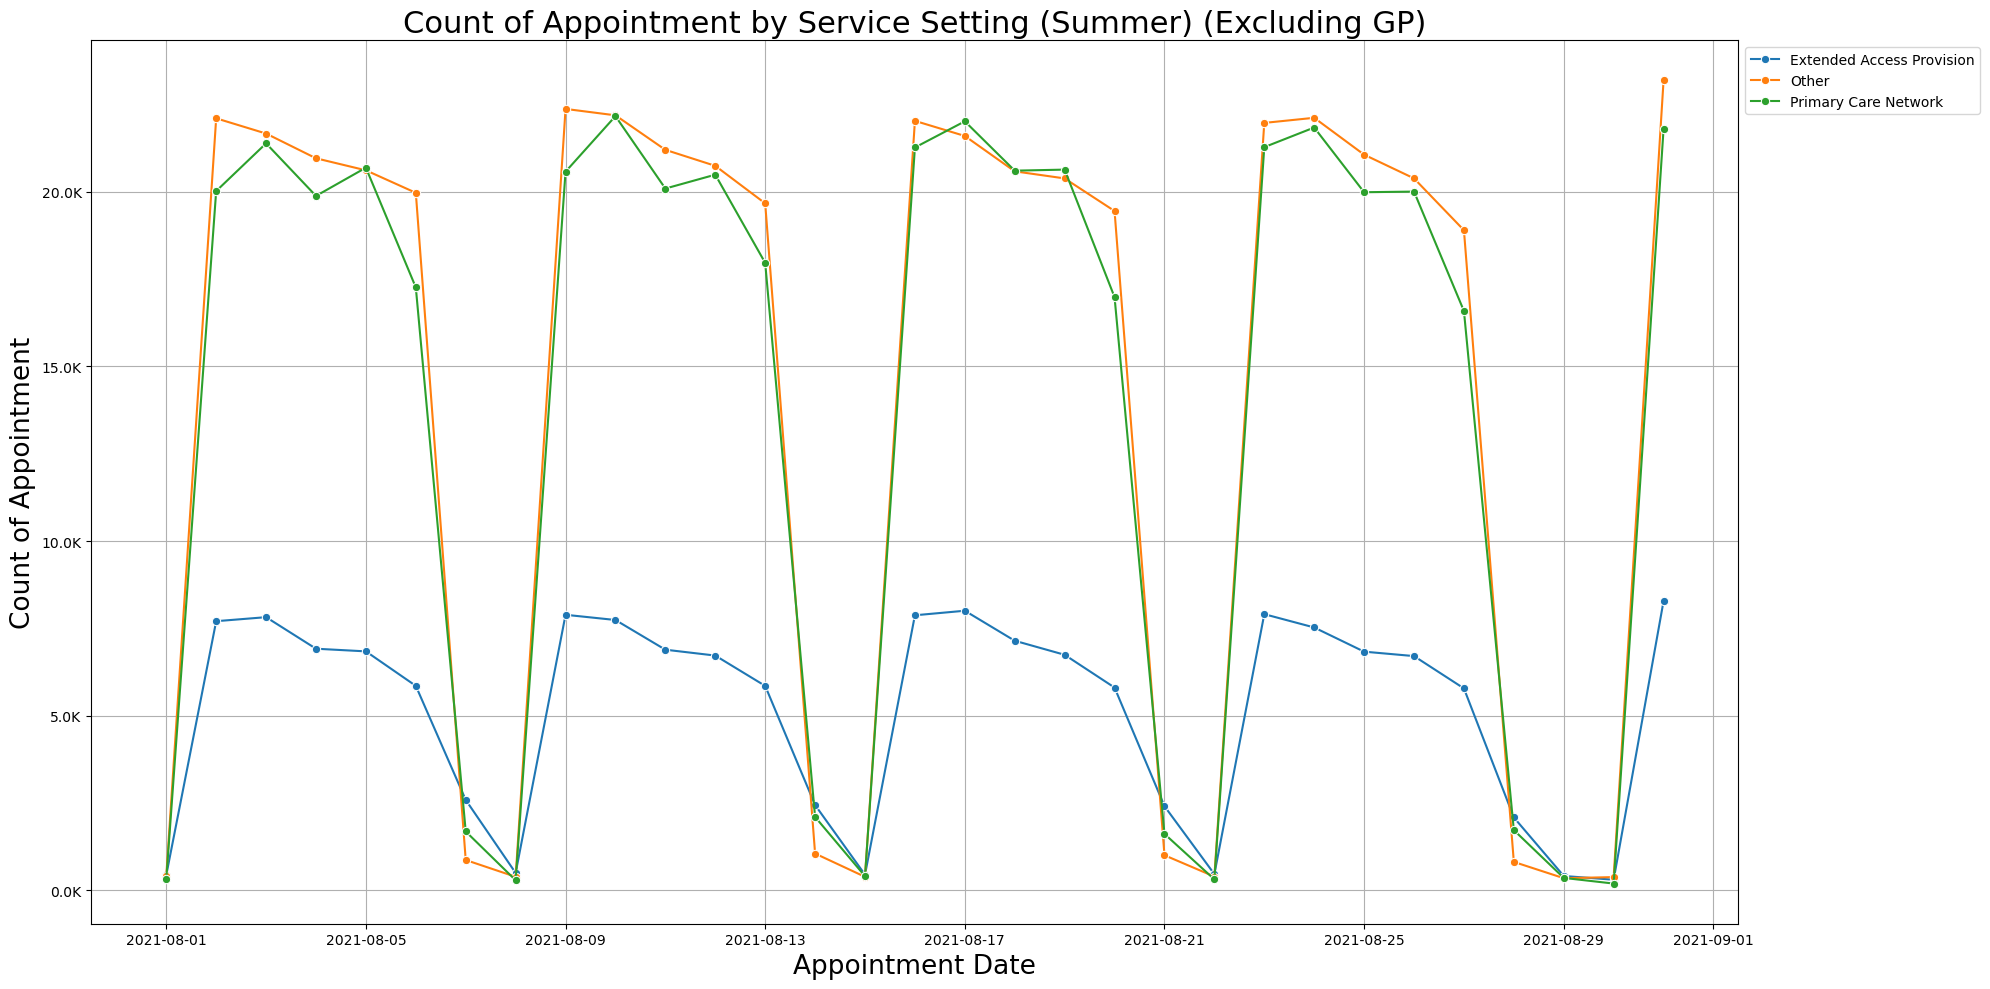

In [808]:
fig_nc_summerexgp = plt.figure(figsize=(20, 10))
fig_nc_summerexgp = sns.lineplot(x='appointment_date', y='count_of_appointments', hue='service_setting',  marker='o', errorbar=None, data=nc_summerexgp)
fig_nc_summerexgp.set_title('Count of Appointment by Service Setting (Summer) (Excluding GP)', fontdict={'size': 22})
fig_nc_summerexgp.set_xlabel('Appointment Date', fontdict={'size': 19})
fig_nc_summerexgp.set_ylabel('Count of Appointment', fontdict={'size': 19})
plt.tight_layout()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

def kformat(y, pos):
    return f'{y/1000:.1f}K'
    
fig_nc_summerexgp.yaxis.set_major_formatter(ticker.FuncFormatter(kformat))

plt.tight_layout()
plt.show()

So, we have a lineplot showing appointment count by service setting in summer for the 'national_categories' dataset.

In [661]:
#I repeated the same process for autumn.
nc_autumn = nc[["appointment_date","service_setting","count_of_appointments"]]
nc_autumn.head()

appointment_date       service_setting  count_of_appointments
0       2021-08-02  Primary Care Network                      3
1       2021-08-02                 Other                      7
2       2021-08-02      General Practice                     79
3       2021-08-02      General Practice                    725
4       2021-08-02      General Practice                      2

In [663]:
#To select the relevant months, I used the '.isin()' function.
nc_autumn = nc_autumn.loc[nc_autumn['appointment_date'].dt.month.isin([9, 10, 11])]
nc_autumn = nc_autumn.sort_values(by='appointment_date')
nc_autumn = nc_autumn[~nc_autumn['service_setting'].str.contains('Unmapped', case=False, na=False)]
nc_autumn.head()

appointment_date   service_setting  count_of_appointments
67578       2021-09-01  General Practice                    940
67577       2021-09-01  General Practice                   1558
67576       2021-09-01  General Practice                     58
67575       2021-09-01  General Practice                     31
67574       2021-09-01  General Practice                    185

In [665]:
nc_autumn = nc_autumn.groupby(['appointment_date', 'service_setting'], as_index=False)['count_of_appointments'].sum()

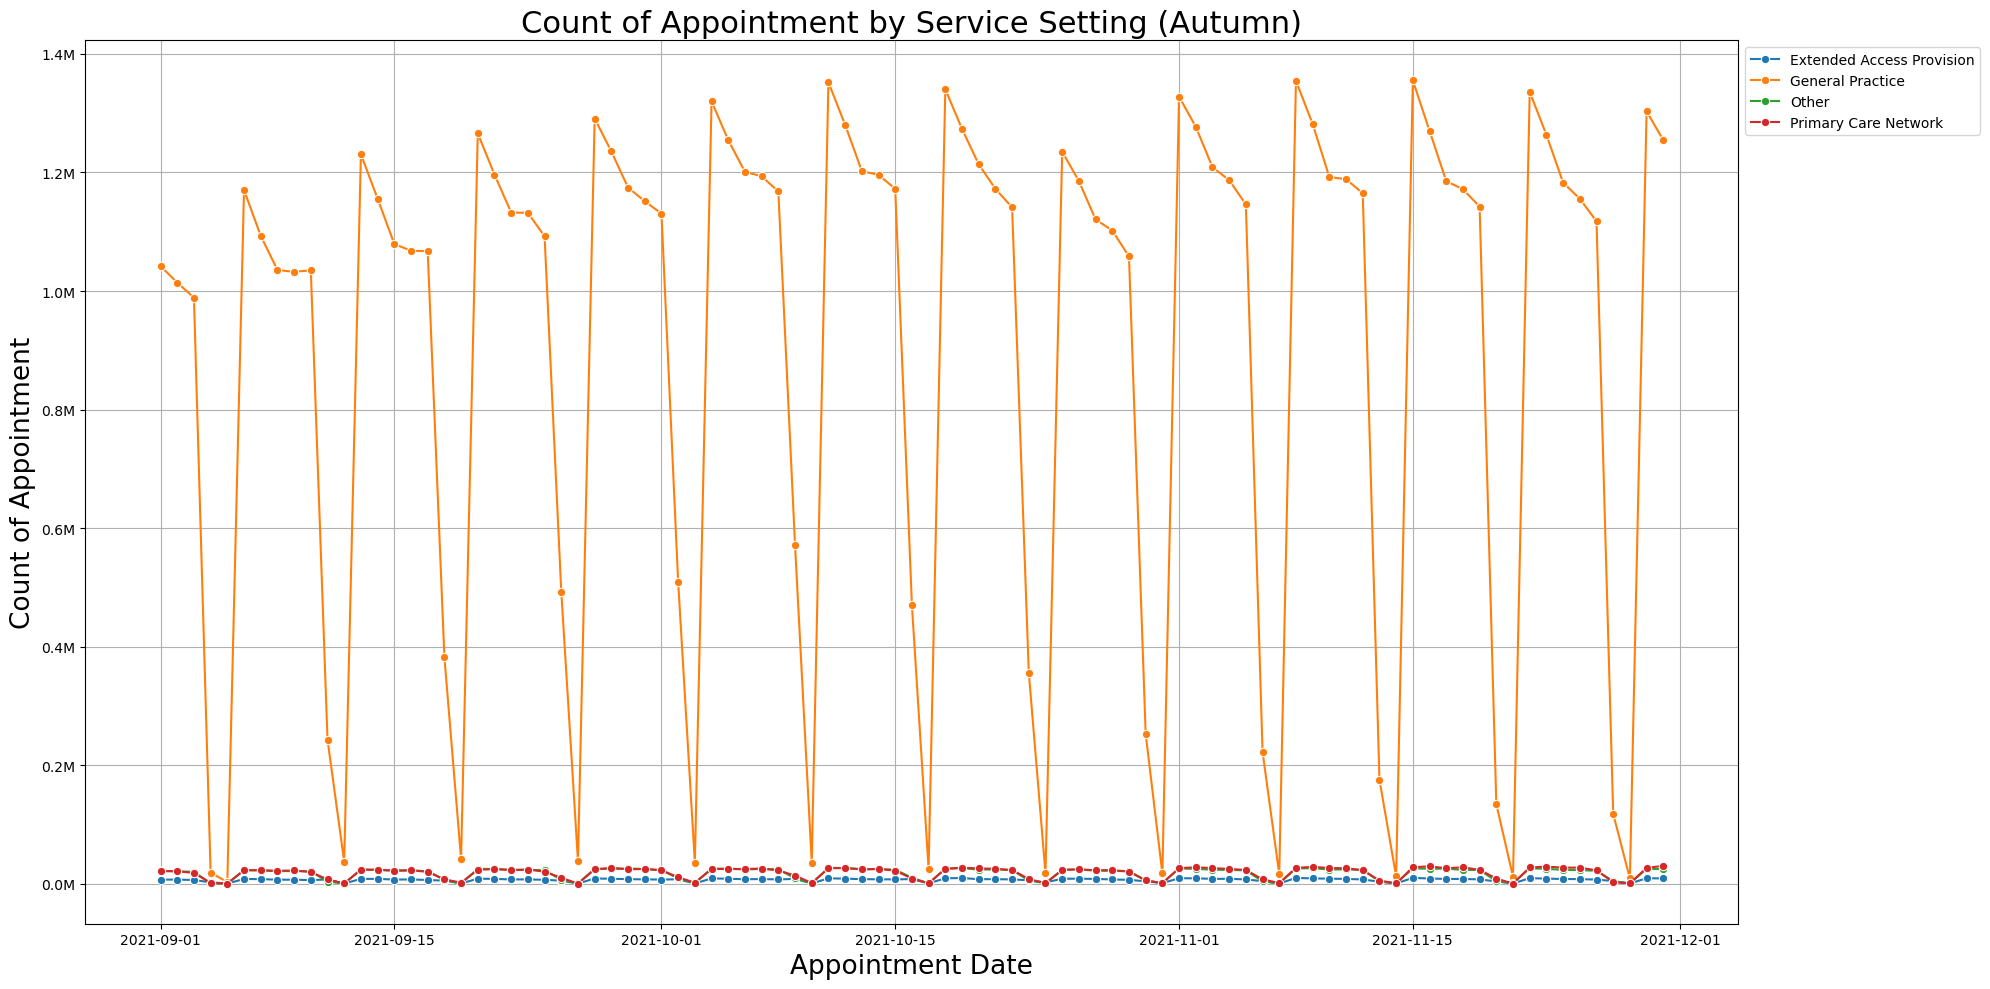

In [667]:
fig_nc_autumn = plt.figure(figsize=(20, 10))
fig_nc_autumn = sns.lineplot(x='appointment_date', y='count_of_appointments', hue='service_setting', errorbar=None, marker='o', data=nc_autumn)
fig_nc_autumn.set_title('Count of Appointment by Service Setting (Autumn)', fontdict={'size': 22})
fig_nc_autumn.set_xlabel('Appointment Date', fontdict={'size': 19})
fig_nc_autumn.set_ylabel('Count of Appointment', fontdict={'size': 19})
plt.tight_layout()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

def mformat(y, pos):
    return f'{y/1000000:.1f}M'
    
fig_nc_autumn.yaxis.set_major_formatter(ticker.FuncFormatter(mformat))

plt.tight_layout()
plt.show()

In [669]:
nc_autumnexgp = nc_autumn[~nc_autumn['service_setting'].str.contains('General Practice', case=False, na=False)]

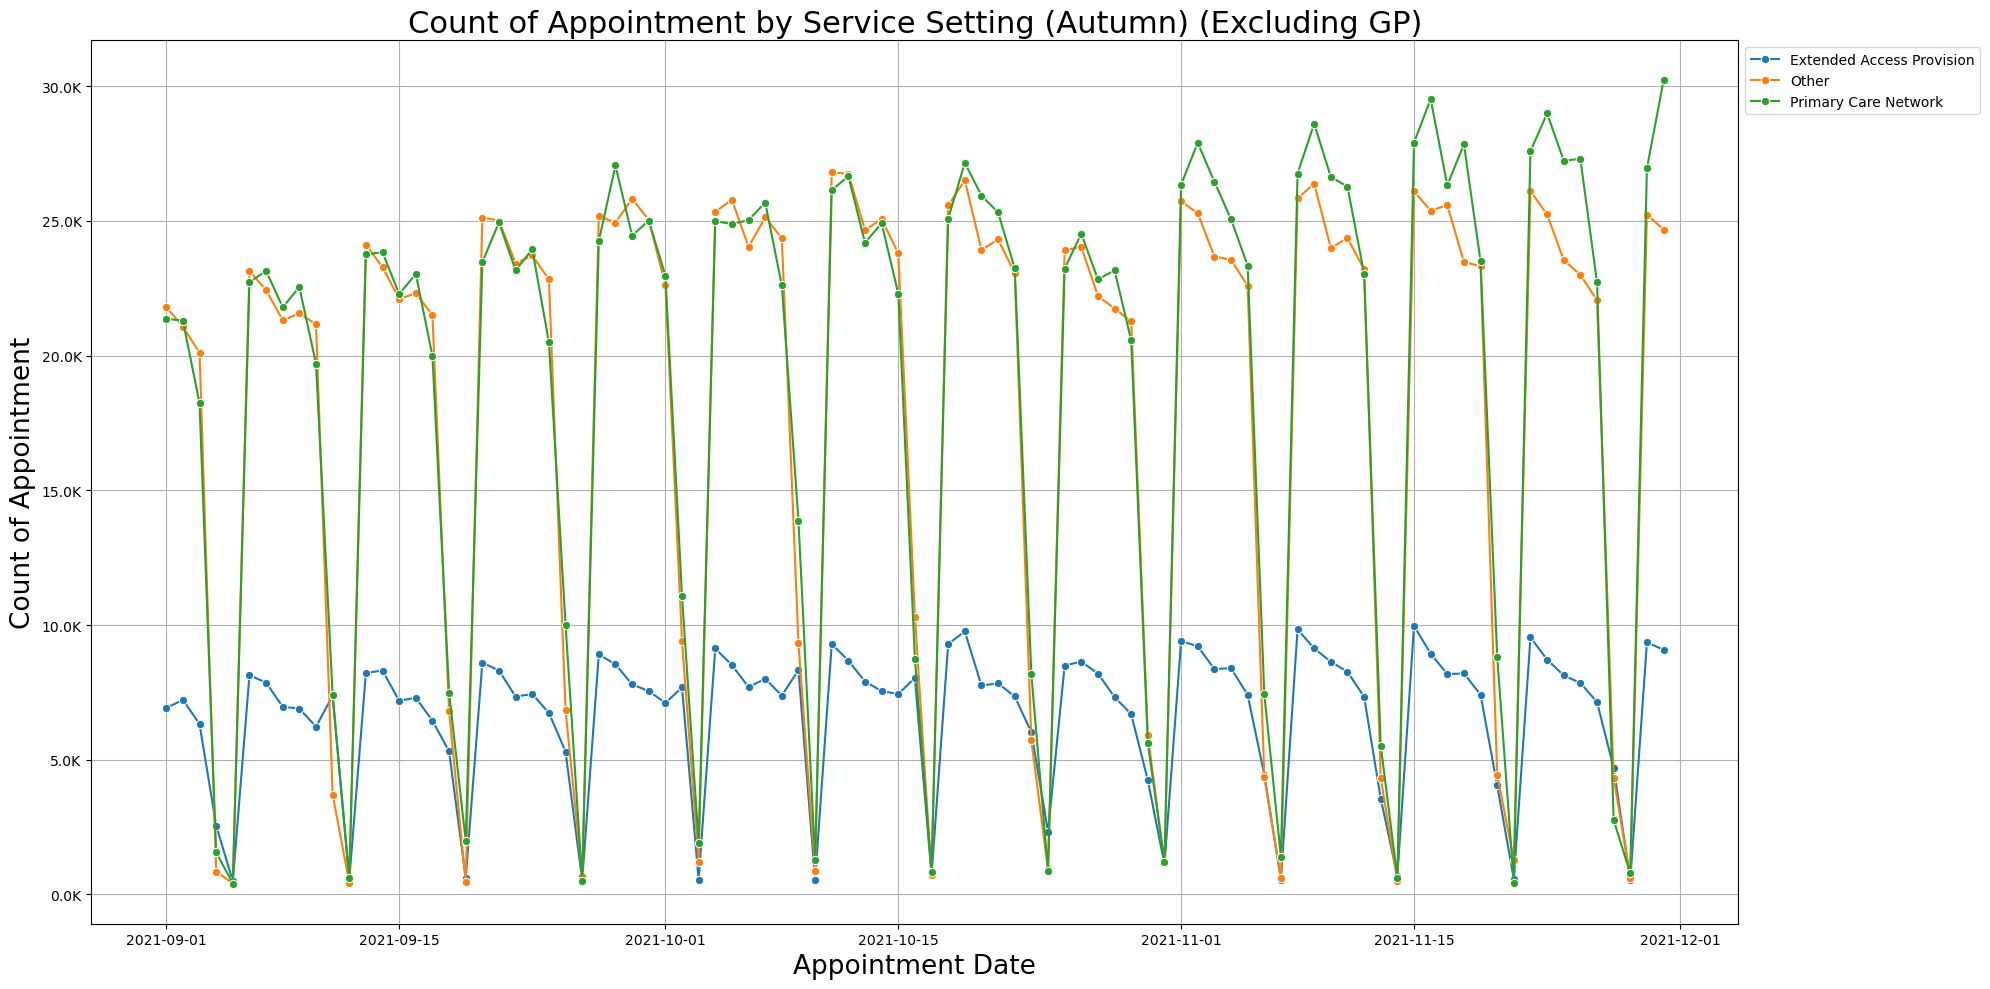

In [673]:
fig_nc_autumnexgp = plt.figure(figsize=(20, 10))
fig_nc_autumnexgp = sns.lineplot(x='appointment_date', y='count_of_appointments', hue='service_setting', errorbar=None, marker='o', data=nc_autumnexgp)
fig_nc_autumnexgp.set_title('Count of Appointment by Service Setting (Autumn) (Excluding GP)', fontdict={'size': 22})
fig_nc_autumnexgp.set_xlabel('Appointment Date', fontdict={'size': 19})
fig_nc_autumnexgp.set_ylabel('Count of Appointment', fontdict={'size': 19})
plt.tight_layout()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

def kformat(y, pos):
    return f'{y/1000:.1f}K'
    
fig_nc_autumnexgp.yaxis.set_major_formatter(ticker.FuncFormatter(kformat))

plt.tight_layout()
plt.show()

So, we have a lineplot showing appointment count by service setting in autumn for the 'national_categories' dataset.

In [675]:
#I repeated the same process for winter.
nc_winter = nc[["appointment_date", "service_setting", "count_of_appointments"]]
nc_winter = nc_winter.loc[nc_winter['appointment_date'].dt.month.isin([12, 1, 2])]
nc_winter = nc_winter.sort_values(by='appointment_date')
nc_winter = nc_winter[~nc_winter['service_setting'].str.contains('Unmapped', case=False, na=False)]
nc_winter = nc_winter.groupby(['appointment_date', 'service_setting'], as_index=False)['count_of_appointments'].sum()
nc_winter.head()

appointment_date            service_setting  count_of_appointments
0       2021-12-01  Extended Access Provision                   8500
1       2021-12-01           General Practice                1162676
2       2021-12-01                      Other                  22924
3       2021-12-01       Primary Care Network                  26887
4       2021-12-02  Extended Access Provision                   8023

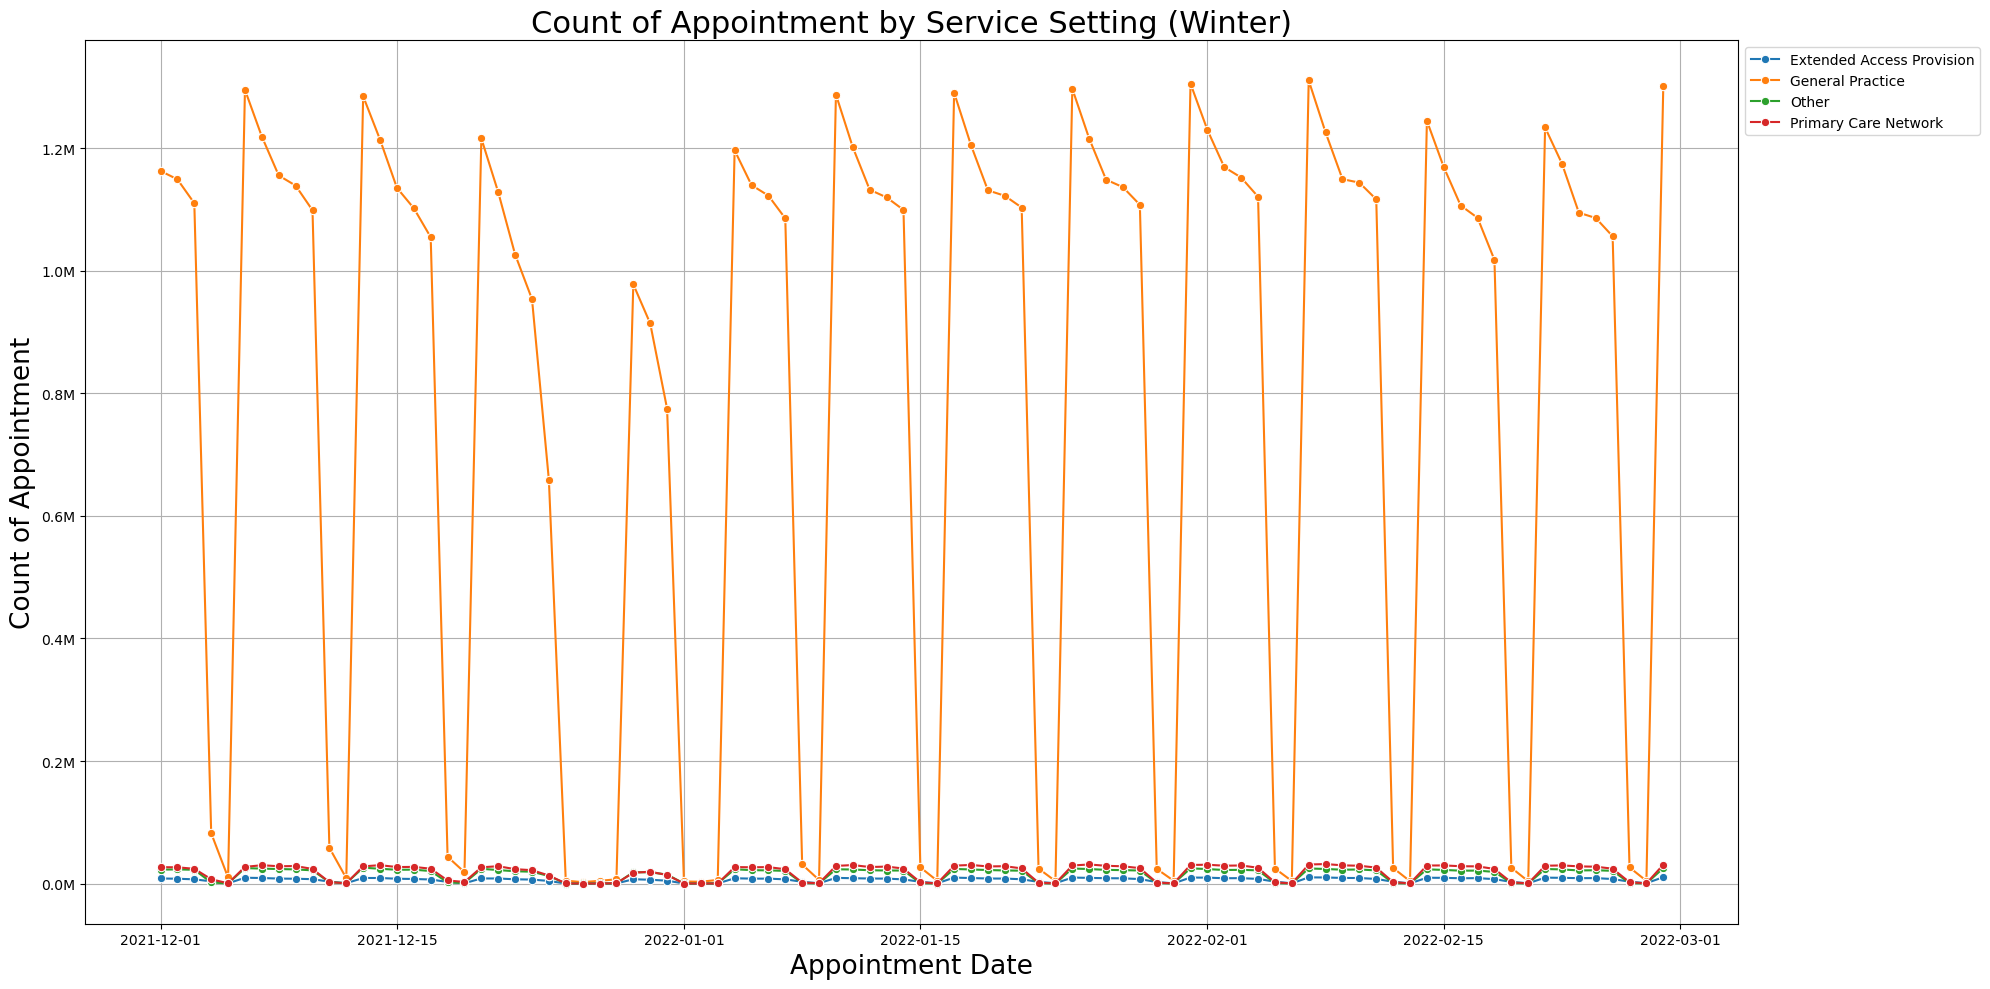

In [677]:
fig_nc_winter = plt.figure(figsize=(20, 10))
fig_nc_winter = sns.lineplot(x='appointment_date', y='count_of_appointments', hue='service_setting', errorbar=None, marker='o', data=nc_winter)
fig_nc_winter.set_title('Count of Appointment by Service Setting (Winter)', fontdict={'size': 22})
fig_nc_winter.set_xlabel('Appointment Date', fontdict={'size': 19})
fig_nc_winter.set_ylabel('Count of Appointment', fontdict={'size': 19})
plt.tight_layout()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

def mformat(y, pos):
    return f'{y/1000000:.1f}M'
    
fig_nc_winter.yaxis.set_major_formatter(ticker.FuncFormatter(mformat))

plt.tight_layout()
plt.show()

In [679]:
nc_winterexgp = nc_winter[~nc_winter['service_setting'].str.contains('General Practice', case=False, na=False)]

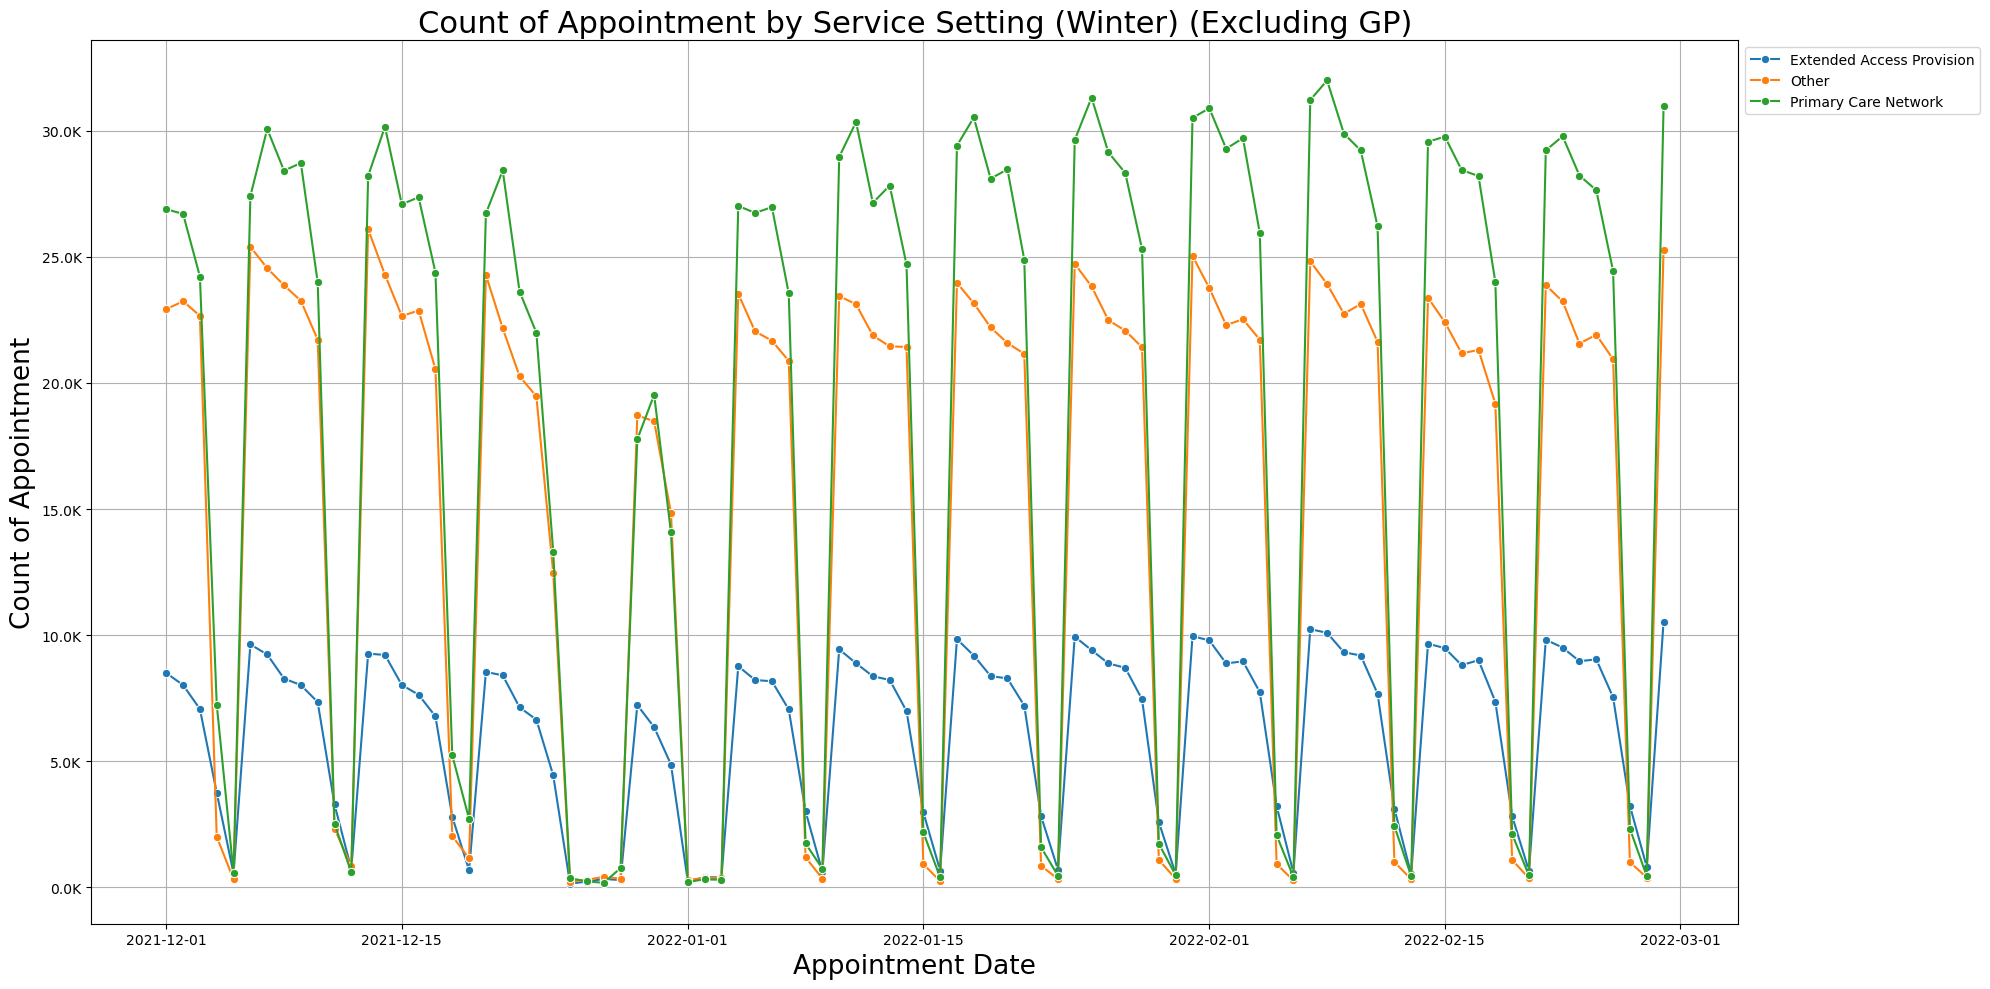

In [687]:
fig_nc_winterexgp = plt.figure(figsize=(20, 10))
fig_nc_winterexgp = sns.lineplot(x='appointment_date', y='count_of_appointments', hue='service_setting', errorbar=None, marker='o', data=nc_winterexgp)
fig_nc_winterexgp.set_title('Count of Appointment by Service Setting (Winter) (Excluding GP)', fontdict={'size': 22})
fig_nc_winterexgp.set_xlabel('Appointment Date', fontdict={'size': 19})
fig_nc_winterexgp.set_ylabel('Count of Appointment', fontdict={'size': 19})
plt.tight_layout()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

def kformat(y, pos):
    return f'{y/1000:.1f}K'
    
fig_nc_winterexgp.yaxis.set_major_formatter(ticker.FuncFormatter(kformat))

plt.tight_layout()
plt.show()

So, we have a lineplot showing appointment count by service setting in winter for the 'national_categories' dataset.

In [683]:
#I repeated the same process for spring.
nc_spring = nc[["appointment_date", "service_setting", "count_of_appointments"]]
nc_spring = nc_spring.loc[nc_spring['appointment_date'].dt.month.isin([3, 4, 5])]
nc_spring = nc_spring.sort_values(by='appointment_date')
nc_spring = nc_spring[~nc_spring['service_setting'].str.contains('Unmapped', case=False, na=False)]
nc_spring = nc_spring.groupby(['appointment_date', 'service_setting'], as_index=False)['count_of_appointments'].sum()
nc_spring.head()

appointment_date            service_setting  count_of_appointments
0       2022-03-01  Extended Access Provision                  10082
1       2022-03-01           General Practice                1229045
2       2022-03-01                      Other                  23986
3       2022-03-01       Primary Care Network                  32070
4       2022-03-02  Extended Access Provision                   9660

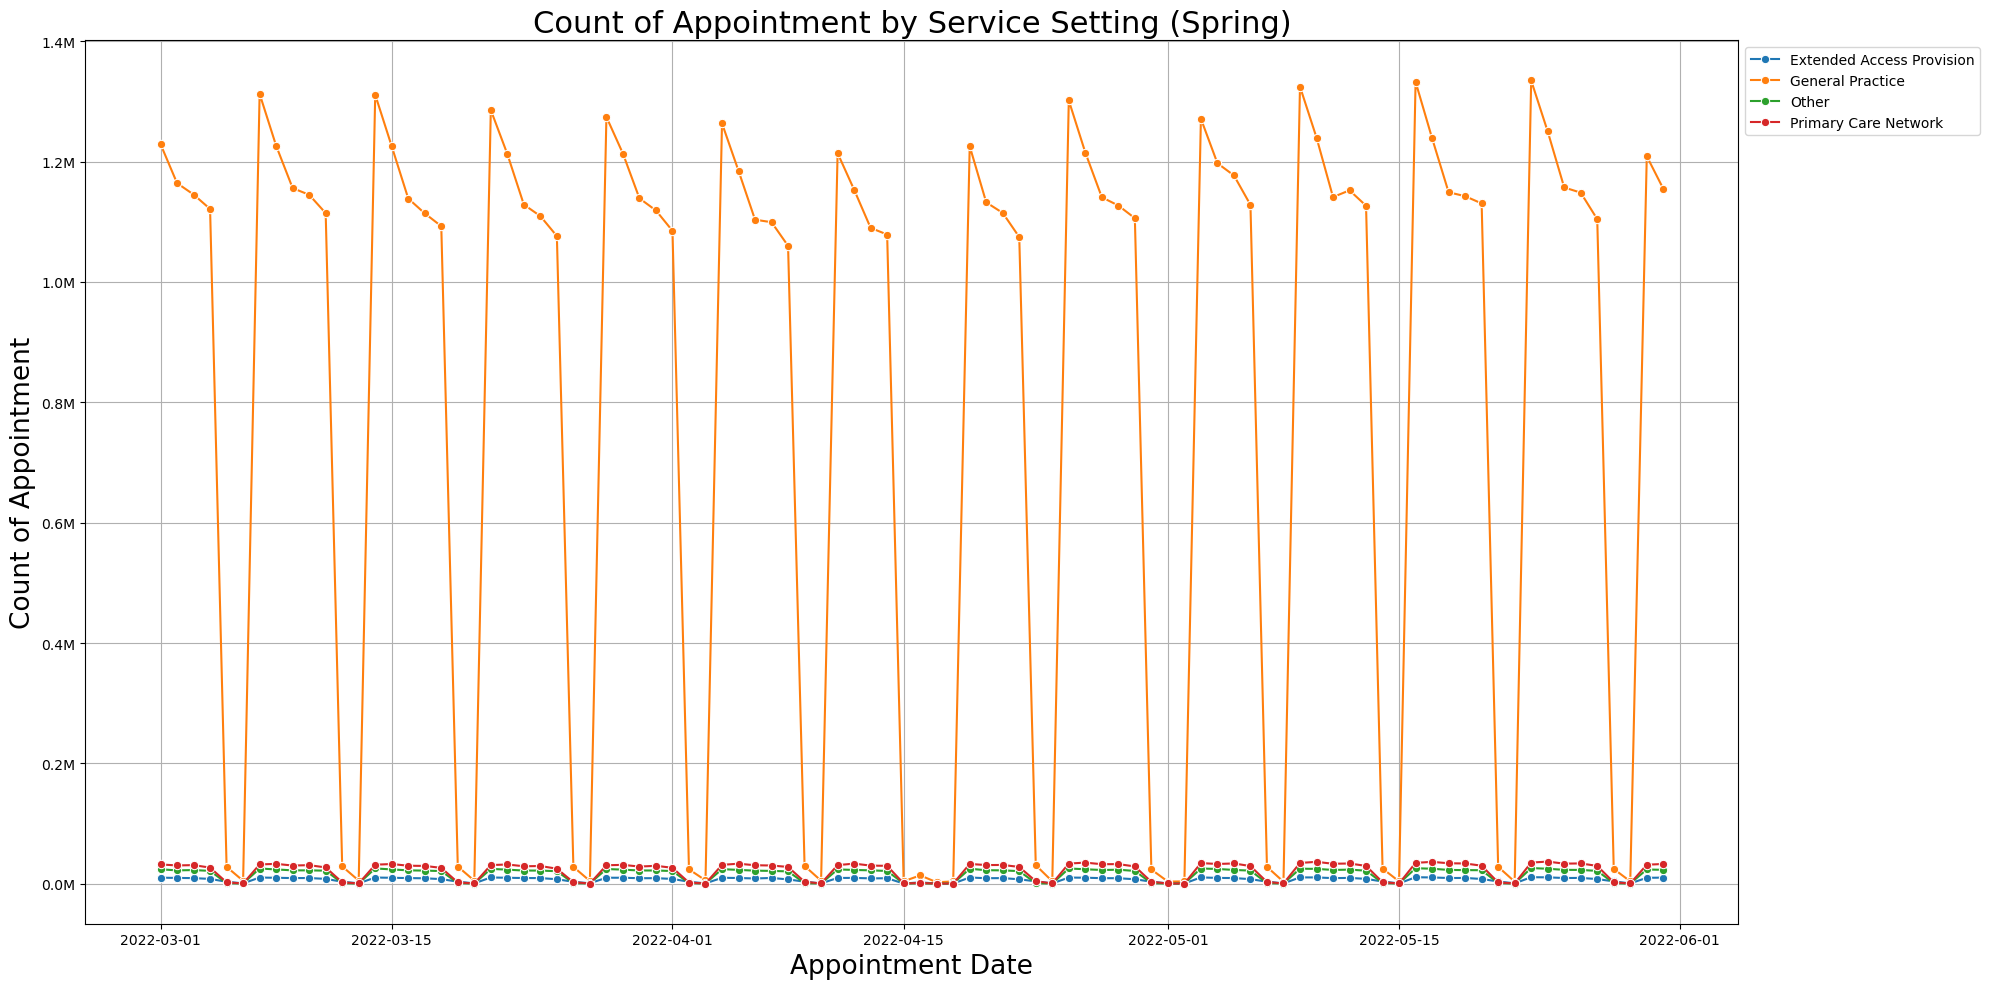

In [689]:
fig_nc_spring = plt.figure(figsize=(20, 10))
fig_nc_spring = sns.lineplot(x='appointment_date', y='count_of_appointments', hue='service_setting', errorbar=None, marker='o', data=nc_spring)
fig_nc_spring.set_title('Count of Appointment by Service Setting (Spring)', fontdict={'size': 22})
fig_nc_spring.set_xlabel('Appointment Date', fontdict={'size': 19})
fig_nc_spring.set_ylabel('Count of Appointment', fontdict={'size': 19})
plt.tight_layout()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

def mformat(y, pos):
    return f'{y/1000000:.1f}M'
    
fig_nc_spring.yaxis.set_major_formatter(ticker.FuncFormatter(mformat))

plt.tight_layout()
plt.show()


In [691]:
nc_springexgp = nc_spring[~nc_spring['service_setting'].str.contains('General Practice', case=False, na=False)]

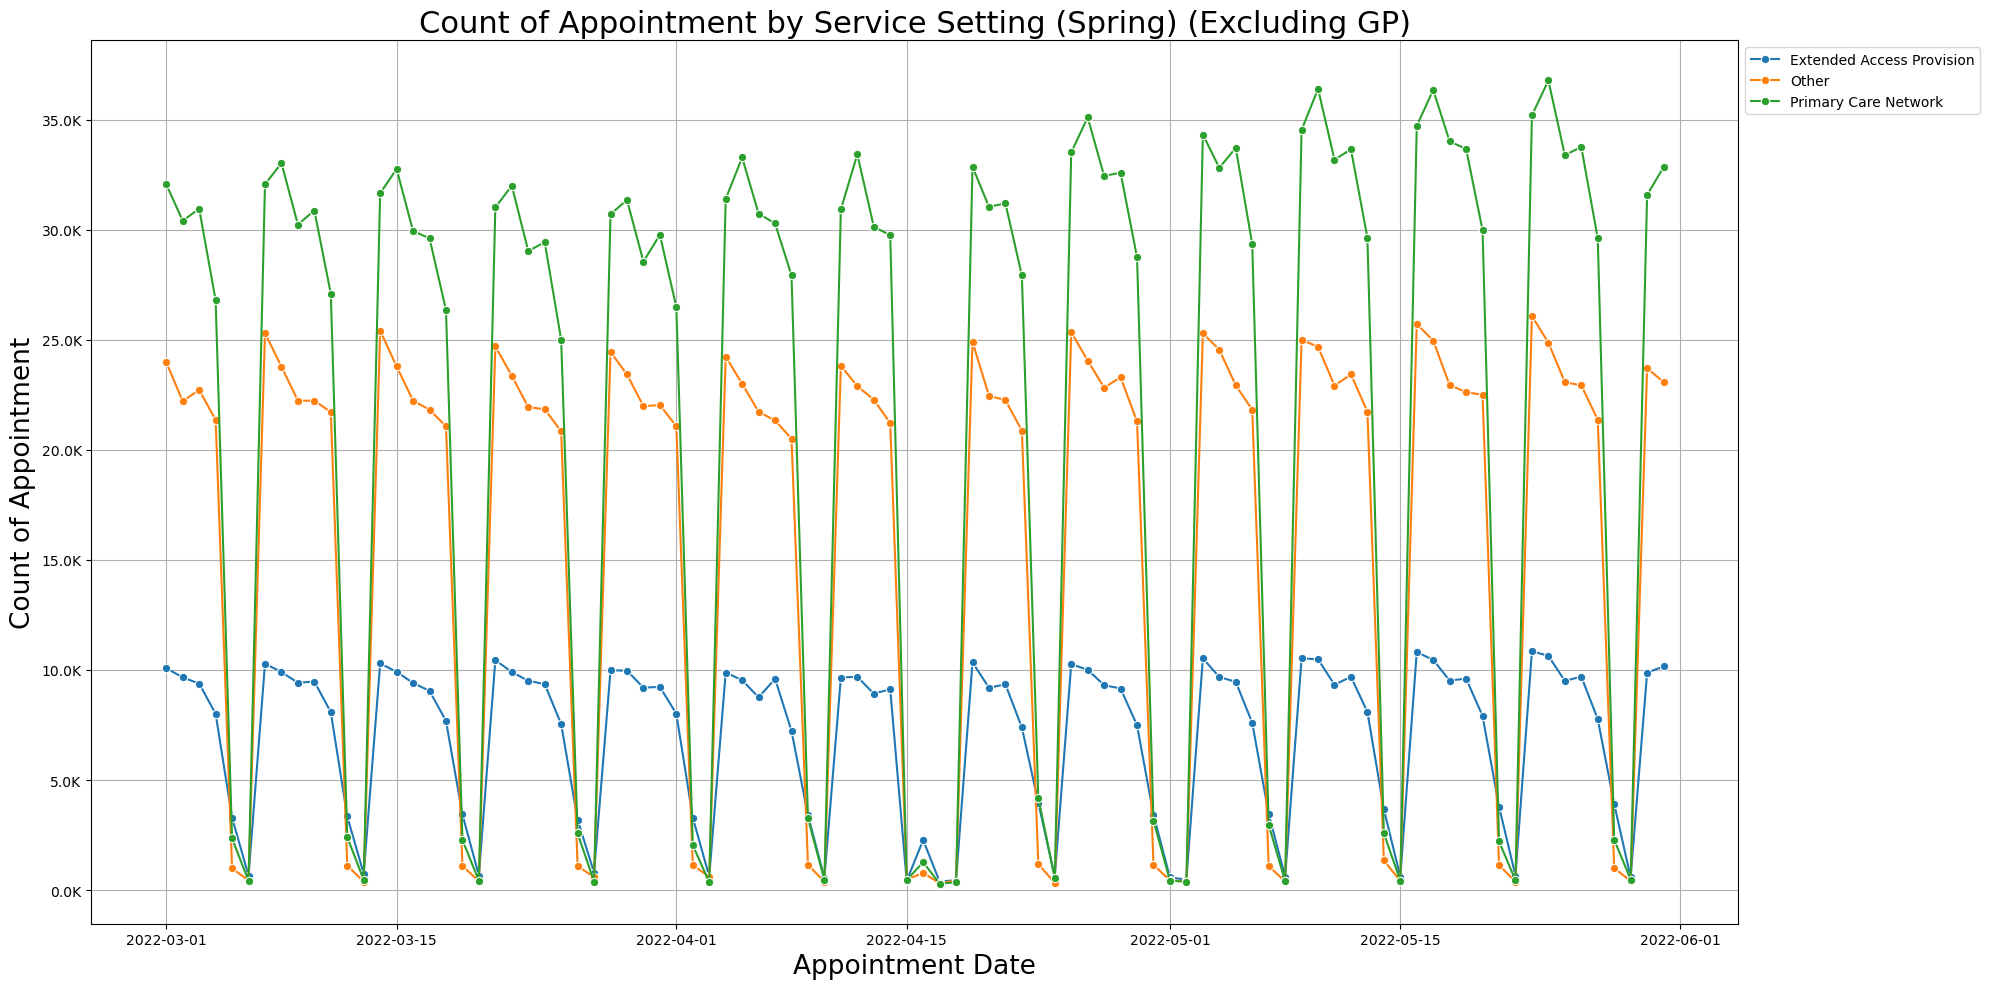

In [695]:
fig_nc_springexgp = plt.figure(figsize=(20, 10))
fig_nc_springexgp = sns.lineplot(x='appointment_date', y='count_of_appointments', hue='service_setting', errorbar=None, marker='o', data=nc_springexgp)
fig_nc_springexgp.set_title('Count of Appointment by Service Setting (Spring) (Excluding GP)', fontdict={'size': 22})
fig_nc_springexgp.set_xlabel('Appointment Date', fontdict={'size': 19})
fig_nc_springexgp.set_ylabel('Count of Appointment', fontdict={'size': 19})
plt.tight_layout()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

def kformat(y, pos):
    return f'{y/1000:.1f}K'

fig_nc_springexgp.yaxis.set_major_formatter(ticker.FuncFormatter(kformat))

plt.tight_layout()
plt.show()

So, we have a lineplot showing appointment count by service setting in spring for the 'national_categories' dataset.

**Identify and review the top trending hashtags (#) related to healthcare in the UK based on the data set received from the NHS.**

In [309]:
#First, let's check the 'tweets' head.
tweets.head()

tweet_id                                    tweet_full_text  \
0  1567629223795527681  As Arkansas’ first Comprehensive Stroke Certif...   
1  1567582846612553728  RT @AndreaGrammer: Work-life balance is at the...   
2  1567582787070304256  RT @OntarioGreens: $10 billion can go a long w...   
3  1567582767625428992  RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies...   
4  1567582720460570625  ICYMI: Our recent blogs on Cybersecurity in Ac...   

                                      tweet_entities  \
0  {'hashtags': [{'text': 'Healthcare', 'indices'...   
1  {'hashtags': [{'text': 'PremiseHealth', 'indic...   
2  {'hashtags': [{'text': 'Healthcare', 'indices'...   
3  {'hashtags': [{'text': 'NEW', 'indices': [20, ...   
4  {'hashtags': [{'text': 'blogs', 'indices': [18...   

                             tweet_entities_hashtags  \
0                                        #Healthcare   
1                            #PremiseHealth, #hiring   
2                                        #Healthcare   
3                                               #NEW   
4  #blogs, #digitaltransformation, #cybersecurity...   

                                      tweet_metadata  tweet_retweet_count  \
0  {'iso_language_code': 'en', 'result_type': 're...                    0   
1  {'iso_language_code': 'en', 'result_type': 're...                    2   
2  {'iso_language_code': 'en', 'result_type': 're...                   39   
3  {'iso_language_code': 'en', 'result_type': 're...                    5   
4  {'iso_language_code': 'en', 'result_type': 're...                    0   

   tweet_favorite_count  tweet_favorited  tweet_retweeted tweet_lang  
0                     0            False            False         en  
1                     0            False            False         en  
2                     0            False            False         en  
3                     0            False            False         en  
4                     0            False            False         en

In [311]:
#let's check the data types.
tweets.dtypes

tweet_id                    int64
tweet_full_text            object
tweet_entities             object
tweet_entities_hashtags    object
tweet_metadata             object
tweet_retweet_count         int64
tweet_favorite_count        int64
tweet_favorited              bool
tweet_retweeted              bool
tweet_lang                 object
dtype: object

In [313]:
#Let's check the shape.
tweets.shape

(1174, 10)

In [315]:
#Let's explore the dataset.
tweets.describe()

tweet_id  tweet_retweet_count  tweet_favorite_count
count  1.174000e+03          1174.000000            1174.00000
mean   1.567612e+18             8.629472               0.37138
std    2.427553e+13            29.784675               2.04470
min    1.567574e+18             0.000000               0.00000
25%    1.567590e+18             0.000000               0.00000
50%    1.567611e+18             1.000000               0.00000
75%    1.567633e+18             3.000000               0.00000
max    1.567655e+18           303.000000              42.00000

In [319]:
#Let's check the info.
print(tweets.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   tweet_id                 1174 non-null   int64 
 1   tweet_full_text          1174 non-null   object
 2   tweet_entities           1174 non-null   object
 3   tweet_entities_hashtags  1007 non-null   object
 4   tweet_metadata           1174 non-null   object
 5   tweet_retweet_count      1174 non-null   int64 
 6   tweet_favorite_count     1174 non-null   int64 
 7   tweet_favorited          1174 non-null   bool  
 8   tweet_retweeted          1174 non-null   bool  
 9   tweet_lang               1174 non-null   object
dtypes: bool(2), int64(3), object(5)
memory usage: 75.8+ KB
None


I want to explore how many many times tweets are retweeted. 

In [443]:
#I explore 'tweet_retweet_count' using the '.value_counts' method. 
#I create a new DataFrame, 'rt_count'.
rt_count = tweets['tweet_retweet_count'].value_counts().reset_index()
rt_count.head()

tweet_retweet_count  count
0                    0    526
1                    1    215
2                    2    114
3                    3     70
4                    5     35

In [445]:
#I rename the columns.
rt_count.columns = ['Retweets', 'Count']
rt_count

Retweets  Count
0          0    526
1          1    215
2          2    114
3          3     70
4          5     35
5          4     27
6          7     18
7         12     16
8          8     15
9         73     14
10         9     13
11         6     12
12       208     12
13        35     10
14        37      6
15        11      6
16        10      5
17        53      5
18        44      4
19       150      4
20        63      4
21        76      3
22        85      3
23        41      3
24        62      3
25       207      3
26        68      3
27        78      2
28        23      2
29        24      2
30        72      2
31        16      2
32        13      1
33        49      1
34        48      1
35        15      1
36       107      1
37        14      1
38        79      1
39        20      1
40        39      1
41        19      1
42       303      1
43        57      1
44        40      1
45        54      1
46       169      1

I want to create a barplot with bins indicating count of retweets e.g. a bin will indicate that x number of tweets were retweeted y number of times. 

In [448]:
#First, I create a list, 'bins' to group the data. 
#'float('inf')' defines the upper bound as infinite. 
#Retweets >200 will be grouped into the label '200+'.
#'pd.cut' function groups bins the 'Retweets' column. 
bins = [0, 50, 100, 150, 200, float('inf')]
labels = ['0-50', '50-100', '100-150', '150-200', '200+']

rt_count['bins'] = pd.cut(rt_count['Retweets'], bins=bins, labels=labels, right=False)
rt_count

Retweets  Count     bins
0          0    526     0-50
1          1    215     0-50
2          2    114     0-50
3          3     70     0-50
4          5     35     0-50
5          4     27     0-50
6          7     18     0-50
7         12     16     0-50
8          8     15     0-50
9         73     14   50-100
10         9     13     0-50
11         6     12     0-50
12       208     12     200+
13        35     10     0-50
14        37      6     0-50
15        11      6     0-50
16        10      5     0-50
17        53      5   50-100
18        44      4     0-50
19       150      4  150-200
20        63      4   50-100
21        76      3   50-100
22        85      3   50-100
23        41      3     0-50
24        62      3   50-100
25       207      3     200+
26        68      3   50-100
27        78      2   50-100
28        23      2     0-50
29        24      2     0-50
30        72      2   50-100
31        16      2     0-50
32        13      1     0-50
33        49      1     0-50
34        48      1     0-50
35        15      1     0-50
36       107      1  100-150
37        14      1     0-50
38        79      1   50-100
39        20      1     0-50
40        39      1     0-50
41        19      1     0-50
42       303      1     200+
43        57      1   50-100
44        40      1     0-50
45        54      1   50-100
46       169      1  150-200

In [450]:
#I create a new DataFrame, 'grouped_rt_count'.
#I group by and sum the count of bins.
grouped_rt_count = rt_count.groupby('bins')[['Count']].sum()
grouped_rt_count = grouped_rt_count.reset_index()
grouped_rt_count.columns = ['Retweets', 'No. of Tweets']
grouped_rt_count

Retweets  No. of Tweets
0     0-50           1110
1   50-100             42
2  100-150              1
3  150-200              5
4     200+             16

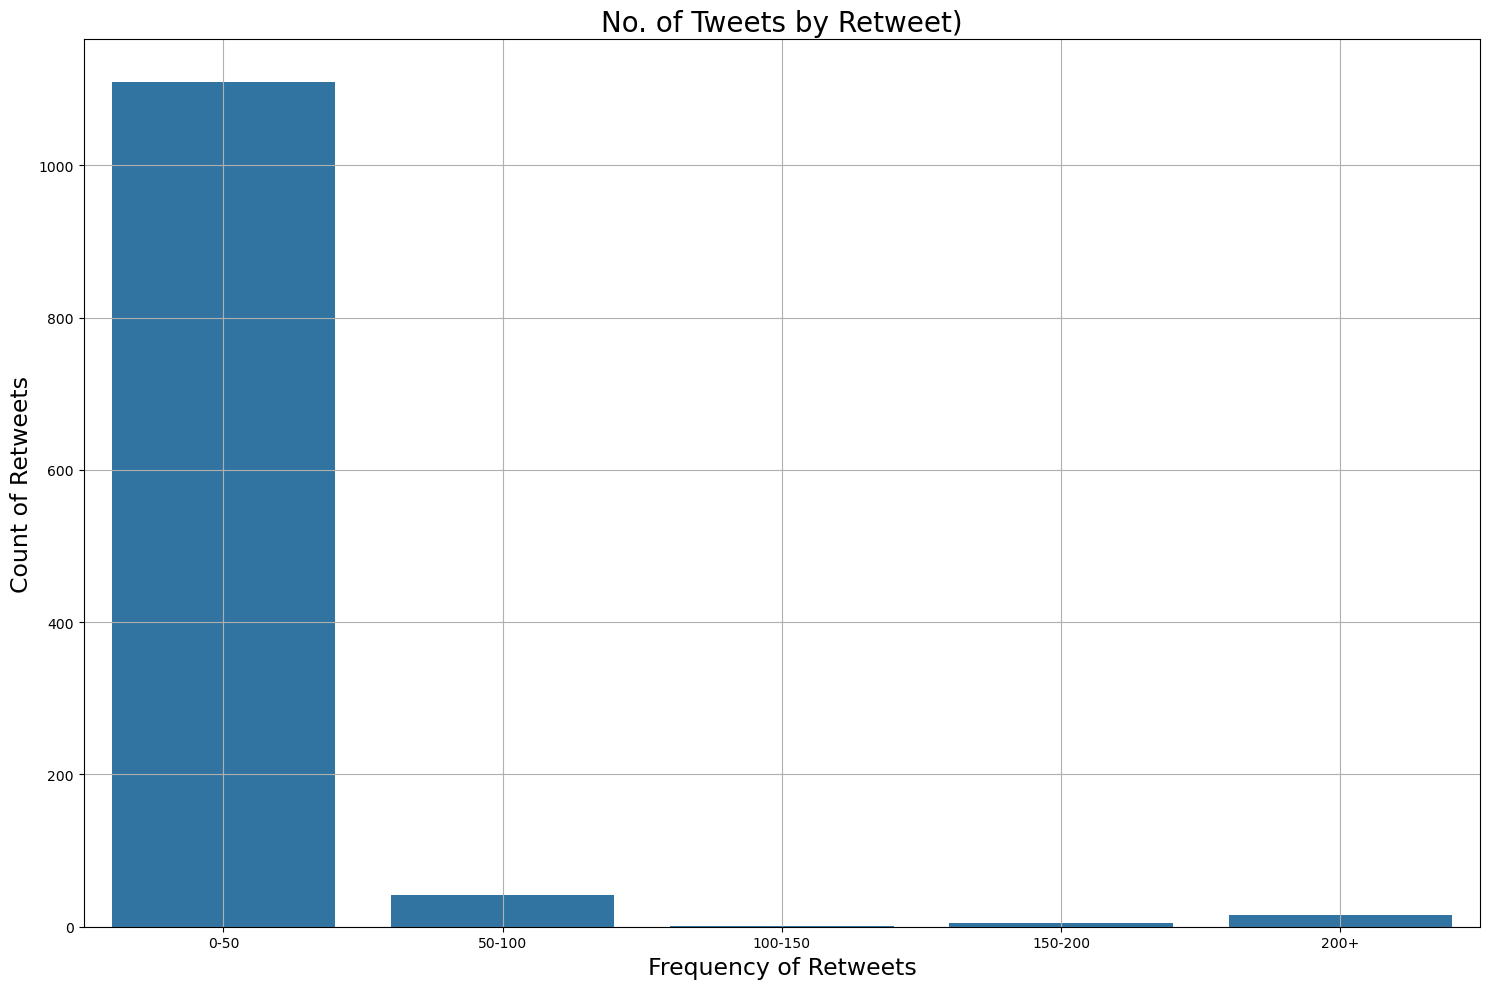

In [454]:
#I then plot this as a barplot. 
rt_bar = plt.figure(figsize=(15, 10))
rt_bar = sns.barplot(x='Retweets', y='No. of Tweets', data=grouped_rt_count)
rt_bar.set_title('No. of Tweets by Retweet)', fontdict={'size': 20})
rt_bar.set_xlabel('Frequency of Retweets', fontdict={'size': 17})
rt_bar.set_ylabel('Count of Retweets', fontdict={'size': 17})
plt.grid(True)

plt.tight_layout()
plt.show()

Let's see this data without tweets that weren't retweeted, as well as outliers. Let's visualise the data as a scatter plot. I only want to see granular data concerning tweets with up to 20 retweets.

In [457]:
filtered_rt_count = rt_count.drop(index=0)
filtered_rt_count = filtered_rt_count.sort_values(by='Retweets').reset_index(drop=True)
filtered_rt_count = filtered_rt_count.drop(filtered_rt_count.index[18:])
filtered_rt_count = filtered_rt_count.drop('bins', axis=1)
filtered_rt_count

Retweets  Count
0          1    215
1          2    114
2          3     70
3          4     27
4          5     35
5          6     12
6          7     18
7          8     15
8          9     13
9         10      5
10        11      6
11        12     16
12        13      1
13        14      1
14        15      1
15        16      2
16        19      1
17        20      1

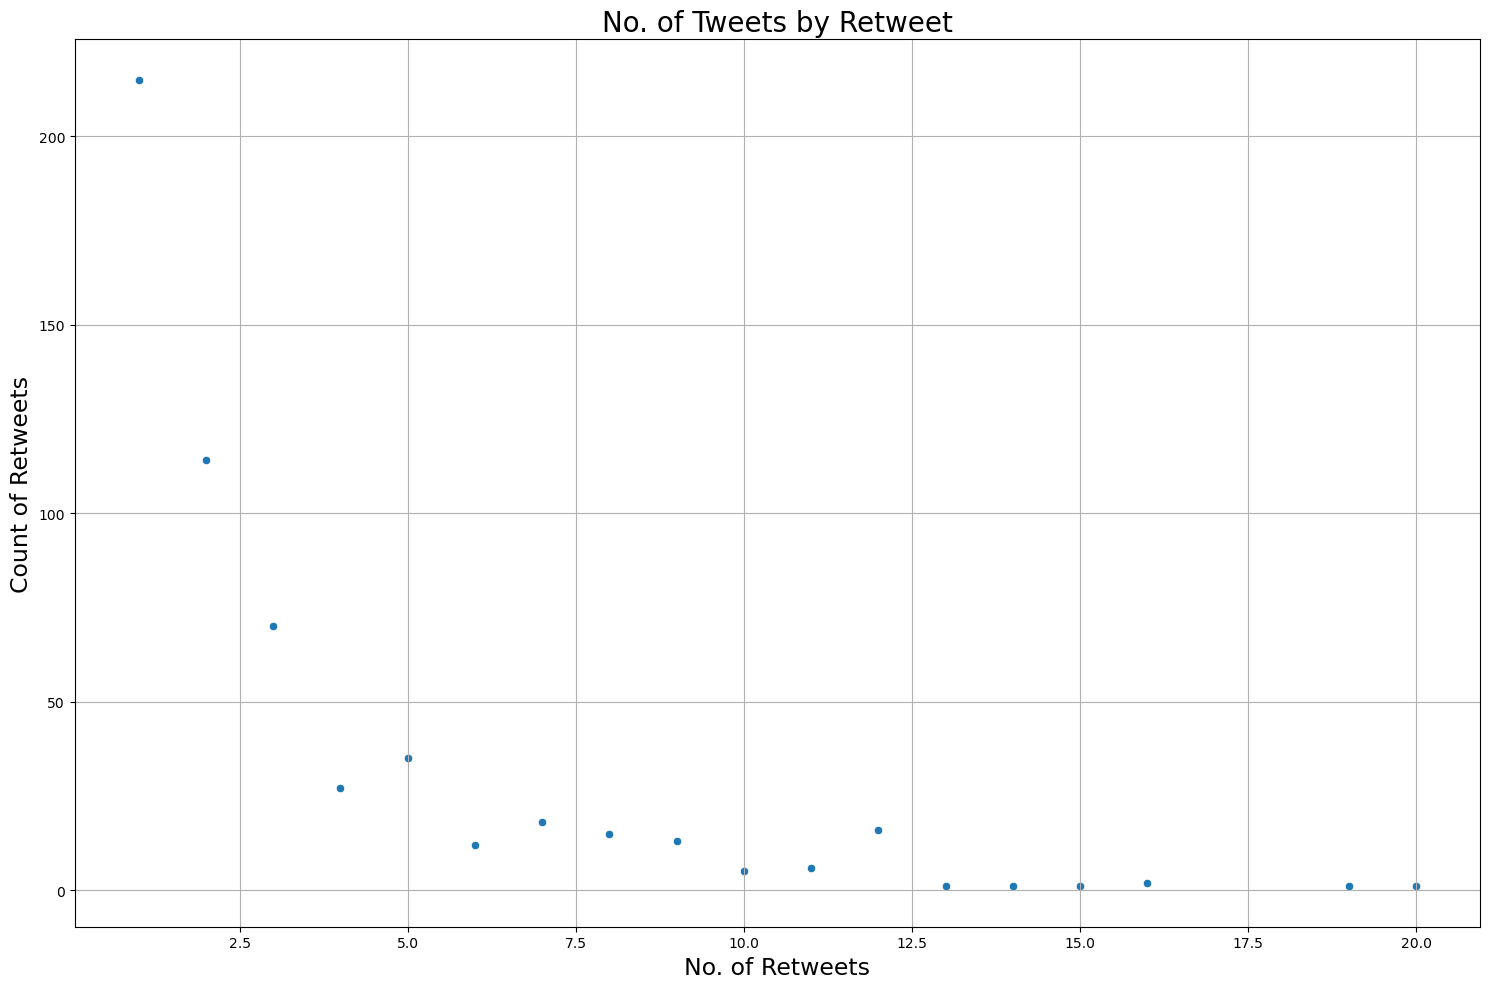

In [412]:
scatter_rt = plt.figure(figsize=(15, 10))
scatter_rt = sns.scatterplot(x='Retweets', y='Count', data=filtered_rt_count)
plt.title('No. of Tweets by Retweet', fontdict={'size': 20})
plt.xlabel('No. of Retweets', fontdict={'size': 17})
plt.ylabel('Count of Retweets', fontdict={'size': 17})
plt.grid(True)

plt.tight_layout()
plt.show()

Let's add a line of best fit. 

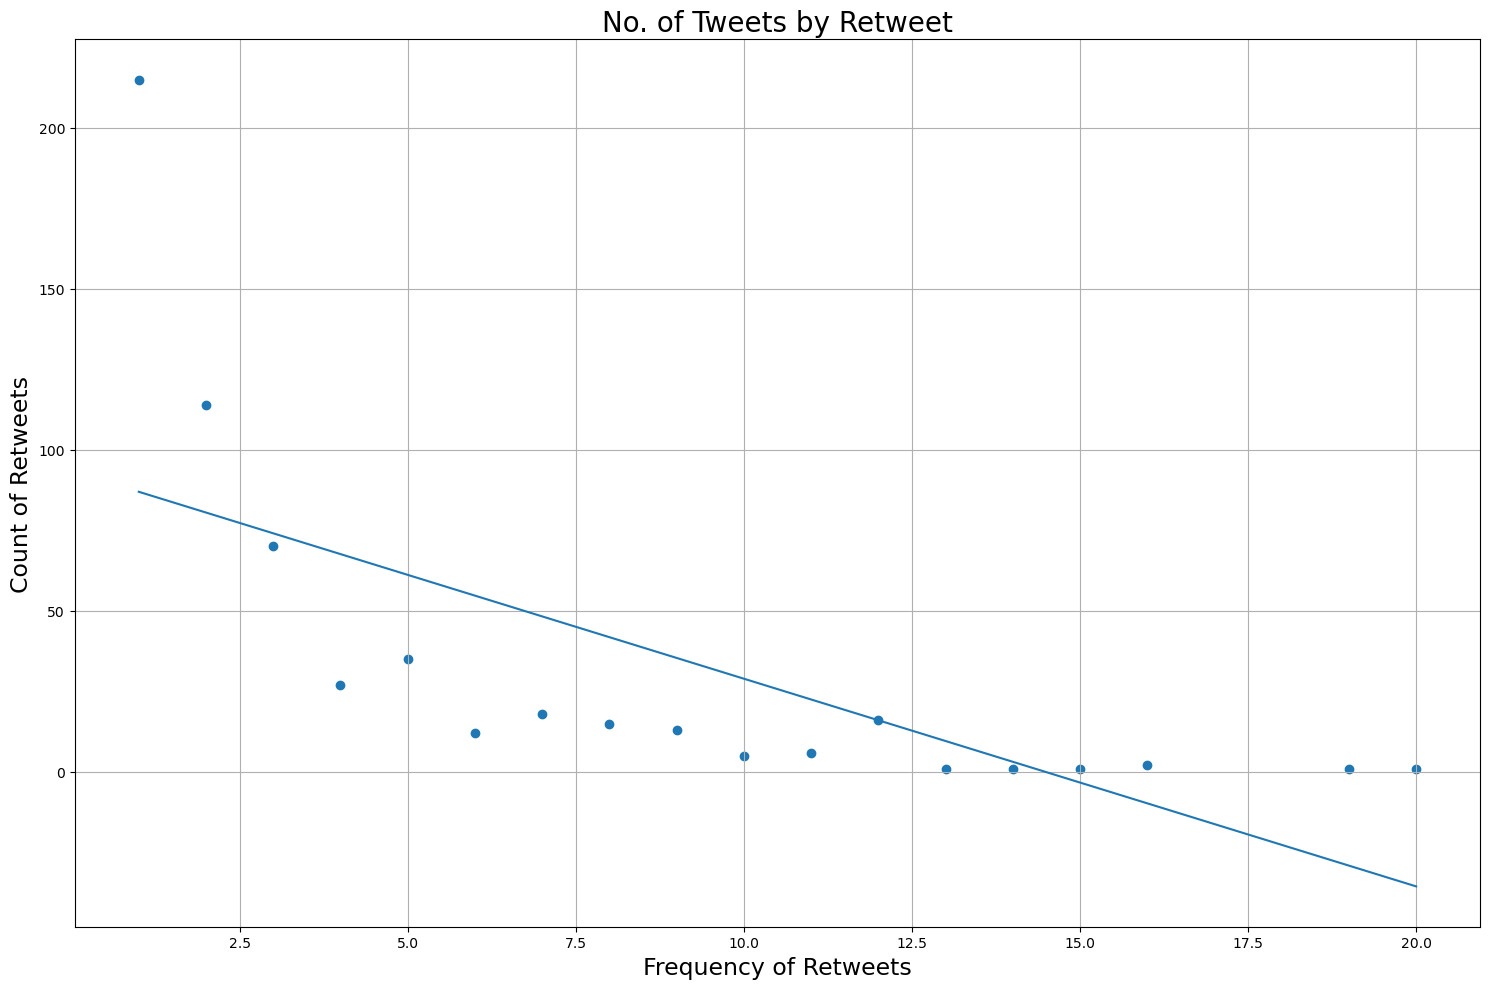

In [459]:
#I first define the x and y variables.
#The '.polyfit()' function calculates a line of best fit to x and y.
#'x, a*x+b' is used to define the line of best fit. 
x = filtered_rt_count['Retweets']
y = filtered_rt_count['Count']

scatter_rt = plt.figure(figsize=(15, 10))
scatter_rt = plt.scatter(x, y)
plt.title('No. of Tweets by Retweet', fontdict={'size': 20})
plt.xlabel('Frequency of Retweets', fontdict={'size': 17})
plt.ylabel('Count of Retweets', fontdict={'size': 17})
plt.grid(True)

a, b = np.polyfit(x, y, 1)
plt.plot(x, a*x+b)

plt.tight_layout()
plt.show()

I want to explore data about tweet favourite counts.

In [462]:
tf_count = tweets['tweet_favorite_count'].value_counts().reset_index()
tf_count.columns = ['Tweet Favorite Count', 'Count']
tf_count.head()

Tweet Favorite Count  Count
0                     0   1027
1                     1     91
2                     2     16
3                     3     13
4                     4      7

In [466]:
filtered_tf_count = tf_count.drop(index=0)
filtered_tf_count = filtered_tf_count.drop(filtered_tf_count.index[6:])
filtered_tf_count

Tweet Favorite Count  Count
1                     1     91
2                     2     16
3                     3     13
4                     4      7
5                     5      5
6                     6      2

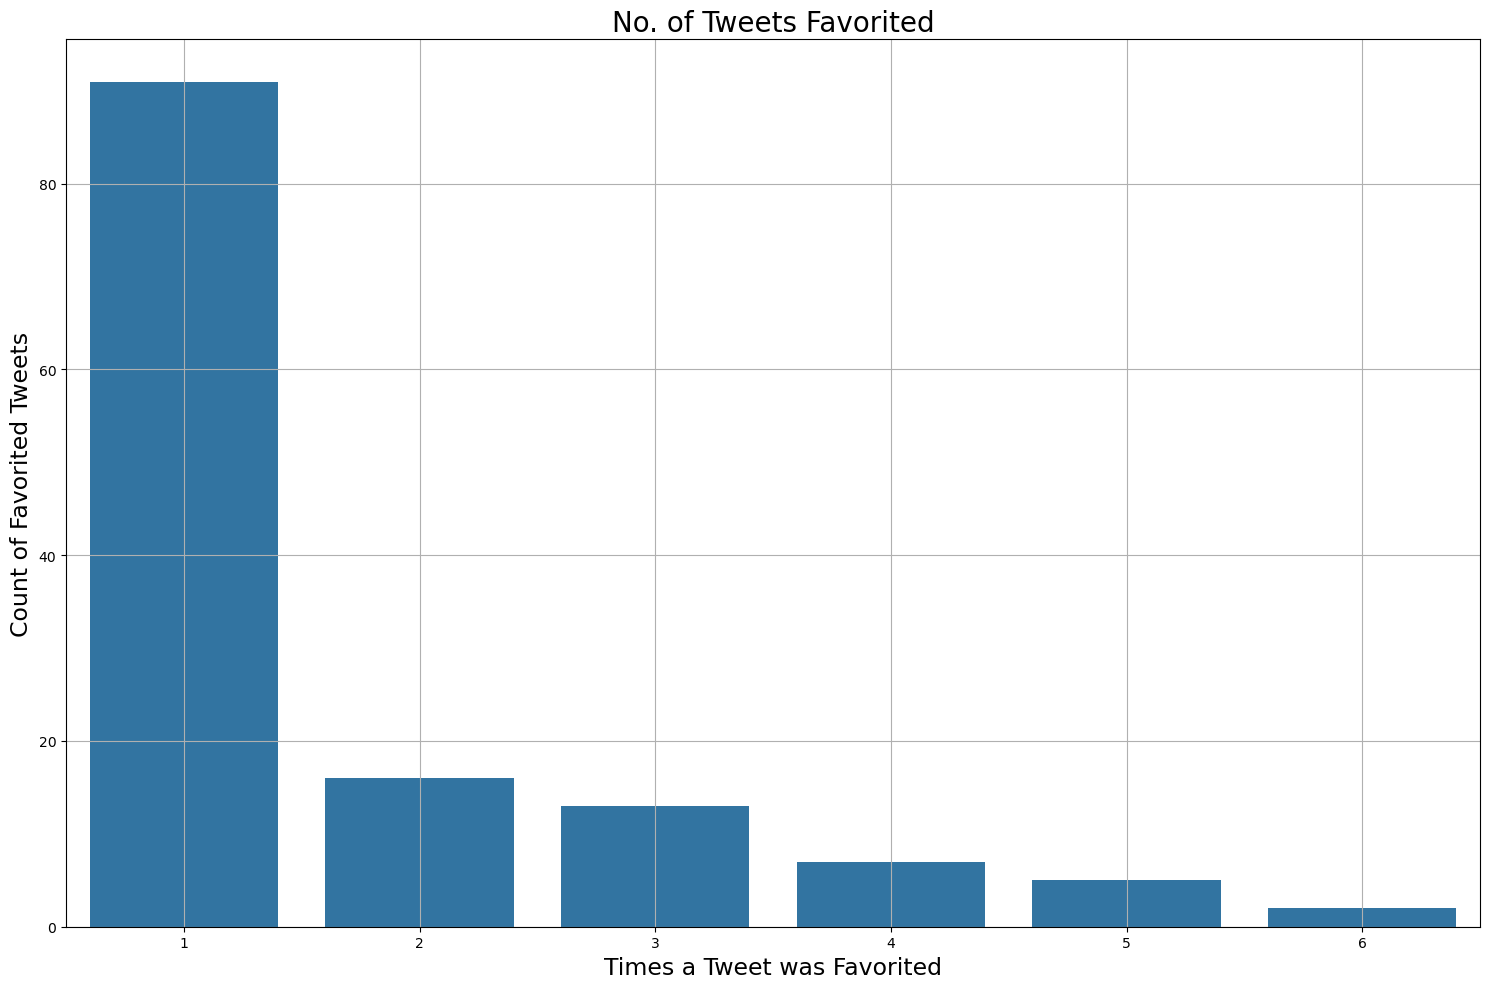

In [471]:
tf_bar = plt.figure(figsize=(15, 10))
tf_bar = sns.barplot(x='Tweet Favorite Count', y='Count', data=filtered_tf_count)
tf_bar.set_title('No. of Tweets Favorited', fontdict={'size': 20})
tf_bar.set_xlabel('Times a Tweet was Favorited', fontdict={'size': 17})
tf_bar.set_ylabel('Count of Favorited Tweets', fontdict={'size': 17})
plt.grid(True)

plt.tight_layout()
plt.show()

**Explore the frequency of different hashtags.**

In [473]:
#I create a new DataFrame, 'tweets_text'.
tweets_text = tweets[['tweet_entities_hashtags']]
tweets_text

tweet_entities_hashtags
0                                           #Healthcare
1                               #PremiseHealth, #hiring
2                                           #Healthcare
3                                                  #NEW
4     #blogs, #digitaltransformation, #cybersecurity...
...                                                 ...
1169  #Innovation, #precisionFabrication, #Microfluidic
1170                               #SKPoli, #healthcare
1171                        #webinar, #ESG, #healthcare
1172  #bpt, #physiotherapy, #HealthyNation, #healthc...
1173  #MediQuestStaffing, #Hospital, #shift, #Newpor...

[1174 rows x 1 columns]

In [475]:
#I create an empty list called 'tags'. 
tags = []

In [477]:
#I apply this 'for' loop.
for y in [x.split(' ') for x in tweets_text['tweet_entities_hashtags'].values]:
    for z in y:
        if '#' in z:
            tags.append(z.lower())

AttributeError: 'float' object has no attribute 'split'

This error is occurring because some of the values in the 'tweet_text' DataFrame are NaN and not string. We must therefore convert them to string.

In [480]:
tweets_text["tweet_entities_hashtags"] = tweets_text["tweet_entities_hashtags"].values.astype(str)

In [482]:
for y in [x.split(' ') for x in tweets_text['tweet_entities_hashtags'].values]:
    for z in y:
        if '#' in z:
            tags.append(z.lower())

In [484]:
tags

['#healthcare',
 '#premisehealth,',
 '#hiring',
 '#healthcare',
 '#new',
 '#blogs,',
 '#digitaltransformation,',
 '#cybersecurity,',
 '#accounting,',
 '#finance,',
 '#healthcare',
 '#firstcoastcna,',
 '#cnaexam,',
 '#cnaexampreparation,',
 '#jacksonville,',
 '#cnatraining,',
 '#nurse,',
 '#nursing,',
 '#nurselife,',
 '#nursepractitioner,',
 '#nurseproblems,',
 '#nursingschool,',
 '#healthcare',
 '#new,',
 '#disparities,',
 '#healthcare,',
 '#alert,',
 '#insurance,',
 '#data',
 '#healthcare',
 '#healthcare',
 '#healthcare',
 '#healthcare,',
 '#hcldr',
 '#premisehealth,',
 '#hiring',
 '#premisehealth,',
 '#hiring,',
 '#healthcare,',
 '#qualitypatientcare,',
 '#jobs,',
 '#job',
 '#ascp2022,',
 '#ascp100',
 '#healthcare',
 '#healthsecretary,',
 '#healthcare',
 '#ai,',
 '#sdoh,',
 '#healthcare',
 '#tropicana,',
 '#real,',
 '#juice,',
 '#healthcare,',
 '#watch,',
 '#worms,',
 '#fruits,',
 '#healthtips,',
 '#tips',
 '#healthcare,',
 '#thewoodlands',
 '#healthcare',
 '#chicago,',
 '#healthcare

In [486]:
#I convert the 'tags' list into a DataFrame ('dftags').
dftags = pd.DataFrame(tags, columns=['hashtags'])
dftags

hashtags
0             #healthcare
1         #premisehealth,
2                 #hiring
3             #healthcare
4                    #new
...                   ...
4238  #mediqueststaffing,
4239           #hospital,
4240              #shift,
4241       #newportbeach,
4242                 #job

[4243 rows x 1 columns]

In [488]:
#I then find the top 30 tags.
top_30 = dftags['hashtags'].value_counts().head(30).reset_index()
top_30

hashtags  count
0                   #healthcare,    474
1                    #healthcare    370
2                       #health,     78
3                     #medicine,     40
4                           #ai,     40
5                          #job,     28
6                      #medical,     27
7                    #marketing,     25
8                     #strategy,     25
9      #competitiveintelligence,     24
10                  #medtwitter,     24
11                       #meded,     23
12               #digitalhealth,     22
13                      #pharma,     20
14              #pharmaceutical,     20
15              #tipsfornewdocs,     20
16                     #biotech,     19
17                  #healthtech,     18
18                     #vaccine,     18
19                       #covid,     17
20                  #technology,     16
21             #womeninmedicine,     16
22                  #telehealth,     16
23                 #coronavirus,     16
24                    #medicare,     15
25                      #hiring,     15
26        #competitivemarketing,     15
27  #doctorofveterinarymedicine,     14
28             #machinelearning,     13
29                #telemedicine,     13

This is the right method, but we need to remove commas from the 'tags' list.

In [493]:
#I use the '.replace()' function to do this.
tags = [s.replace(',', '') for s in tags]
tags

['#healthcare',
 '#premisehealth',
 '#hiring',
 '#healthcare',
 '#new',
 '#blogs',
 '#digitaltransformation',
 '#cybersecurity',
 '#accounting',
 '#finance',
 '#healthcare',
 '#firstcoastcna',
 '#cnaexam',
 '#cnaexampreparation',
 '#jacksonville',
 '#cnatraining',
 '#nurse',
 '#nursing',
 '#nurselife',
 '#nursepractitioner',
 '#nurseproblems',
 '#nursingschool',
 '#healthcare',
 '#new',
 '#disparities',
 '#healthcare',
 '#alert',
 '#insurance',
 '#data',
 '#healthcare',
 '#healthcare',
 '#healthcare',
 '#healthcare',
 '#hcldr',
 '#premisehealth',
 '#hiring',
 '#premisehealth',
 '#hiring',
 '#healthcare',
 '#qualitypatientcare',
 '#jobs',
 '#job',
 '#ascp2022',
 '#ascp100',
 '#healthcare',
 '#healthsecretary',
 '#healthcare',
 '#ai',
 '#sdoh',
 '#healthcare',
 '#tropicana',
 '#real',
 '#juice',
 '#healthcare',
 '#watch',
 '#worms',
 '#fruits',
 '#healthtips',
 '#tips',
 '#healthcare',
 '#thewoodlands',
 '#healthcare',
 '#chicago',
 '#healthcare',
 '#telehealth',
 '#healthcare',
 '#virtu

In [495]:
dftags = pd.DataFrame(tags, columns=['hashtags'])
dftags

hashtags
0            #healthcare
1         #premisehealth
2                #hiring
3            #healthcare
4                   #new
...                  ...
4238  #mediqueststaffing
4239           #hospital
4240              #shift
4241       #newportbeach
4242                #job

[4243 rows x 1 columns]

In [497]:
top_30 = dftags['hashtags'].value_counts().head(30).reset_index()
top_30

hashtags  count
0                #healthcare    844
1                    #health     86
2                        #ai     47
3                  #medicine     42
4                       #job     38
5                   #medical     35
6             #digitalhealth     31
7                  #strategy     31
8            #pharmaceutical     28
9                #medtwitter     27
10  #competitiveintelligence     25
11                   #pharma     25
12                  #biotech     25
13                #marketing     25
14                    #meded     24
15               #telehealth     22
16                    #covid     21
17                   #hiring     21
18           #tipsfornewdocs     21
19               #healthtech     18
20          #machinelearning     18
21               #technology     18
22                  #vaccine     18
23                 #medicare     17
24                     #news     17
25          #womeninmedicine     16
26     #competitivemarketing     16
27              #coronavirus     16
28                  #covid19     15
29                 #wellness     15

So, we have the top 30 hashtags out of the 'tweets' dataset, accounting for capitalisation and commas.

I plot this data as a barplot.

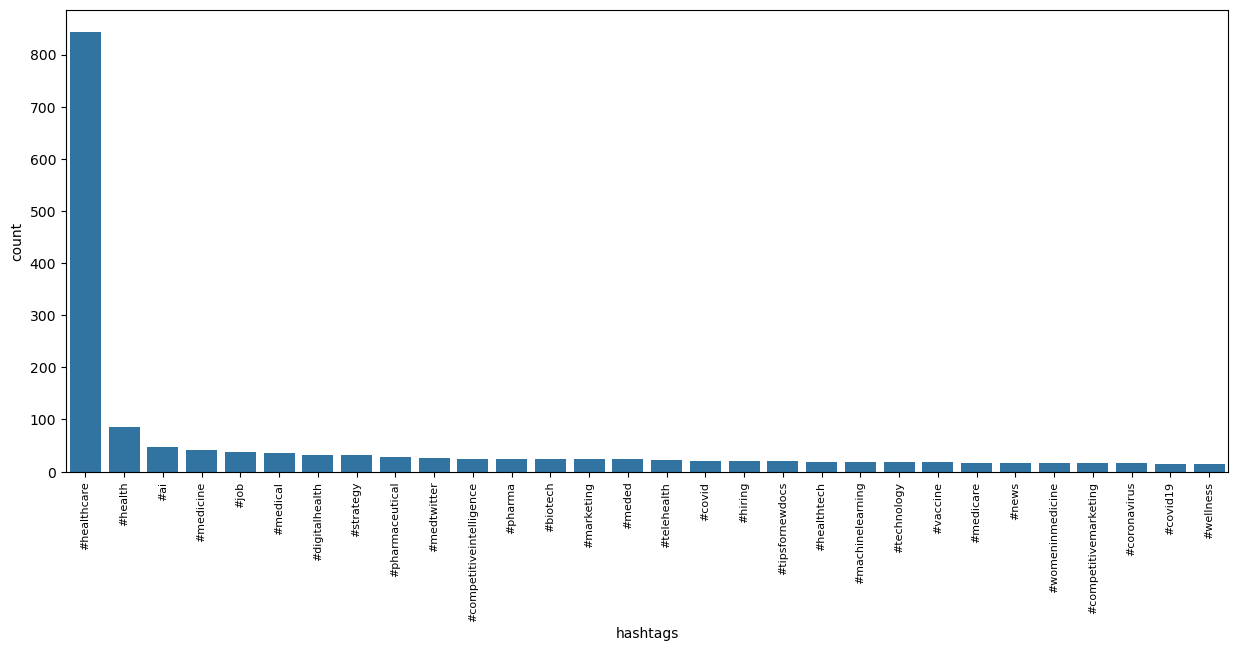

In [501]:
plt.figure(figsize=(15, 6))
sns.barplot(x='hashtags', y='count', data=top_30)
plt.xticks(rotation=90)
plt.xticks(fontsize=8)
plt.show()

This is good, but let's see if we can group similar hashtags together, and remove hashtags with a count below 10.

In [505]:
#First, I create a DataFrame, 'top_tags'.
top_tags = dftags['hashtags'].value_counts().reset_index()
top_tags

hashtags  count
0      #healthcare    844
1          #health     86
2              #ai     47
3        #medicine     42
4             #job     38
...            ...    ...
1492         #nola      1
1493    #louisiana      1
1494  #flexibility      1
1495   #treatments      1
1496        #csjmu      1

[1497 rows x 2 columns]

In [507]:
#I remove hashtags with a count of below 10.
top_tags = top_tags[top_tags['count'] >= 10].reset_index(drop=True)
top_tags

hashtags  count
0                #healthcare    844
1                    #health     86
2                        #ai     47
3                  #medicine     42
4                       #job     38
..                       ...    ...
57                 #hospital     10
58             #saskatchewan     10
59                    #html5     10
60                   #rstats     10
61  #healthcareprofessionals     10

[62 rows x 2 columns]

In [509]:
#I group together all hashtags containing the sub-string 'health'.
top_tags['hashtags'] = top_tags['hashtags'].apply(lambda x: 'hashtags containing "health" ' 
                                                  if 'health' in x.lower() else x)

In [519]:
#Then I just sum the value counts. 
top_tags = top_tags.groupby('hashtags')['count'].sum().reset_index()
top_tags

hashtags  count
0                #100daysofmlcode     10
1                             #ai     47
2                        #biotech     25
3                        #cdnpoli     10
4                        #chicago     10
5        #competitiveintelligence     25
6           #competitivemarketing     16
7                    #coronavirus     16
8                          #covid     21
9                        #covid19     15
10                          #data     12
11         #digitaltransformation     11
12                        #doctor     12
13    #doctorofveterinarymedicine     14
14                     #education     14
15                        #foamed     13
16                        #hiring     21
17                      #hospital     10
18                     #hospitals     12
19                         #html5     10
20                    #innovation     11
21                     #insurance     10
22                           #job     38
23               #machinelearning     18
24                     #marketing     25
25                         #meded     24
26                       #medical     35
27                      #medicare     17
28                      #medicine     42
29                       #medtech     11
30                    #medtwitter     27
31                           #new     13
32                          #news     17
33                        #nodejs     10
34                        #nurses     12
35                       #nursing     14
36                      #pandemic     10
37                   #patientcare     13
38                        #pharma     25
39                #pharmaceutical     28
40                        #python     11
41                        #rstats     10
42                  #saskatchewan     10
43                       #science     14
44                      #strategy     31
45                          #tech     14
46                    #technology     18
47                  #telemedicine     14
48                #tipsfornewdocs     21
49                           #usa     11
50                       #vaccine     18
51                      #vaccines     10
52                      #wellness     15
53               #womeninmedicine     16
54  hashtags containing "health"    1035

In [523]:
#I sort values by count and drop the previous 'index' column.
#I save this new DataFrame ('top_tags_clean').
top_tags_clean = top_tags.sort_values(by='count', ascending=False).reset_index()
top_tags_clean = top_tags_clean.drop(columns=['index'])
top_tags_clean

hashtags  count
0   hashtags containing "health"    1035
1                             #ai     47
2                       #medicine     42
3                            #job     38
4                        #medical     35
5                       #strategy     31
6                 #pharmaceutical     28
7                     #medtwitter     27
8                      #marketing     25
9                         #pharma     25
10       #competitiveintelligence     25
11                       #biotech     25
12                         #meded     24
13                         #covid     21
14                #tipsfornewdocs     21
15                        #hiring     21
16                    #technology     18
17                       #vaccine     18
18               #machinelearning     18
19                          #news     17
20                      #medicare     17
21          #competitivemarketing     16
22               #womeninmedicine     16
23                   #coronavirus     16
24                      #wellness     15
25                       #covid19     15
26                       #nursing     14
27                          #tech     14
28                     #education     14
29    #doctorofveterinarymedicine     14
30                       #science     14
31                  #telemedicine     14
32                        #foamed     13
33                           #new     13
34                   #patientcare     13
35                          #data     12
36                        #doctor     12
37                     #hospitals     12
38                        #nurses     12
39                    #innovation     11
40         #digitaltransformation     11
41                        #python     11
42                           #usa     11
43                       #medtech     11
44                       #cdnpoli     10
45                      #vaccines     10
46                       #chicago     10
47                     #insurance     10
48                  #saskatchewan     10
49                        #rstats     10
50                      #pandemic     10
51                        #nodejs     10
52                      #hospital     10
53                         #html5     10
54               #100daysofmlcode     10

In [525]:
#I group all hashtags containing the sub-string 'med'.
top_tags['hashtags'] = top_tags['hashtags'].apply(lambda x: 'hashtags containing "health" ' if 'health' in x.lower()
                                                  else 'hashtags containing "med-" ' if 'med' in x.lower()
                                                  else x)
top_tags = top_tags.groupby('hashtags')['count'].sum().reset_index()
top_tags_clean = top_tags.sort_values(by='count', ascending=False).reset_index()
top_tags_clean = top_tags_clean.drop(columns=['index'])
top_tags_clean

hashtags  count
0   hashtags containing "health"    1035
1     hashtags containing "med-"     213
2                             #ai     47
3                            #job     38
4                       #strategy     31
5                 #pharmaceutical     28
6                         #pharma     25
7                      #marketing     25
8        #competitiveintelligence     25
9                        #biotech     25
10                        #hiring     21
11                         #covid     21
12                #tipsfornewdocs     21
13                    #technology     18
14                       #vaccine     18
15               #machinelearning     18
16                          #news     17
17                   #coronavirus     16
18          #competitivemarketing     16
19                       #covid19     15
20                      #wellness     15
21                     #education     14
22                       #science     14
23                          #tech     14
24                       #nursing     14
25                   #patientcare     13
26                           #new     13
27                        #nurses     12
28                        #doctor     12
29                          #data     12
30                     #hospitals     12
31                    #innovation     11
32                        #python     11
33         #digitaltransformation     11
34                           #usa     11
35                        #rstats     10
36                  #saskatchewan     10
37                         #html5     10
38                      #pandemic     10
39                      #hospital     10
40                     #insurance     10
41                        #nodejs     10
42                      #vaccines     10
43                       #chicago     10
44                       #cdnpoli     10
45               #100daysofmlcode     10

I plot this data as a barplot. I annotate the hashtag with the top value with the value count inside a circle.

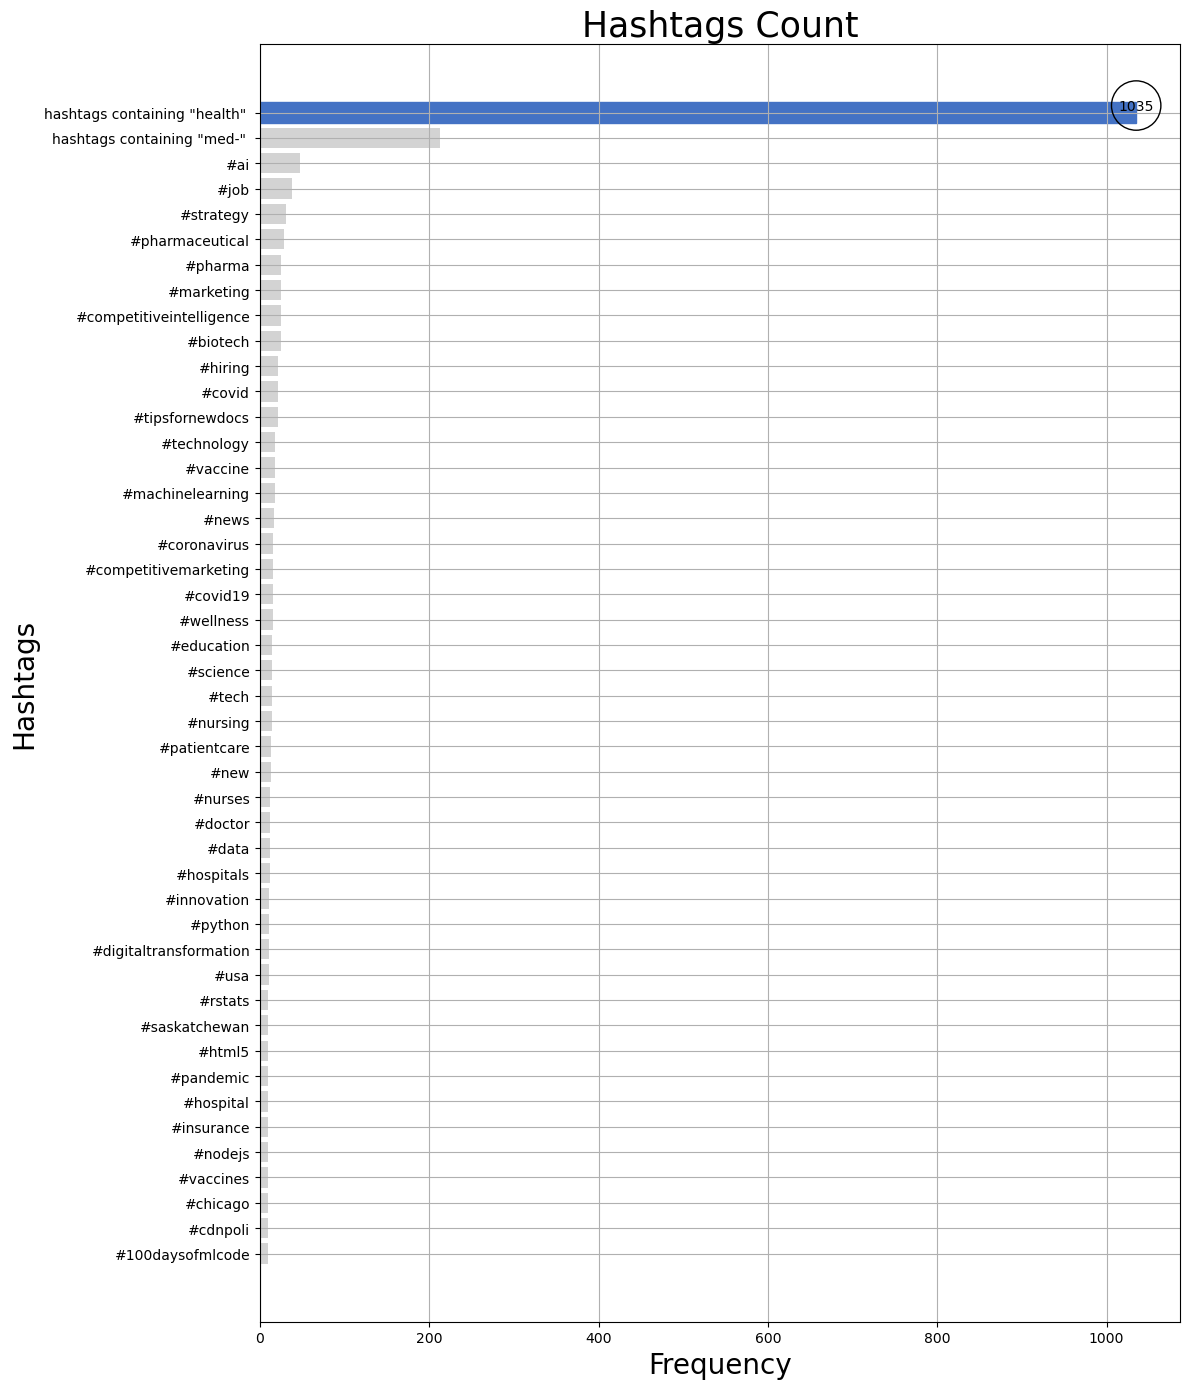

In [534]:
#'plt.barh()' plots the data horizontally for ease of visualisation.
tags_bar = plt.figure(figsize=(12, 14))
tags_bar = plt.barh(top_tags_clean['hashtags'], top_tags_clean['count'], color='lightgrey')
plt.gca().invert_yaxis()  #This inverts the axis.
plt.xlabel('Frequency', fontdict={'size': 20}) 
plt.ylabel('Hashtags', fontdict={'size': 20})
plt.title('Hashtags Count', fontdict={'size': 25})
plt.grid(True)

for bar_index in [0]:   #This loop affects only one bar. 
    tags_bar[bar_index].set_color('#4472C4')   #This sets the colour of the bar. 
    row = top_tags_clean.iloc[bar_index]   #'row' extracts the data from the DataFrame, at bar_index 0.
    count_value = row['count']   #'count_value' extracts the value from the row's 'count' column.
    hashtag = row['hashtags']   #'hashtag' extracts the value from the 'hashtags' column of the row.
    xy = (count_value, bar_index)   #'xy' is a tuple used to plot the coordinates for the annotated bar.
    
    if bar_index == 0:   #This creates a circle around the annotation. 
        bbox = {'boxstyle': 'circle, pad=0.5', 'fill': False}
    else:
        bbox = None
        
plt.annotate("{}".format(count_value),
             xy=xy,
             verticalalignment='bottom',
             horizontalalignment='center',
             bbox=bbox)

plt.tight_layout()
plt.show()

I make another version of this bar plot but label all bars with their value counts.

## tags_bar = plt.figure(figsize=(12, 14))
tags_bar = plt.barh(top_tags_clean['hashtags'], top_tags_clean['count'], color='lightblue')
plt.gca().invert_yaxis()  # This inverts the axis.
plt.xlabel('Frequency', fontdict={'size': 20}) 
plt.ylabel('Hashtags', fontdict={'size': 20})
plt.title('Hashtags Count', fontdict={'size': 25})
plt.grid(True)

#This loop applies to each bar in 'tags_bar'.
for bar in tags_bar:  
    count_value = bar.get_width()  #'.get_width()' extracts the width of a bar, which is its value.
    x = count_value + 12  #Sets the x coordinate of the annotated text. 
    y = bar.get_y() + bar.get_height() / 2  #Sets the y coordinate of the annotated text. 
    plt.text(x, y, f'{int(count_value)}', va='center', fontdict={'size': 10})  #'.text()' annotates each bar. The f-string converts the 'count_value' to string.

plt.tight_layout()
plt.show()

**Should the NHS start looking at increasing staff levels?**

In [210]:
#First, I create a new DataFrame, 'ar_agg'.
ar_agg = ar[['appointment_month', 'count_of_appointments', 'hcp_type', 'appointment_status', 'appointment_mode', 'time_between_book_and_appointment']]
ar_agg.head()

appointment_month  count_of_appointments hcp_type appointment_status  \
0           2020-01                   8107       GP           Attended   
1           2020-01                   6791       GP           Attended   
2           2020-01                  20686       GP           Attended   
3           2020-01                   4268       GP           Attended   
4           2020-01                  11971       GP           Attended   

  appointment_mode time_between_book_and_appointment  
0     Face-to-Face                             1 Day  
1     Face-to-Face                    15  to 21 Days  
2     Face-to-Face                       2 to 7 Days  
3     Face-to-Face                    22  to 28 Days  
4     Face-to-Face                     8  to 14 Days

In [212]:
#Let's see the total sum of the appointments.
ar_agg['count_of_appointments'].sum()

742804525

In [214]:
#Let's see the sum of appointments by appointment month. 
ar_agg_ap = ar_agg.groupby('appointment_month')['count_of_appointments'].sum().reset_index()
ar_agg_ap

appointment_month  count_of_appointments
0            2020-01               27199296
1            2020-02               24104621
2            2020-03               24053468
3            2020-04               16007881
4            2020-05               16417212
5            2020-06               20690805
6            2020-07               22491437
7            2020-08               20150520
8            2020-09               26714255
9            2020-10               28301932
10           2020-11               25061602
11           2020-12               23535936
12           2021-01               22492069
13           2021-02               22399569
14           2021-03               27225424
15           2021-04               23879932
16           2021-05               23508395
17           2021-06               26784182
18           2021-07               25739219
19           2021-08               23852171
20           2021-09               28522501
21           2021-10               30303834
22           2021-11               30405070
23           2021-12               25140776
24           2022-01               25635474
25           2022-02               25355260
26           2022-03               29595038
27           2022-04               23913060
28           2022-05               27495508
29           2022-06               25828078

Let's find the average utilisation of service by appointment month.

In [226]:
ar_agg_ap['utilisation'] = ar_agg_ap['count_of_appointments'] / 30
ar_agg_ap.head()

appointment_month  count_of_appointments    utilisation
0           2020-01               27199296  906643.200000
1           2020-02               24104621  803487.366667
2           2020-03               24053468  801782.266667
3           2020-04               16007881  533596.033333
4           2020-05               16417212  547240.400000

I convert the 'utilisation' to standard numeric format as it is in scientific notation.
I also change the new values to a single decimal place. 

In [228]:
#I use the 'lambda' function to convert utilisation values to one decimal place.
ar_agg_ap['utilisation'] = ar_agg_ap['utilisation'].apply(lambda x: '{:.1f}'.format(x))
ar_agg_ap.head()

appointment_month  count_of_appointments utilisation
0           2020-01               27199296    906643.2
1           2020-02               24104621    803487.4
2           2020-03               24053468    801782.3
3           2020-04               16007881    533596.0
4           2020-05               16417212    547240.4

Let's see the sum of appointments by HCP Type.

In [230]:
#I repeat the same process as I did previously.
ar_agg_hcp = ar_agg.groupby('hcp_type')['count_of_appointments'].sum().reset_index()
ar_agg_hcp['utilisation'] = ar_agg_hcp['count_of_appointments'] / 30
ar_agg_hcp['utilisation'] = ar_agg_hcp['utilisation'].apply(lambda x: '{:.1f}'.format(x))
ar_agg_hcp

hcp_type  count_of_appointments utilisation
0                    GP              379650140  12655004.7
1  Other Practice staff              339650535  11321684.5
2               Unknown               23503850    783461.7

Let's see the sum of appointments by appointment mode.

In [232]:
#I repeat the same process as I did previously.
ar_agg_am = ar_agg.groupby('appointment_mode')['count_of_appointments'].sum().reset_index()
ar_agg_am['utilisation'] = ar_agg_am['count_of_appointments'] / 30
ar_agg_am['utilisation'] = ar_agg_am['utilisation'].apply(lambda x: '{:.1f}'.format(x))
ar_agg_am

appointment_mode  count_of_appointments utilisation
0     Face-to-Face              439981729  14666057.6
1       Home Visit                4887876    162929.2
2        Telephone              267862657   8928755.2
3          Unknown               26451305    881710.2
4     Video/Online                3620958    120698.6

**Create a lineplot for total count of appointments, and average utilisation, per appointment month.** 

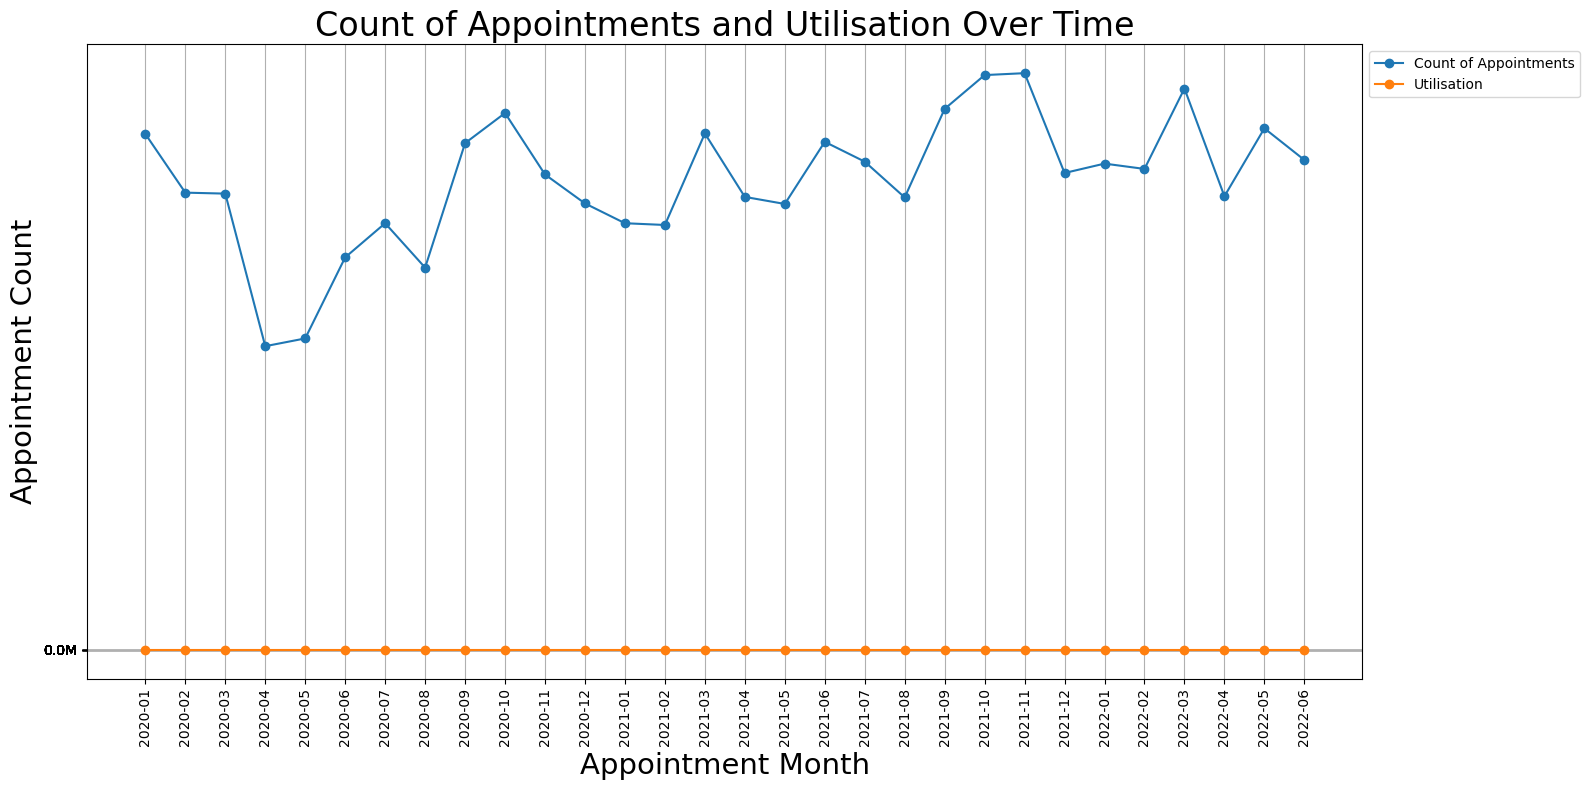

In [234]:
fig_am_ut = plt.figure(figsize=(16, 8))
fig_am_ut = plt.plot(ar_agg_ap['appointment_month'], ar_agg_ap['count_of_appointments'], label='Count of Appointments', marker='o')
fig_am_ut = plt.plot(ar_agg_ap['appointment_month'], ar_agg_ap['utilisation'], label='Utilisation', marker='o')
plt.title('Count of Appointments and Utilisation Over Time', fontdict={'size': 24})
plt.xlabel('Appointment Month', fontdict={'size': 21})
plt.ylabel('Appointment Count', fontdict={'size': 21})
plt.xticks(rotation=90)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

def mformat(y, pos):
    return f'{y/1000000:.1f}M'

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(mformat))

plt.tight_layout()
plt.show()

We get an unreadable y-axis because the 'utilisation' data is not saved as int64 datatype. 

In [236]:
ar_agg_ap['utilisation'] = ar_agg_ap['utilisation'].astype('float64')
ar_agg_ap['utilisation'] = ar_agg_ap['utilisation'].apply(lambda x: '{:.0f}'.format(round(x)))
ar_agg_ap['utilisation'] = ar_agg_ap['utilisation'].astype('int64')
ar_agg_ap

appointment_month  count_of_appointments  utilisation
0            2020-01               27199296       906643
1            2020-02               24104621       803487
2            2020-03               24053468       801782
3            2020-04               16007881       533596
4            2020-05               16417212       547240
5            2020-06               20690805       689694
6            2020-07               22491437       749715
7            2020-08               20150520       671684
8            2020-09               26714255       890475
9            2020-10               28301932       943398
10           2020-11               25061602       835387
11           2020-12               23535936       784531
12           2021-01               22492069       749736
13           2021-02               22399569       746652
14           2021-03               27225424       907514
15           2021-04               23879932       795998
16           2021-05               23508395       783613
17           2021-06               26784182       892806
18           2021-07               25739219       857974
19           2021-08               23852171       795072
20           2021-09               28522501       950750
21           2021-10               30303834      1010128
22           2021-11               30405070      1013502
23           2021-12               25140776       838026
24           2022-01               25635474       854516
25           2022-02               25355260       845175
26           2022-03               29595038       986501
27           2022-04               23913060       797102
28           2022-05               27495508       916517
29           2022-06               25828078       860936

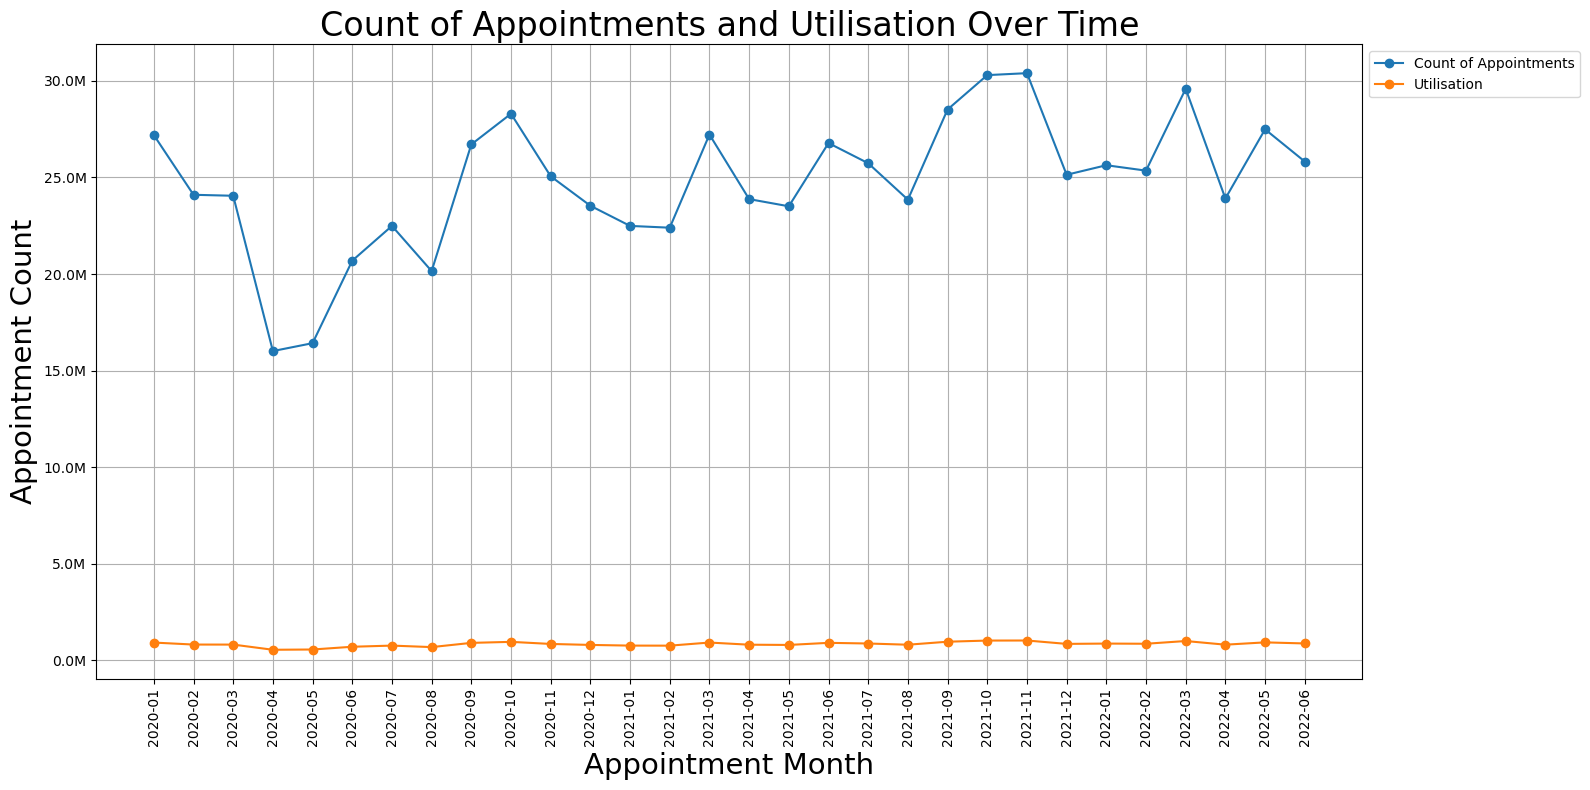

In [613]:
fig_am_ut = plt.figure(figsize=(16, 8))
fig_am_ut = plt.plot(ar_agg_ap['appointment_month'], ar_agg_ap['count_of_appointments'], label='Count of Appointments', marker='o')
fig_am_ut = plt.plot(ar_agg_ap['appointment_month'], ar_agg_ap['utilisation'], label='Utilisation', marker='o')
plt.title('Count of Appointments and Utilisation Over Time', fontdict={'size': 24})
plt.xlabel('Appointment Month', fontdict={'size': 21})
plt.ylabel('Appointment Count', fontdict={'size': 21})
plt.xticks(rotation=90)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

def mformat(y, pos):
    return f'{y/1000000:.1f}M'

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(mformat))

plt.tight_layout()
plt.show()

Let's just see how the 'utilisation' compares to the NHS average (1200000).

In [238]:
#First, I create a new DataFrame ('ar_agg_ut').
ar_agg_ut = ar_agg_ap[['utilisation', 'appointment_month']]
ar_agg_ut

utilisation appointment_month
0        906643           2020-01
1        803487           2020-02
2        801782           2020-03
3        533596           2020-04
4        547240           2020-05
5        689694           2020-06
6        749715           2020-07
7        671684           2020-08
8        890475           2020-09
9        943398           2020-10
10       835387           2020-11
11       784531           2020-12
12       749736           2021-01
13       746652           2021-02
14       907514           2021-03
15       795998           2021-04
16       783613           2021-05
17       892806           2021-06
18       857974           2021-07
19       795072           2021-08
20       950750           2021-09
21      1010128           2021-10
22      1013502           2021-11
23       838026           2021-12
24       854516           2022-01
25       845175           2022-02
26       986501           2022-03
27       797102           2022-04
28       916517           2022-05
29       860936           2022-06

I plot this as a seaborn lineplot. 

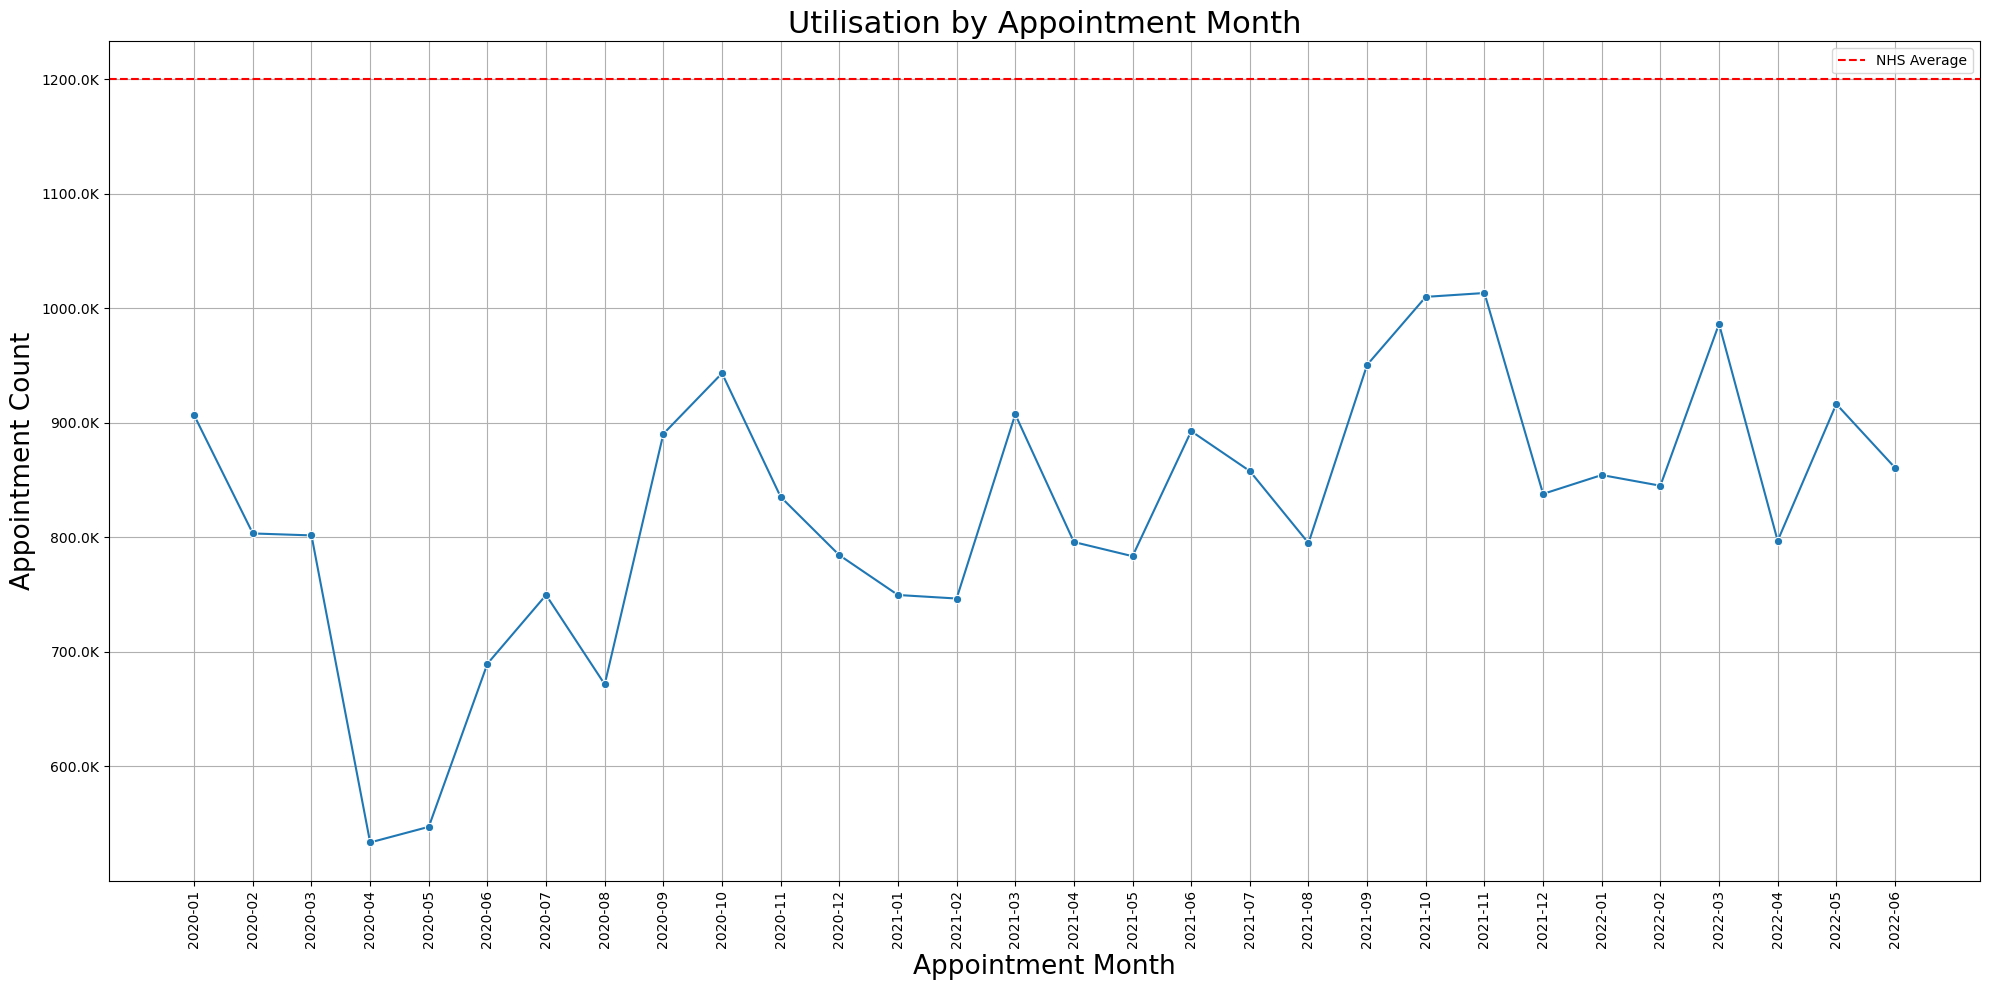

In [240]:
fig_ut = plt.figure(figsize=(20, 10))
fig_ut = sns.lineplot(x='appointment_month', y='utilisation', marker='o', errorbar=None, data=ar_agg_ut)
fig_ut.set_title('Utilisation by Appointment Month', fontdict={'size': 22})
fig_ut.set_xlabel('Appointment Month', fontdict={'size': 19})
fig_ut.set_ylabel('Appointment Count', fontdict={'size': 19})
plt.xticks(rotation=90)
plt.grid(True)

def kformat(y, pos):
    return f'{y/1000:.1f}K'

fig_ut.yaxis.set_major_formatter(ticker.FuncFormatter(kformat))

#'.axhline()' adds dashed horizontal line indicating NHS average.
plt.axhline(y=1200000, color='r', linestyle='--', label='NHS Average')
plt.legend()

plt.tight_layout()
plt.show()

In [757]:
hcp_test = ar_agg.groupby(['appointment_month', 'hcp_type'], as_index=False)['count_of_appointments'].sum()
hcp_test

appointment_month              hcp_type  count_of_appointments
0            2020-01                    GP               14168932
1            2020-01  Other Practice staff               12326031
2            2020-01               Unknown                 704333
3            2020-02                    GP               12467976
4            2020-02  Other Practice staff               11002550
..               ...                   ...                    ...
85           2022-05  Other Practice staff               12823200
86           2022-05               Unknown                 878374
87           2022-06                    GP               12893983
88           2022-06  Other Practice staff               12105677
89           2022-06               Unknown                 828418

[90 rows x 3 columns]

In [759]:
hcp_test.rename(columns={'count_of_appointments': 'utilisation'}, inplace=True)
hcp_test

appointment_month              hcp_type  utilisation
0            2020-01                    GP     14168932
1            2020-01  Other Practice staff     12326031
2            2020-01               Unknown       704333
3            2020-02                    GP     12467976
4            2020-02  Other Practice staff     11002550
..               ...                   ...          ...
85           2022-05  Other Practice staff     12823200
86           2022-05               Unknown       878374
87           2022-06                    GP     12893983
88           2022-06  Other Practice staff     12105677
89           2022-06               Unknown       828418

[90 rows x 3 columns]

In [761]:
hcp_test['utilisation'] = hcp_test['utilisation'] / 30

In [763]:
hcp_test

appointment_month              hcp_type    utilisation
0            2020-01                    GP  472297.733333
1            2020-01  Other Practice staff  410867.700000
2            2020-01               Unknown   23477.766667
3            2020-02                    GP  415599.200000
4            2020-02  Other Practice staff  366751.666667
..               ...                   ...            ...
85           2022-05  Other Practice staff  427440.000000
86           2022-05               Unknown   29279.133333
87           2022-06                    GP  429799.433333
88           2022-06  Other Practice staff  403522.566667
89           2022-06               Unknown   27613.933333

[90 rows x 3 columns]

In [769]:
hcp_test_clean = hcp_test[hcp_test["hcp_type"].str.contains("Unknown") == False]
hcp_test_clean.head()

appointment_month              hcp_type    utilisation
0           2020-01                    GP  472297.733333
1           2020-01  Other Practice staff  410867.700000
3           2020-02                    GP  415599.200000
4           2020-02  Other Practice staff  366751.666667
6           2020-03                    GP  427999.766667

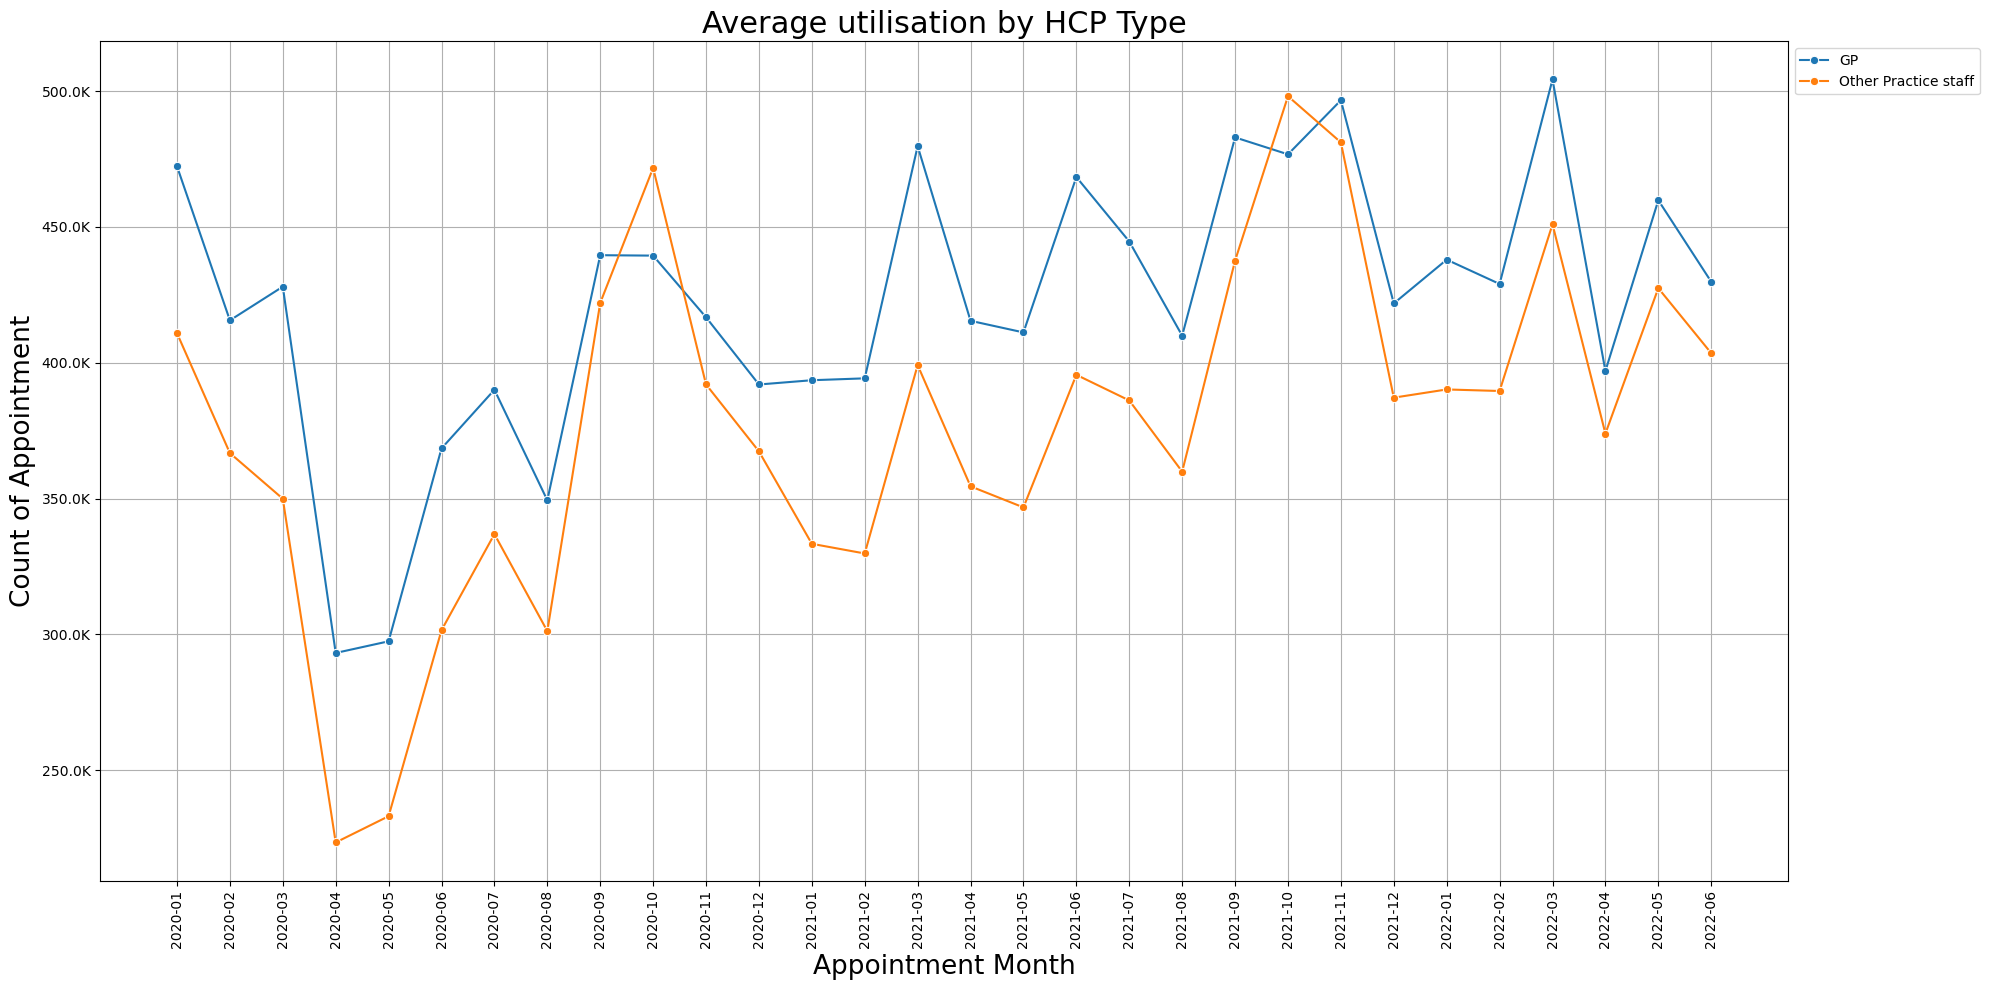

In [779]:
fig_hcp_test = plt.figure(figsize=(20, 10))
fig_hcp_test = sns.lineplot(x='appointment_month', y='utilisation', hue='hcp_type',  marker='o', errorbar=None, data=hcp_test_clean)
fig_hcp_test.set_title('Average utilisation by HCP Type', fontdict={'size': 22})
fig_hcp_test.set_xlabel('Appointment Month', fontdict={'size': 19})
fig_hcp_test.set_ylabel('Count of Appointment', fontdict={'size': 19})
plt.xticks(rotation=90)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

def format(y, pos):
    return f'{y/1000:.1f}K'
    
fig_hcp_test.yaxis.set_major_formatter(ticker.FuncFormatter(kformat))

plt.tight_layout()
plt.show()

In [781]:
am_test = ar_agg.groupby(['appointment_month', 'appointment_mode'], as_index=False)['count_of_appointments'].sum()

In [783]:
am_test.rename(columns={'count_of_appointments': 'utilisation'}, inplace=True)

In [785]:
am_test['utilisation'] = am_test['utilisation'] / 30

In [787]:
am_test_clean = am_test[am_test["appointment_mode"].str.contains("Unknown") == False]

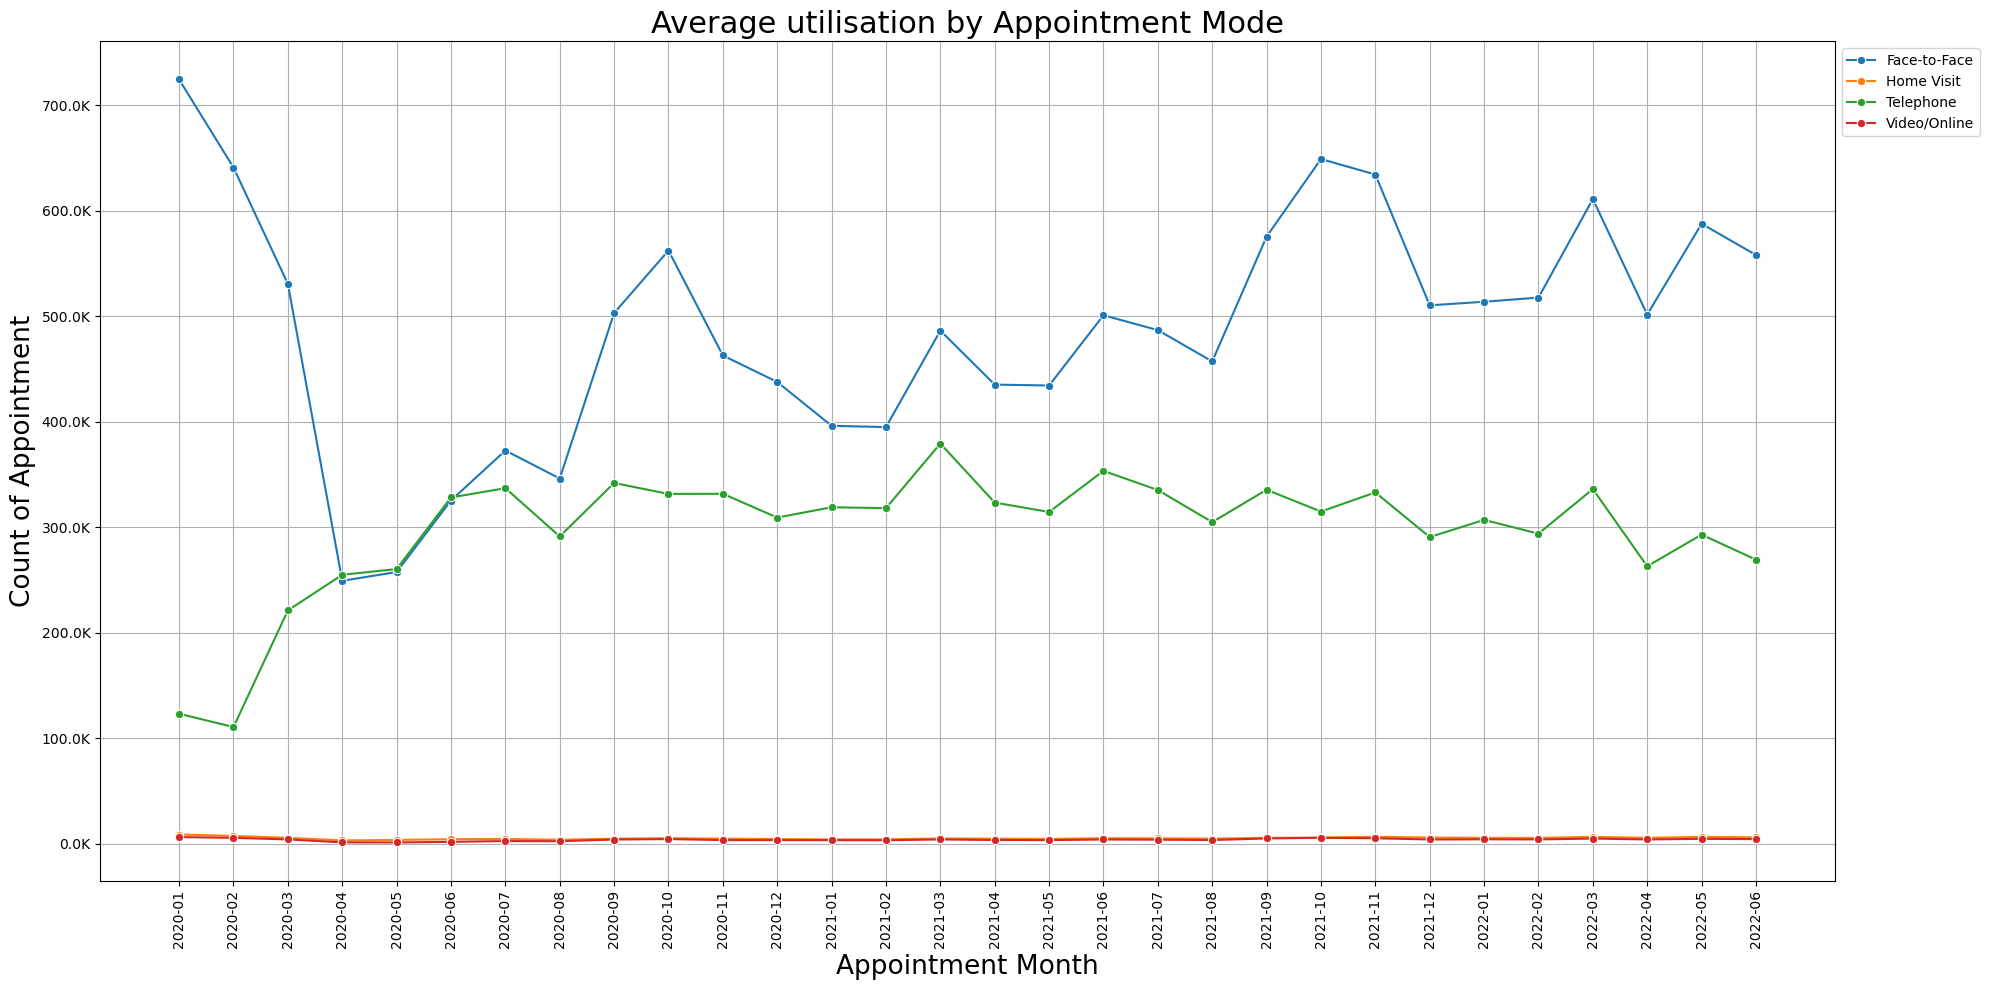

In [789]:
fig_am_test = plt.figure(figsize=(20, 10))
fig_am_test = sns.lineplot(x='appointment_month', y='utilisation', hue='appointment_mode',  marker='o', errorbar=None, data=am_test_clean)
fig_am_test.set_title('Average utilisation by Appointment Mode', fontdict={'size': 22})
fig_am_test.set_xlabel('Appointment Month', fontdict={'size': 19})
fig_am_test.set_ylabel('Count of Appointment', fontdict={'size': 19})
plt.xticks(rotation=90)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

def format(y, pos):
    return f'{y/1000:.1f}K'
    
fig_am_test.yaxis.set_major_formatter(ticker.FuncFormatter(kformat))

plt.tight_layout()
plt.show()

**How do the healthcare professional types differ over time?**

In [244]:
#I create a DataFrame to find the sum of appointments by appointment month and HCP Type.
ar_agg_hcp_subset = ar_agg[["appointment_month","hcp_type","count_of_appointments"]]
ar_agg_hcp_subset.head()

appointment_month hcp_type  count_of_appointments
0           2020-01       GP                   8107
1           2020-01       GP                   6791
2           2020-01       GP                  20686
3           2020-01       GP                   4268
4           2020-01       GP                  11971

In [246]:
#Then, I group by HCP Type, and sum the respective appointment count. 
ar_agg_hcp_subset = ar_agg.groupby(['appointment_month','hcp_type'])['count_of_appointments'].sum().unstack()
ar_agg_hcp_subset 

hcp_type                 GP  Other Practice staff  Unknown
appointment_month                                         
2020-01            14168932              12326031   704333
2020-02            12467976              11002550   634095
2020-03            12839993              10498713   714762
2020-04             8795939               6704003   507939
2020-05             8924583               6993557   499072
2020-06            11054065               9047092   589648
2020-07            11701906              10108127   681404
2020-08            10481447               9037362   631711
2020-09            13187253              12660278   866724
2020-10            13182629              14150521   968782
2020-11            12501963              11760406   799233
2020-12            11759814              11021668   754454
2021-01            11806927              10001104   684038
2021-02            11827794               9894163   677612
2021-03            14391125              11973606   860693
2021-04            12462924              10635500   781508
2021-05            12334764              10402894   770737
2021-06            14050148              11866623   867411
2021-07            13338516              11583564   817139
2021-08            12299022              10797821   755328
2021-09            14487785              13126731   907985
2021-10            14300751              14942504  1060579
2021-11            14897749              14432800  1074521
2021-12            12654767              11614470   871539
2022-01            13138050              11705142   792282
2022-02            12869711              11688107   797442
2022-03            15127227              13528583   939228
2022-04            11908463              11217738   786859
2022-05            13793934              12823200   878374
2022-06            12893983              12105677   828418

In [248]:
ar_agg_hcp_subset.reset_index()

hcp_type appointment_month        GP  Other Practice staff  Unknown
0                  2020-01  14168932              12326031   704333
1                  2020-02  12467976              11002550   634095
2                  2020-03  12839993              10498713   714762
3                  2020-04   8795939               6704003   507939
4                  2020-05   8924583               6993557   499072
5                  2020-06  11054065               9047092   589648
6                  2020-07  11701906              10108127   681404
7                  2020-08  10481447               9037362   631711
8                  2020-09  13187253              12660278   866724
9                  2020-10  13182629              14150521   968782
10                 2020-11  12501963              11760406   799233
11                 2020-12  11759814              11021668   754454
12                 2021-01  11806927              10001104   684038
13                 2021-02  11827794               9894163   677612
14                 2021-03  14391125              11973606   860693
15                 2021-04  12462924              10635500   781508
16                 2021-05  12334764              10402894   770737
17                 2021-06  14050148              11866623   867411
18                 2021-07  13338516              11583564   817139
19                 2021-08  12299022              10797821   755328
20                 2021-09  14487785              13126731   907985
21                 2021-10  14300751              14942504  1060579
22                 2021-11  14897749              14432800  1074521
23                 2021-12  12654767              11614470   871539
24                 2022-01  13138050              11705142   792282
25                 2022-02  12869711              11688107   797442
26                 2022-03  15127227              13528583   939228
27                 2022-04  11908463              11217738   786859
28                 2022-05  13793934              12823200   878374
29                 2022-06  12893983              12105677   828418

In [250]:
ar_agg_hcp_subset = ar_agg_hcp_subset.drop('Unknown', axis=1)

<Figure size 1200x800 with 0 Axes>

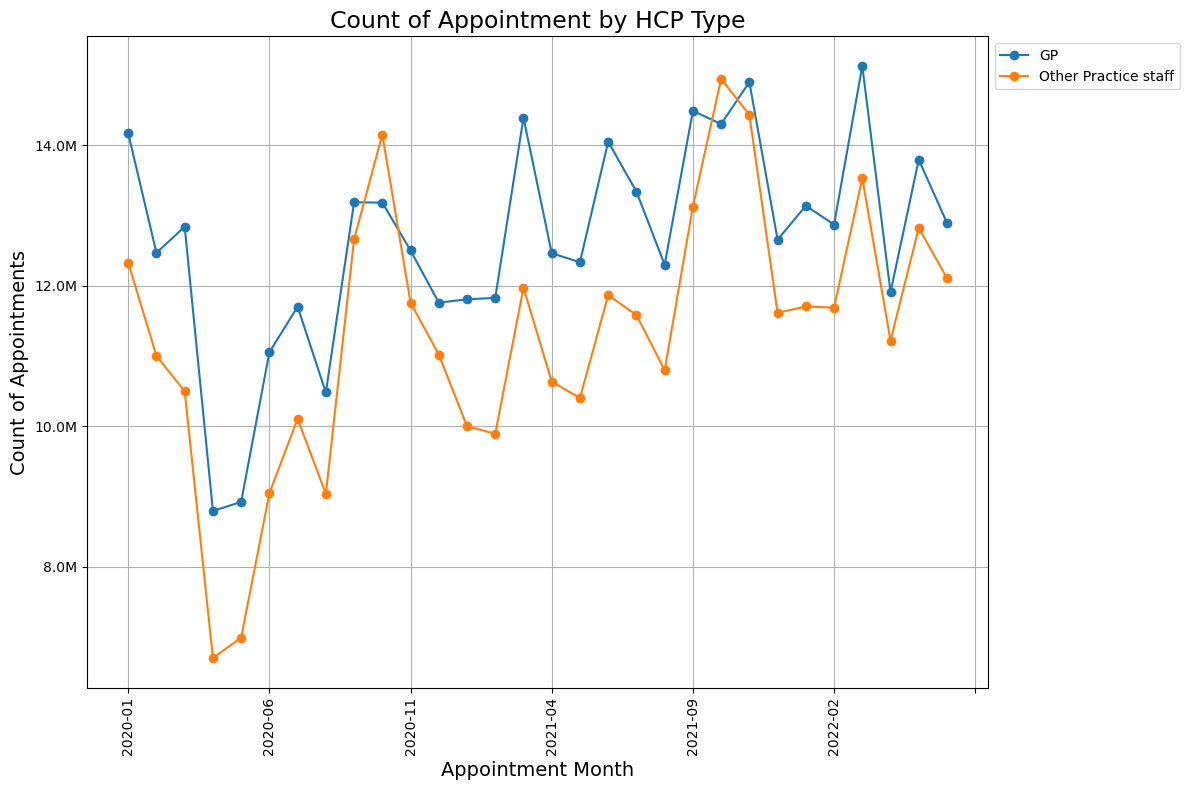

In [252]:
fig_hcp = plt.figure(figsize=(12, 8))
fig_hcp = ar_agg_hcp_subset.plot(kind='line', figsize=(12, 8), marker='o')
fig_hcp.set_title('Count of Appointment by HCP Type', fontdict={'size': 17})
fig_hcp.set_xlabel('Appointment Month', fontdict={'size': 14})
fig_hcp.set_ylabel('Count of Appointments',  fontdict={'size': 14})
plt.xticks(rotation=90)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

def mformat(y, pos):
    return f'{y/1000000:.1f}M'
    
fig_hcp.yaxis.set_major_formatter(ticker.FuncFormatter(mformat))

plt.tight_layout()
plt.show()

**Are there significant changes in whether or not visits are attended?**

In [ ]:
#I follow the same method as I did previously.
ar_agg_att_subset = ar_agg[["appointment_month","appointment_status","count_of_appointments"]]
ar_agg_att_subset.head()

In [288]:
ar_agg_att_subset = ar_agg.groupby(['appointment_month','appointment_status'])['count_of_appointments'].sum().unstack()
ar_agg_att_subset.head()

appointment_status  Attended      DNA  Unknown
appointment_month                             
2020-01             24538291  1298269  1362736
2020-02             21640067  1215154  1249400
2020-03             20718865  1166314  2168289
2020-04             13982824   478766  1546291
2020-05             14962850   449057  1005305

In [290]:
ar_agg_att_subset.reset_index()

appointment_status appointment_month  Attended      DNA  Unknown
0                            2020-01  24538291  1298269  1362736
1                            2020-02  21640067  1215154  1249400
2                            2020-03  20718865  1166314  2168289
3                            2020-04  13982824   478766  1546291
4                            2020-05  14962850   449057  1005305
5                            2020-06  18943022   594382  1153401
6                            2020-07  20606888   698327  1186222
7                            2020-08  18438932   669462  1042126
8                            2020-09  23988492  1145971  1579792
9                            2020-10  25529275  1358138  1414519
10                           2020-11  23072059  1021408   968135
11                           2020-12  21592221   996416   947299
12                           2021-01  20645718   899833   946518
13                           2021-02  20736205   804659   858705
14                           2021-03  25289991   964719   970714
15                           2021-04  22056413   893723   929796
16                           2021-05  21779605   878219   850571
17                           2021-06  24815463  1030367   938352
18                           2021-07  23761001  1029665   948553
19                           2021-08  22081765   949137   821269
20                           2021-09  25757066  1321348  1444087
21                           2021-10  27170506  1565624  1567704
22                           2021-11  27667665  1428087  1309318
23                           2021-12  22853483  1198866  1088427
24                           2022-01  23597196  1076013   962265
25                           2022-02  23351939  1076658   926663
26                           2022-03  27170002  1289888  1135148
27                           2022-04  21948814  1045455   918791
28                           2022-05  25343941  1199518   952049
29                           2022-06  23715317  1167790   944971

In [292]:
ar_agg_att_subset = ar_agg_att_subset.drop('Unknown', axis=1)

<Figure size 1200x800 with 0 Axes>

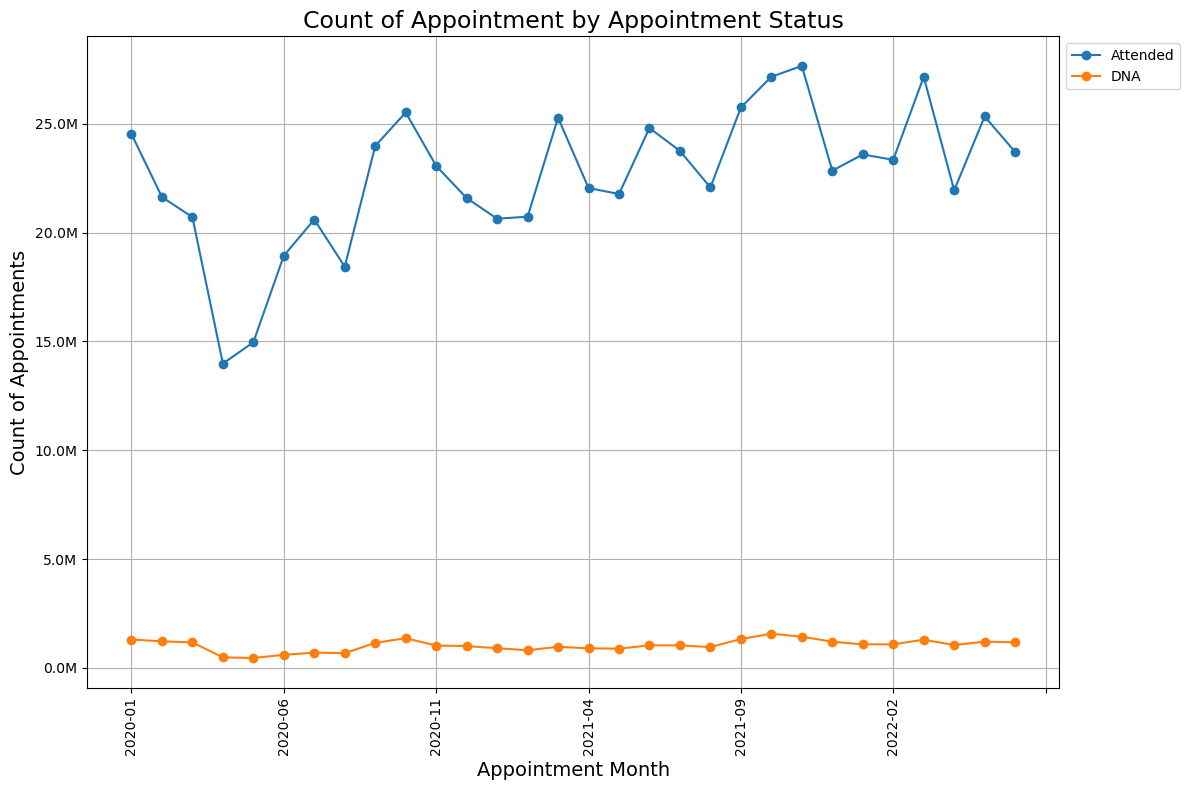

In [294]:
fig_att = plt.figure(figsize=(12, 8))
fig_att = ar_agg_att_subset.plot(kind='line', figsize=(12, 8), marker='o')
fig_att.set_title('Count of Appointment by Appointment Status', fontdict={'size': 17})
fig_att.set_xlabel('Appointment Month', fontdict={'size': 14})
fig_att.set_ylabel('Count of Appointments',  fontdict={'size': 14})
plt.xticks(rotation=90)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

def mformat(y, pos):
    return f'{y/1000000:.1f}M'
    
fig_att.yaxis.set_major_formatter(ticker.FuncFormatter(mformat))

plt.tight_layout()
plt.show()

**Are there changes in terms of appointment type and the busiest months?**

In [254]:
#I follow the same method as I did previously.
ar_agg_am_subset = ar_agg[["appointment_month","appointment_mode","count_of_appointments"]]
ar_agg_am_subset.head()

appointment_month appointment_mode  count_of_appointments
0           2020-01     Face-to-Face                   8107
1           2020-01     Face-to-Face                   6791
2           2020-01     Face-to-Face                  20686
3           2020-01     Face-to-Face                   4268
4           2020-01     Face-to-Face                  11971

In [256]:
ar_agg_am_subset = ar_agg.groupby(['appointment_month','appointment_mode'])['count_of_appointments'].sum().unstack()
ar_agg_am_subset 

appointment_mode   Face-to-Face  Home Visit  Telephone  Unknown  Video/Online
appointment_month                                                            
2020-01                21733394      266942    3701775  1302979        194206
2020-02                19230573      227935    3322242  1151233        172638
2020-03                15921794      172773    6637656  1194015        127230
2020-04                 7480941      100673    7652390   729664         44213
2020-05                 7729597      112018    7813734   720213         41650
2020-06                 9763381      133805    9849385   885177         59057
2020-07                11184673      140787   10114285   970928         80764
2020-08                10388825      119250    8742071   823191         77183
2020-09                15092880      148978   10262198  1085917        124282
2020-10                16870816      161721    9950370  1181559        137466
2020-11                13886990      150187    9954012   961830        108583
2020-12                13133882      137310    9278556   878469        107719
2021-01                11887083      129033    9571141   798248        106564
2021-02                11850255      130396    9546051   769622        103245
2021-03                14593975      154148   11383424   966730        127147
2021-04                13058306      148827    9704359   857408        111032
2021-05                13032902      142291    9436985   788132        108085
2021-06                15030018      161666   10606719   860215        125564
2021-07                14607857      157992   10060423   792114        120833
2021-08                13717325      151619    9149072   724126        110029
2021-09                17266602      171829   10068770   859946        155354
2021-10                19471561      178593    9449544  1029671        174465
2021-11                19031327      203352    9993842  1015969        160580
2021-12                15312340      181264    8723325   798049        125798
2022-01                15414102      171669    9212553   706352        130798
2022-02                15531971      170435    8820538   704619        127697
2022-03                18333743      200945   10088419   819913        152018
2022-04                15049567      172936    7893805   670299        126453
2022-05                17630858      200862    8792743   726857        144188
2022-06                16744191      187640    8082270   677860        136117

I also plot total appointment count to this chart to visualise how appointmode mode count changes with regard to total appointment count.

In [515]:
ar_agg_am_exu = ar_agg[["appointment_month","appointment_mode","count_of_appointments"]]
ar_agg_am_exu = ar_agg_am_exu[ar_agg_am_exu["appointment_mode"].str.contains("Unknown") == False]

In [517]:
am_lineexu = ar_agg_am_exu.groupby('appointment_month')[['count_of_appointments']].sum().reset_index()

<Figure size 2000x800 with 0 Axes>

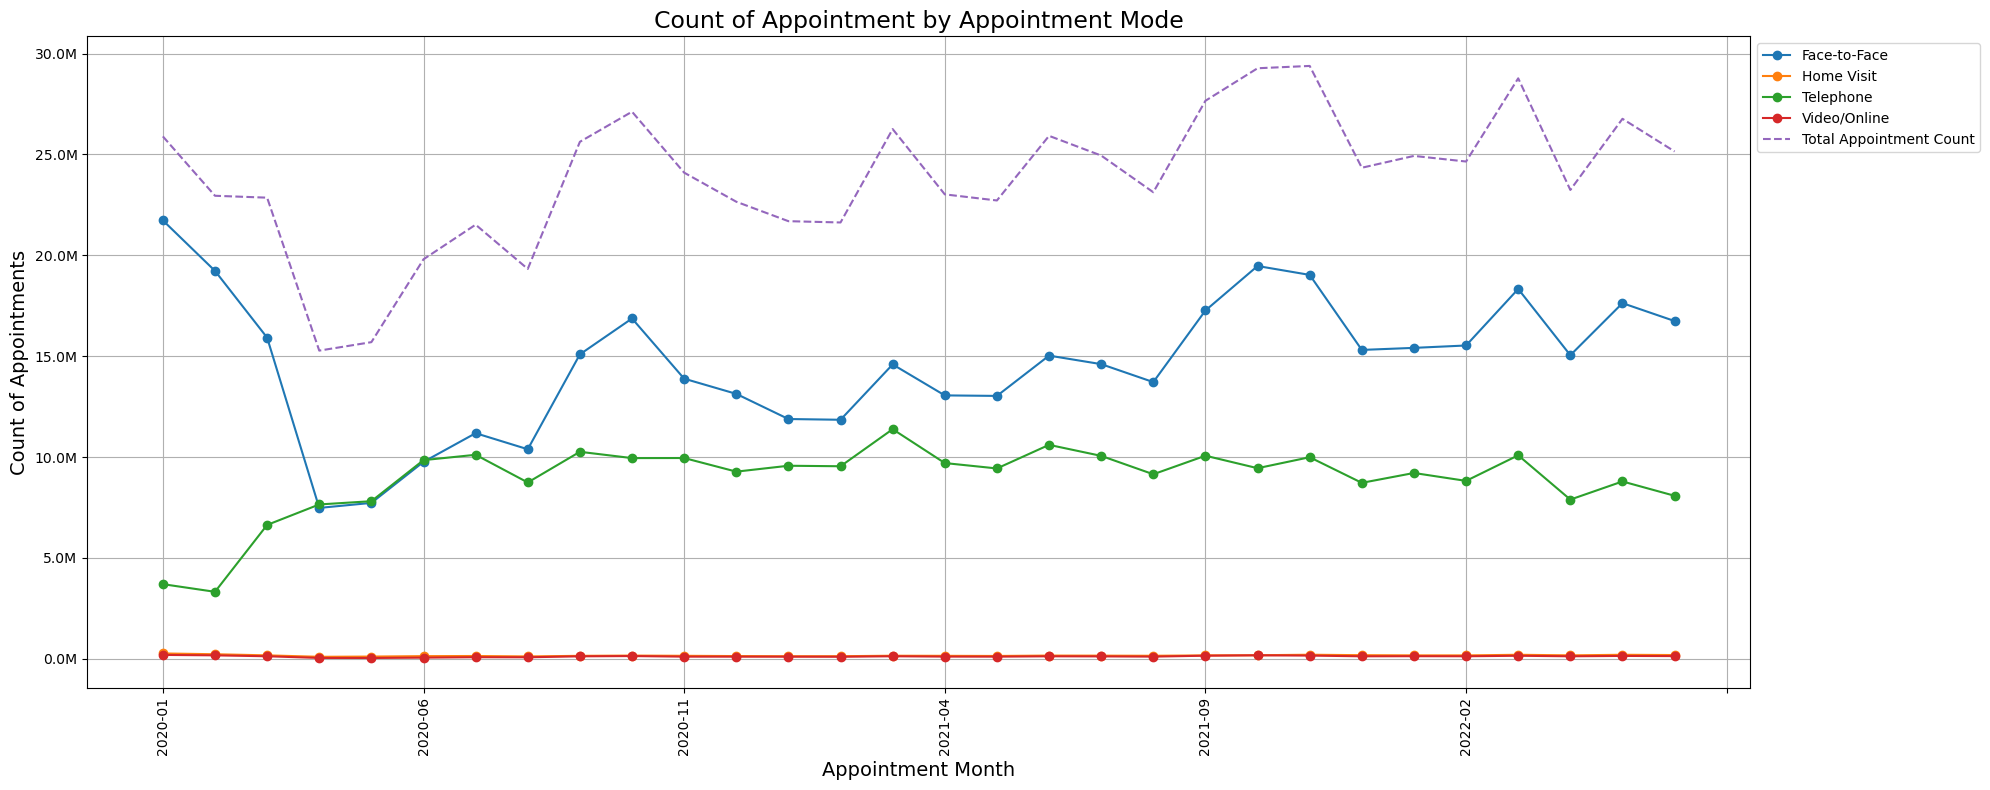

In [795]:
fig_am = plt.figure(figsize=(20, 8))
fig_am = ar_agg_am_subset.plot(kind='line', figsize=(20, 8), marker='o')
fig_am.set_title('Count of Appointment by Appointment Mode', fontdict={'size': 17})
fig_am.set_xlabel('Appointment Month', fontdict={'size': 14})
fig_am.set_ylabel('Count of Appointments',  fontdict={'size': 14})
plt.xticks(rotation=90)
plt.grid(True)

def mformat(y, pos):
    return f'{y/1000000:.1f}M'
    
fig_am.yaxis.set_major_formatter(ticker.FuncFormatter(mformat))

plt.plot(am_lineexu['appointment_month'], am_lineexu['count_of_appointments'],
         label='Total Appointment Count', linestyle='--')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

**Are there any trends in time between booking and appointment?**

In [799]:
#I follow the same method as I did previously.
ar_agg_ba_subset = ar_agg[["appointment_month","time_between_book_and_appointment","count_of_appointments"]]
ar_agg_ba_subset.head()

appointment_month time_between_book_and_appointment  count_of_appointments
0           2020-01                             1 Day                   8107
1           2020-01                    15  to 21 Days                   6791
2           2020-01                       2 to 7 Days                  20686
3           2020-01                    22  to 28 Days                   4268
4           2020-01                     8  to 14 Days                  11971

In [801]:
ar_agg_ba_subset = ar_agg.groupby(['appointment_month','time_between_book_and_appointment'])['count_of_appointments'].sum().unstack()
ar_agg_ba_subset 

time_between_book_and_appointment    1 Day  15  to 21 Days  2 to 7 Days  \
appointment_month                                                         
2020-01                            1945711         1881819      5604909   
2020-02                            1666076         1917994      4692881   
2020-03                            1822926         1743581      4251364   
2020-04                            1523077          404639      2016527   
2020-05                            1821810          303101      2601179   
2020-06                            2268962          447255      4168832   
2020-07                            2443479          694472      4865824   
2020-08                            2005241          840855      4218540   
2020-09                            2464063         1645808      5612408   
2020-10                            2564396         1974824      5934097   
2020-11                            2285210         1395087      5533276   
2020-12                            2315757         1276951      5016592   
2021-01                            2435465          962788      5064495   
2021-02                            2361443          816466      5457349   
2021-03                            2695469         1170037      6572676   
2021-04                            2301670         1298564      5167763   
2021-05                            2188719         1303048      5229193   
2021-06                            2389097         1630126      5607424   
2021-07                            2344552         1548831      5445102   
2021-08                            2018319         1453209      4924960   
2021-09                            2666072         1869263      5955074   
2021-10                            2598516         2005851      6811322   
2021-11                            2506532         2254189      6335266   
2021-12                            2219212         1709999      4740529   
2022-01                            2334274         1312377      5621812   
2022-02                            2272923         1524398      5466290   
2022-03                            2709362         1908058      6079566   
2022-04                            2088881         1720218      4527185   
2022-05                            2270686         1782026      5565378   
2022-06                            2188197         1914740      4706718   

time_between_book_and_appointment  22  to 28 Days  8  to 14 Days  \
appointment_month                                                  
2020-01                                   1313557        3444637   
2020-02                                   1289642        3448287   
2020-03                                   1277924        2882845   
2020-04                                    460284         725571   
2020-05                                    226697         842962   
2020-06                                    290802        1303387   
2020-07                                    394032        1974898   
2020-08                                    451518        2053578   
2020-09                                    895969        3236710   
2020-10                                   1250696        3615907   
2020-11                                    786091        2961047   
2020-12                                    631592        3040822   
2021-01                                    624615        1971087   
2021-02                                    471673        2235364   
2021-03                                    629531        3097674   
2021-04                                    701223        2911630   
2021-05                                    673570        3029254   
2021-06                                    878697        3359741   
2021-07                                    857844        3204067   
2021-08                                    828866        2889150   
2021-09                                   1203657        3356476   
2021-10                            

In [803]:
#Here, I drop the 'Unknown/Data Quality' column.
ar_agg_ba_subset.drop('Unknown / Data Quality', axis=1, inplace=True)

<Figure size 2000x800 with 0 Axes>

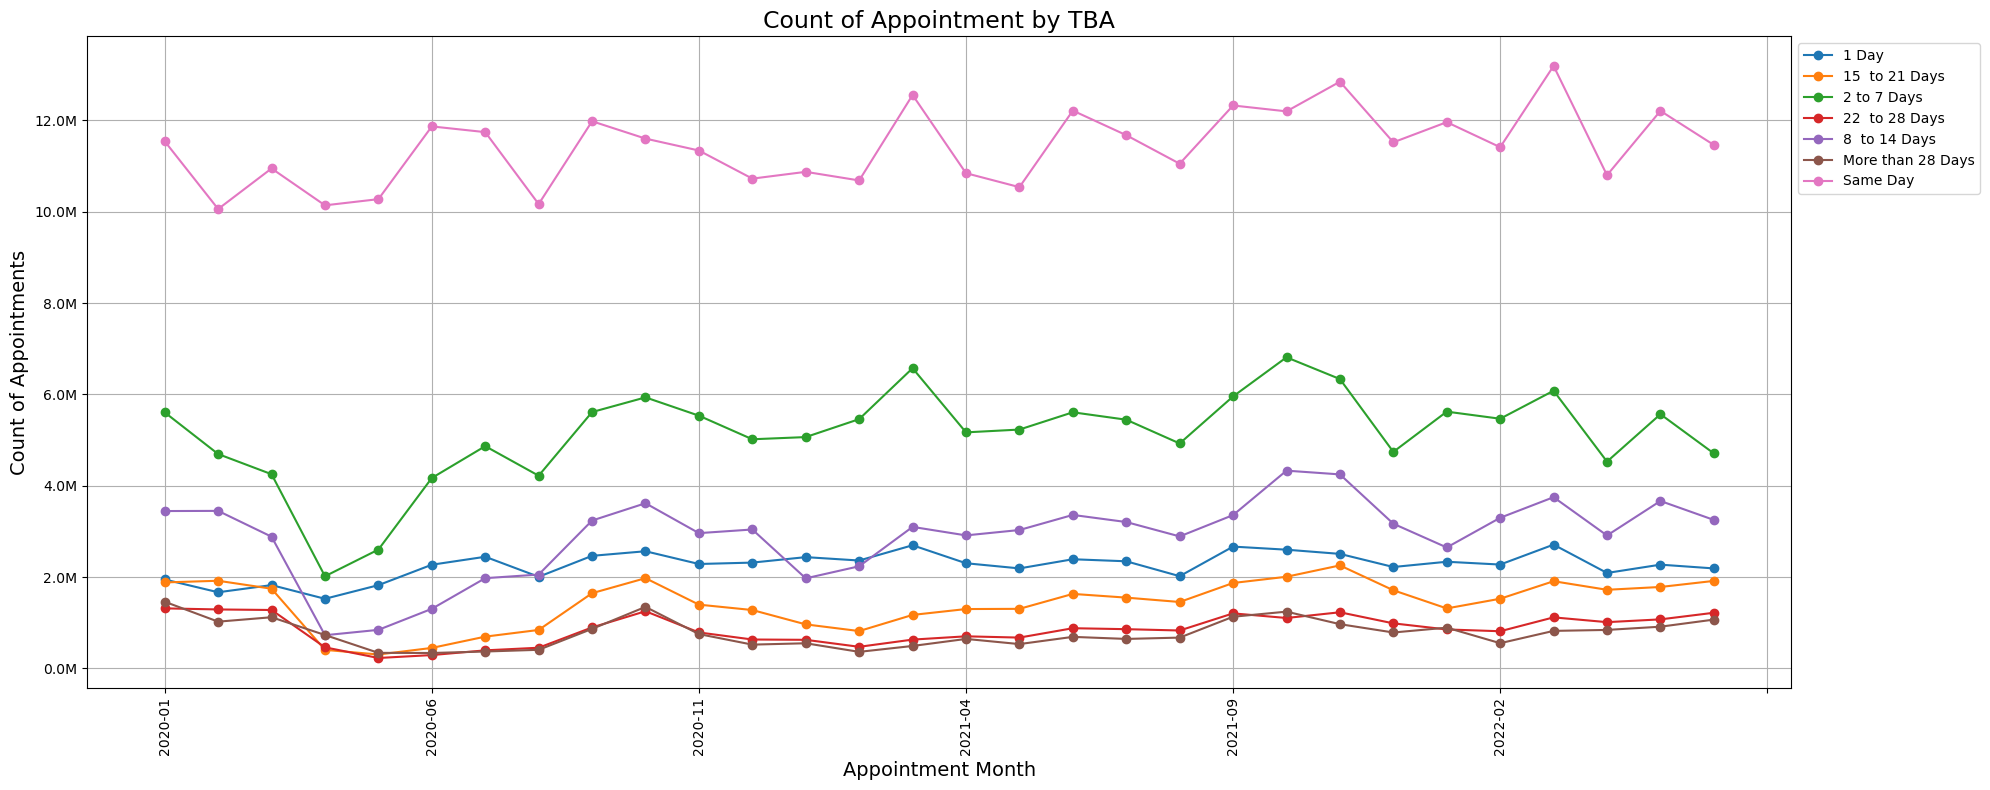

In [805]:
fig_ba = plt.figure(figsize=(20, 8))
fig_ba = ar_agg_ba_subset.plot(kind='line', figsize=(20, 8), marker='o')
fig_ba.set_title('Count of Appointment by TBA', fontdict={'size': 17})
fig_ba.set_xlabel('Appointment Month', fontdict={'size': 14})
fig_ba.set_ylabel('Count of Appointments',  fontdict={'size': 14})
plt.xticks(rotation=90)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

def mformat(y, pos):
    return f'{y/1000000:.1f}M'
    
fig_ba.yaxis.set_major_formatter(ticker.FuncFormatter(mformat))

plt.tight_layout()
plt.show()

**How do the various service settings compare?**

Here, I look at data in the 'national_categories' dataset

In [534]:
#I create a new DataFrame, 'nc_group'.
nc_group = nc[["appointment_month","service_setting","count_of_appointments"]]
nc_group = nc_group.groupby(['appointment_month', 'service_setting']).sum().reset_index()
nc_group.head()

appointment_month            service_setting  count_of_appointments
0           2021-08  Extended Access Provision                 160927
1           2021-08           General Practice               21575852
2           2021-08                      Other                 449101
3           2021-08       Primary Care Network                 432448
4           2021-08                   Unmapped                1233843

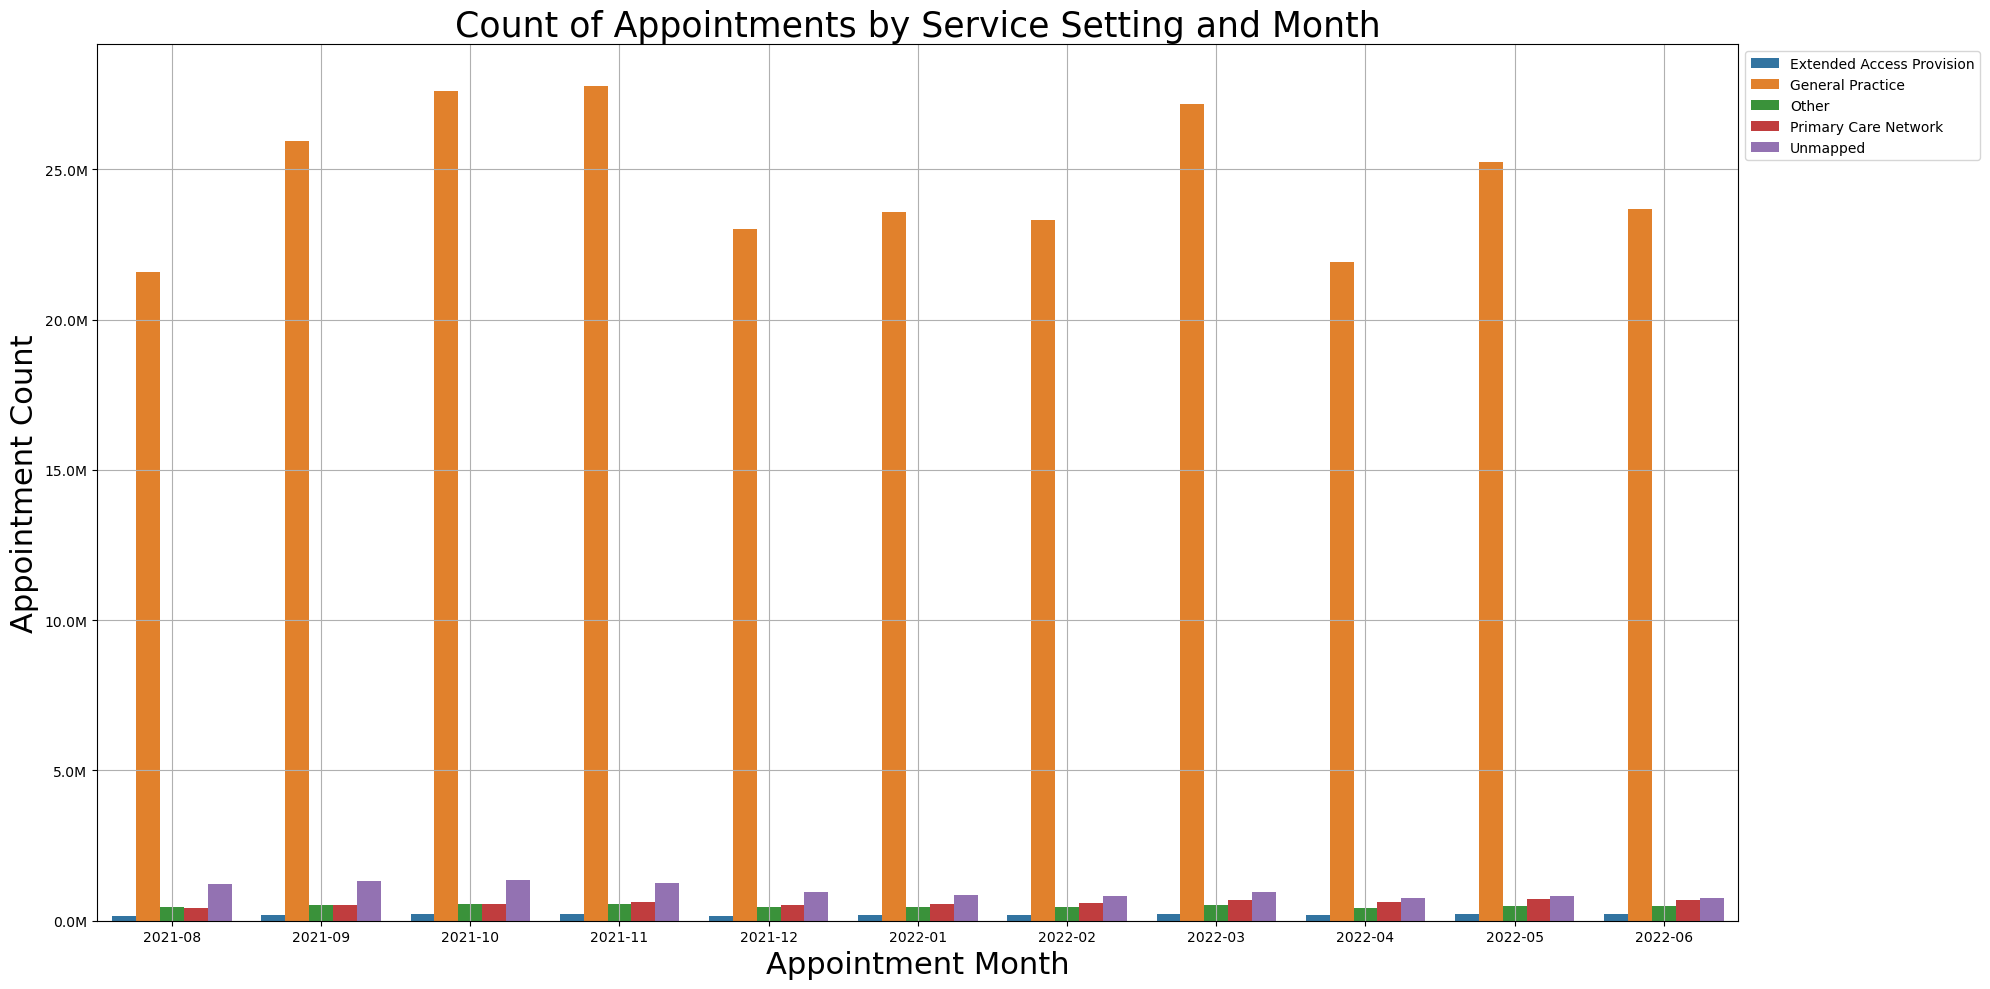

In [538]:
nc_group_bar = plt.figure(figsize=(20, 10))
nc_group_bar = sns.barplot(x='appointment_month', y='count_of_appointments', hue='service_setting', data=nc_group)
nc_group_bar.set_title('Count of Appointments by Service Setting and Month', fontdict={'size': 25})
nc_group_bar.set_xlabel('Appointment Month', fontdict={'size': 22})
nc_group_bar.set_ylabel('Appointment Count', fontdict={'size': 22})
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

def mformat(y, pos):
    return f'{y/1000000:.1f}M'

nc_group_bar.yaxis.set_major_formatter(ticker.FuncFormatter(mformat))

plt.tight_layout()
plt.show()

Let's recreate this, but exclude GP visits.

In [67]:
nc_groupexgp = nc_group[nc_group["service_setting"].str.contains("General Practice") == False]
nc_groupexgp.head()

appointment_month            service_setting  count_of_appointments
0           2021-08  Extended Access Provision                 160927
2           2021-08                      Other                 449101
3           2021-08       Primary Care Network                 432448
4           2021-08                   Unmapped                1233843
5           2021-09  Extended Access Provision                 187906

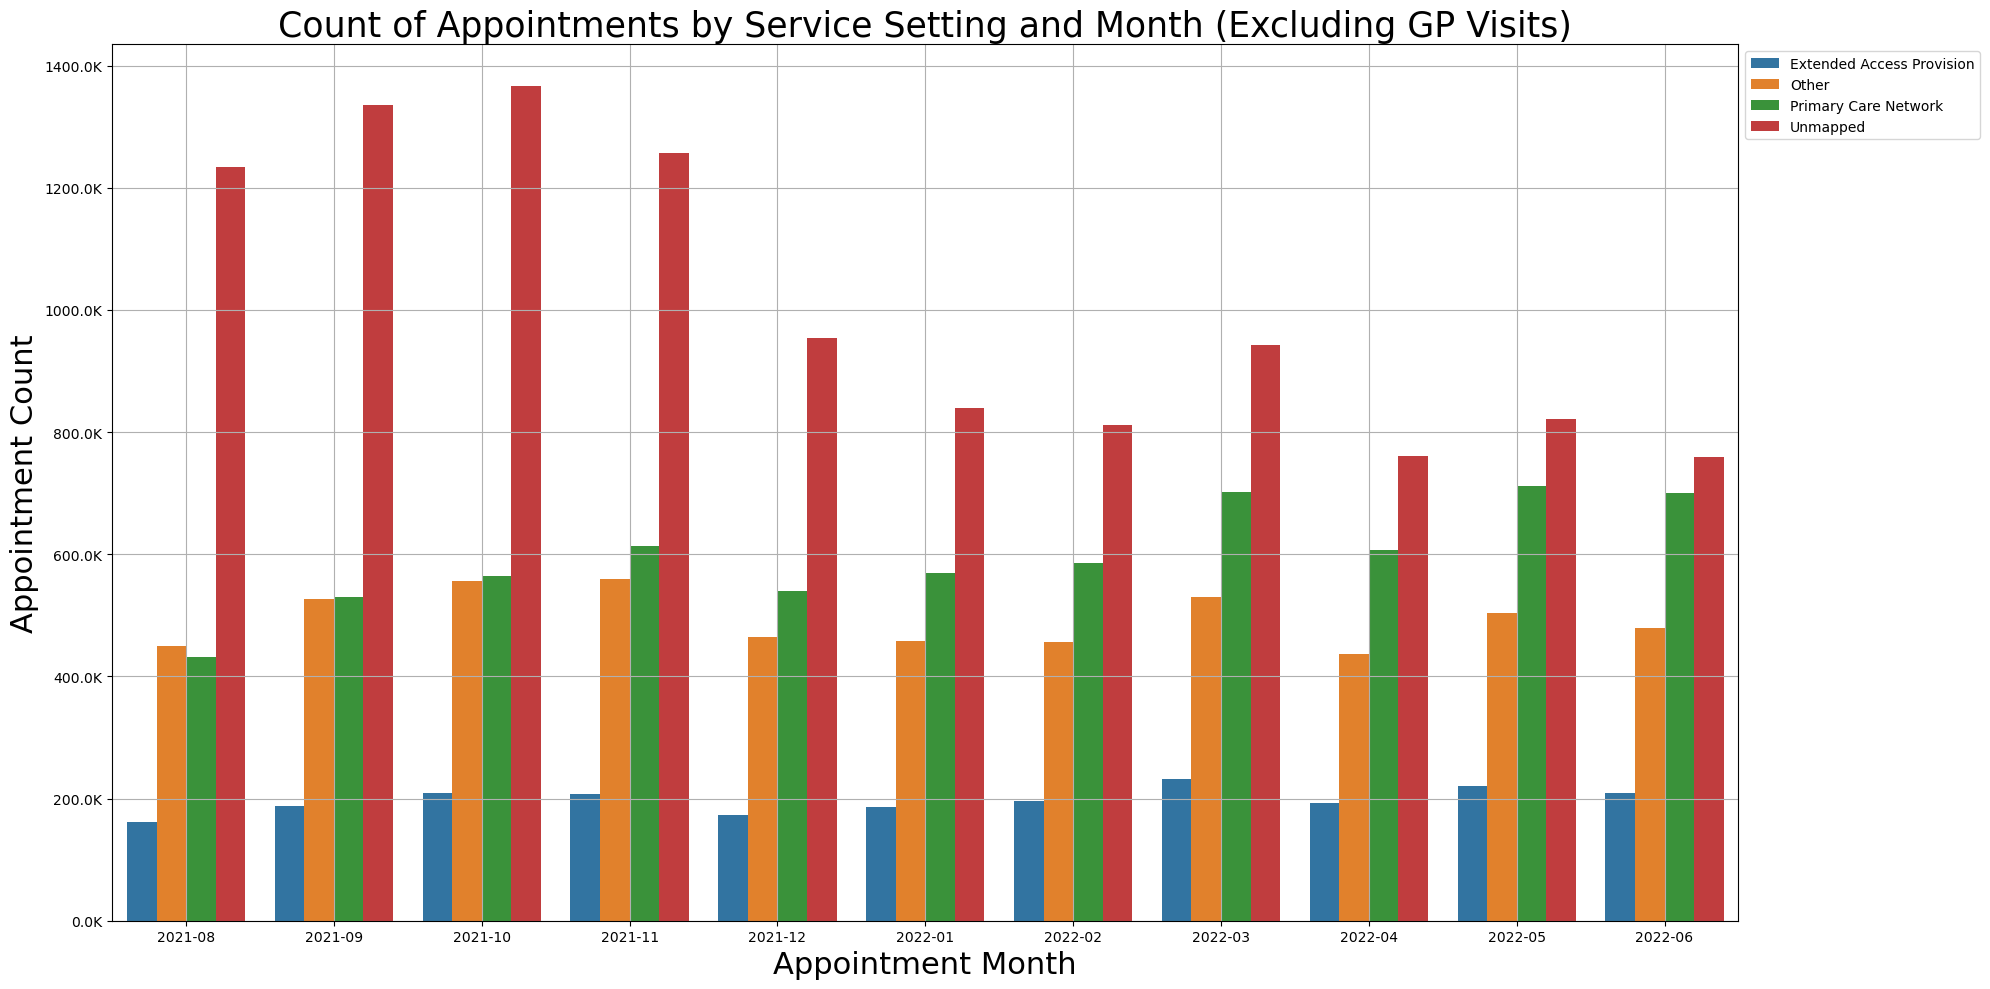

In [699]:
nc_groupexgp_bar = plt.figure(figsize=(20, 10))
nc_groupexgp_bar = sns.barplot(x='appointment_month', y='count_of_appointments', hue='service_setting', data=nc_groupexgp)
nc_groupexgp_bar.set_title('Count of Appointments by Service Setting and Month (Excluding GP Visits)', fontdict={'size': 25})
nc_groupexgp_bar.set_xlabel('Appointment Month', fontdict={'size': 22})
nc_groupexgp_bar.set_ylabel('Appointment Count', fontdict={'size': 22})
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

def kformat(y, pos):
    return f'{y/1000:.1f}K'

nc_groupexgp_bar.yaxis.set_major_formatter(ticker.FuncFormatter(kformat))

plt.tight_layout()
plt.show()

I overlay total appointment count by month over this bar plot.

In [69]:
#I extract the data for this and save it as a DataFrame, 'lineexgp'.
lineexgp = nc_groupexgp.groupby('appointment_month')[['count_of_appointments']].sum().reset_index()
lineexgp

appointment_month  count_of_appointments
0            2021-08                2276319
1            2021-09                2581680
2            2021-10                2697663
3            2021-11                2637181
4            2021-12                2131958
5            2022-01                2052421
6            2022-02                2049326
7            2022-03                2407670
8            2022-04                1996269
9            2022-05                2256888
10           2022-06                2147704

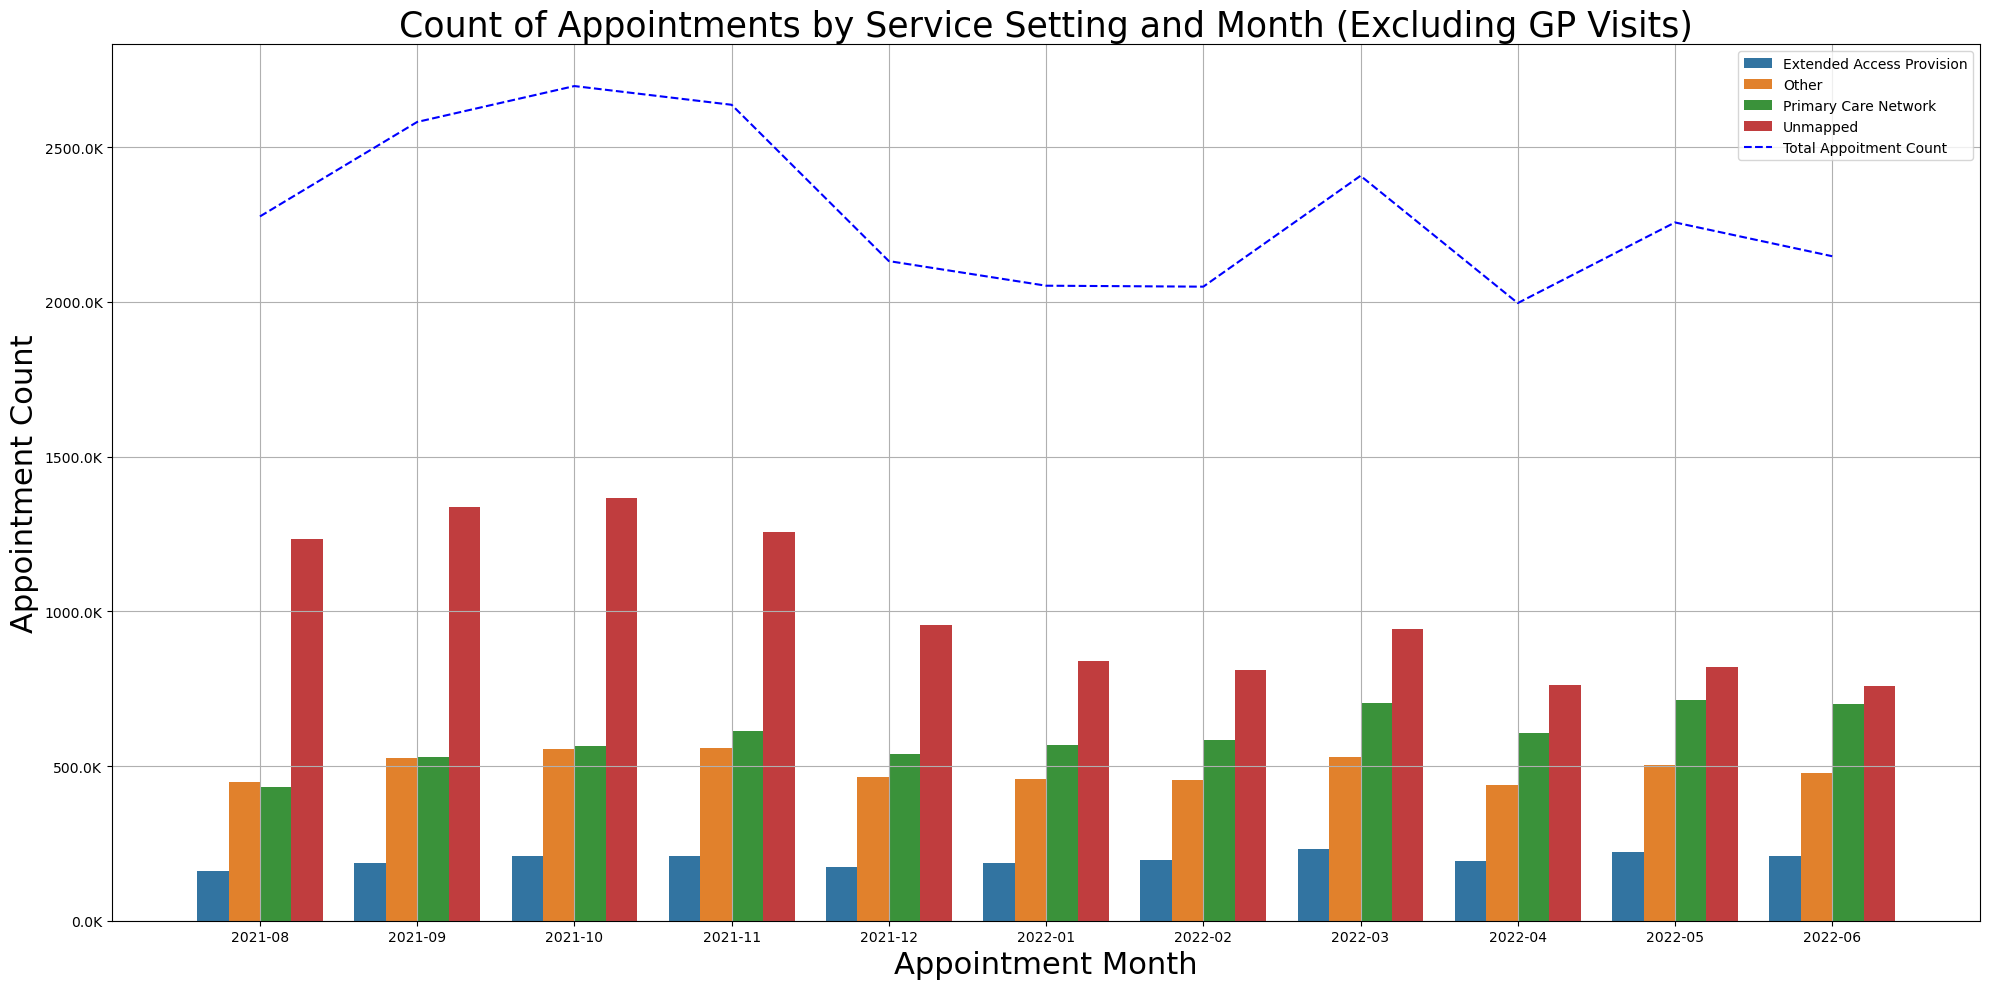

In [71]:
nc_groupexgp_bar = plt.figure(figsize=(20, 10))
nc_groupexgp_bar = sns.barplot(x='appointment_month',
                               y='count_of_appointments',
                               hue='service_setting', data=nc_groupexgp)
nc_groupexgp_bar.set_title('Count of Appointments by Service Setting and Month (Excluding GP Visits)',
                           fontdict={'size': 25})
nc_groupexgp_bar.set_xlabel('Appointment Month', fontdict={'size': 22})
nc_groupexgp_bar.set_ylabel('Appointment Count', fontdict={'size': 22})
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

def kformat(y, pos):
    return f'{y/1000:.1f}K'

nc_groupexgp_bar.yaxis.set_major_formatter(ticker.FuncFormatter(kformat))

plt.plot(lineexgp['appointment_month'],
         lineexgp['count_of_appointments'],
         linestyle='--', color='b', label='Total Appoitment Count')
plt.legend()

plt.tight_layout()
plt.show()

Let's see this without unmapped data.

In [74]:
nc_groupexgpu = nc_groupexgp[nc_groupexgp["service_setting"].str.contains("Unmapped") == False]

In [76]:
lineexgpu = nc_groupexgpu.groupby('appointment_month')[['count_of_appointments']].sum().reset_index()

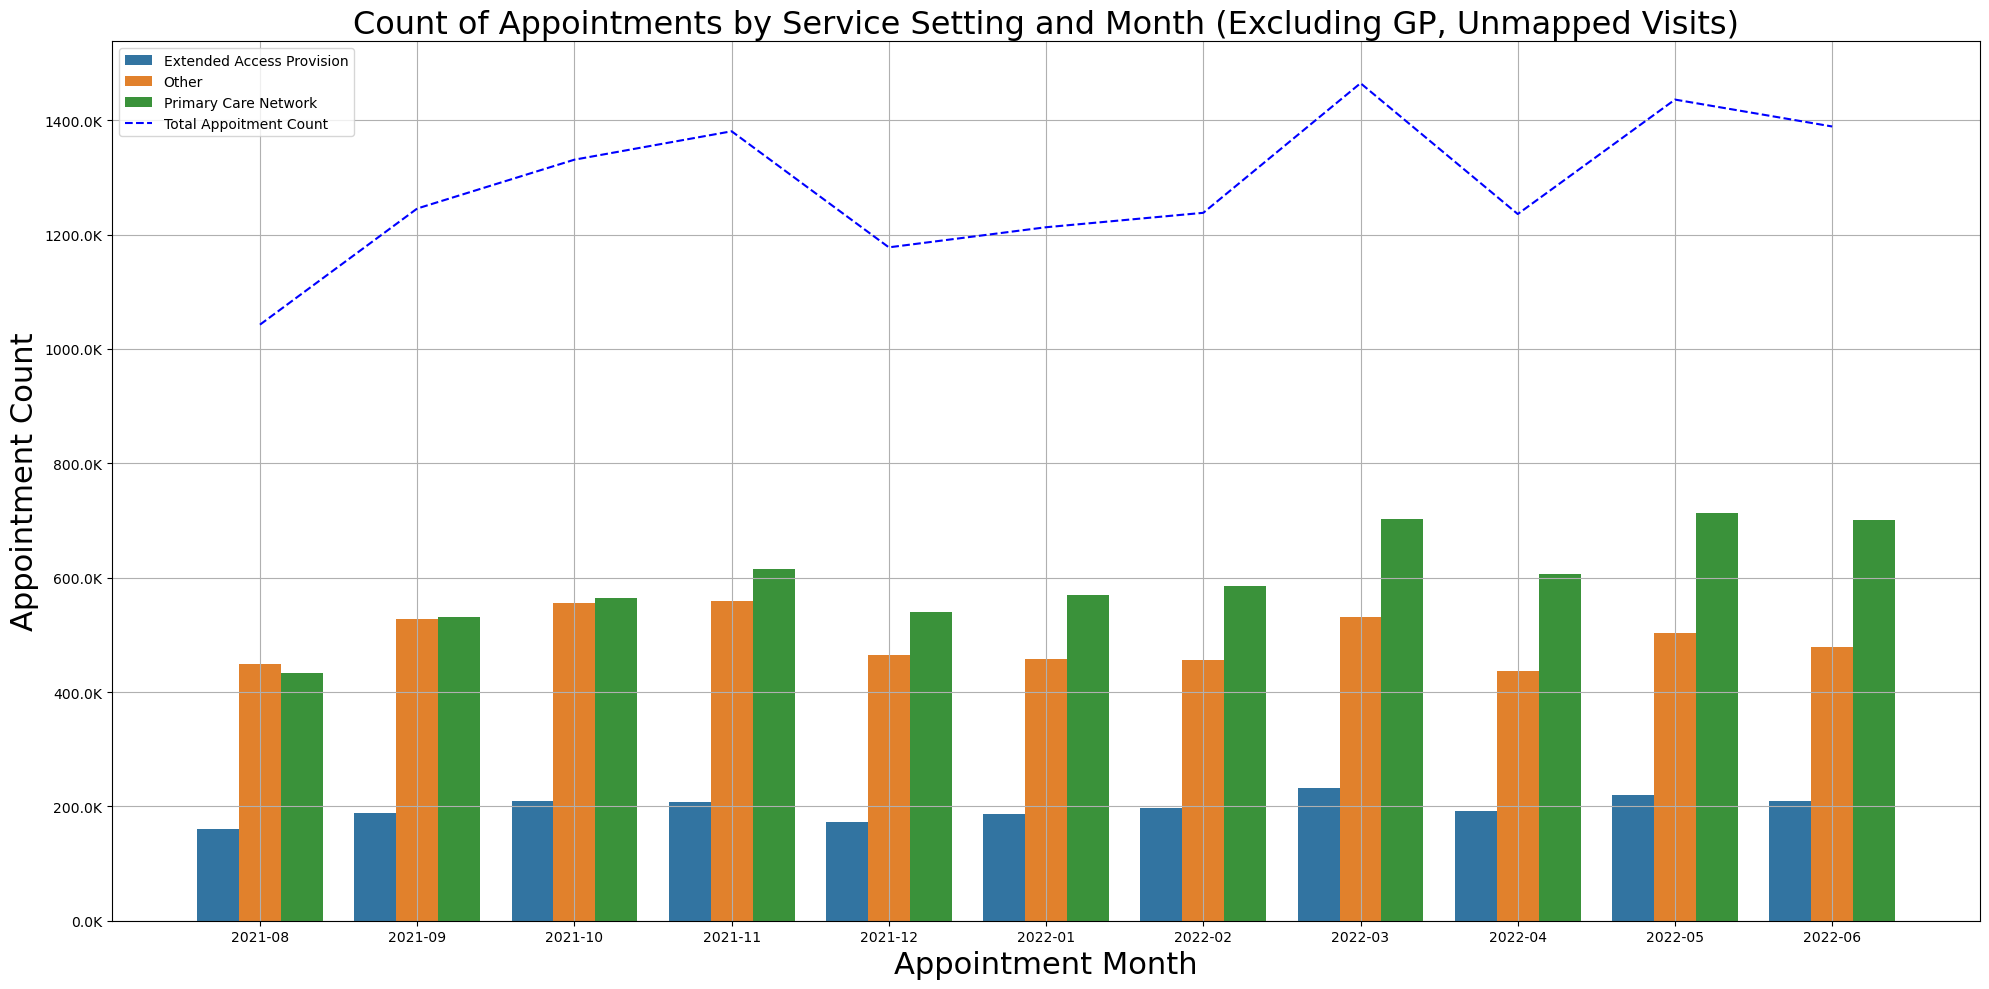

In [80]:
nc_groupexgpu_bar = plt.figure(figsize=(20, 10))
nc_groupexgpu_bar = sns.barplot(x='appointment_month',
                               y='count_of_appointments',
                               hue='service_setting', data=nc_groupexgpu)
nc_groupexgpu_bar.set_title('Count of Appointments by Service Setting and Month (Excluding GP, Unmapped Visits)',
                           fontdict={'size': 23})
nc_groupexgpu_bar.set_xlabel('Appointment Month', fontdict={'size': 22})
nc_groupexgpu_bar.set_ylabel('Appointment Count', fontdict={'size': 22})
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

def kformat(y, pos):
    return f'{y/1000:.1f}K'

nc_groupexgpu_bar.yaxis.set_major_formatter(ticker.FuncFormatter(kformat))

plt.plot(lineexgpu['appointment_month'],
         lineexgpu['count_of_appointments'],
         linestyle='--', color='b', label='Total Appoitment Count')
plt.legend()

plt.tight_layout()
plt.show()